In [ ]:
#author: Jing
#date: May 10 2019
#function: use elastic net for clinical, gene, mutational burden

In [31]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import datasets, linear_model

print(tf.__version__)

2.0.0-alpha0


In [4]:
gc_burden_path = "./gene_clinical_burden.csv" # generate by merge_two_files

gc_data = pd.read_csv(gc_burden_path, dtype = 'object')


In [5]:
# normalize one column
gc_data['nonsynonymous_count'] = pd.to_numeric(gc_data['nonsynonymous_count'])
# normalization
gc_data['nonsynonymous_count'] = (gc_data['nonsynonymous_count'] - gc_data['nonsynonymous_count'].mean())/gc_data['nonsynonymous_count'].std()


In [15]:
gc_data.columns

Index(['nonsynonymous_count', 'FEMALE', 'MALE', 'ACC', 'BLCA', 'BRCA', 'CESC',
       'CHOL', 'COAD', 'ESCA',
       ...
       'ZC3H12A', 'ZCCHC12', 'ZFHX3', 'ZFP36L1', 'ZFP36L2', 'ZMYM2', 'ZMYM3',
       'ZNF133', 'ZNF750', 'Leukocyte Fraction'],
      dtype='object', length=339)

In [16]:
mat_data = gc_data.values.astype(float)
x_label = gc_data.columns

n = mat_data.shape[0]
d = mat_data.shape[1]

x = mat_data[:,:-1]
y = mat_data[:,-1]
print(mat_data.shape, x.shape, y.shape)


(7661, 339) (7661, 338) (7661,)
[0.0476877  0.61412104 0.23574519 ... 0.13398047 0.46503909 0.36543182]


In [27]:
# remove the features 
cancer_start = (np.where(x_label=='ACC'))[0][0]
cancer_end = np.where(x_label == 'UVM')[0][0]

cancer_names = x_label[cancer_start : cancer_end+1]
print(cancer_names)
cancer_data = x[:,cancer_start:cancer_end+1]
print(cancer_data.shape)
nx = x
nx = np.delete(nx,list(range(cancer_start, cancer_end+1)), axis=1)
print(x.shape, nx.shape)
print(x_label)
print(nx[0,:])
nx_label = x_label
nx_label = np.delete(nx_label, list(range(cancer_start, cancer_end+1)))
print(len(nx_label))


Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'ESCA', 'GBM', 'HNSC',
       'KICH', 'KIRC', 'KIRP', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV',
       'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA',
       'UCEC', 'UCS', 'UVM'],
      dtype='object')
(7661, 30)
(7661, 338) (7661, 308)
Index(['nonsynonymous_count', 'FEMALE', 'MALE', 'ACC', 'BLCA', 'BRCA', 'CESC',
       'CHOL', 'COAD', 'ESCA',
       ...
       'ZC3H12A', 'ZCCHC12', 'ZFHX3', 'ZFP36L1', 'ZFP36L2', 'ZMYM2', 'ZMYM3',
       'ZNF133', 'ZNF750', 'Leukocyte Fraction'],
      dtype='object', length=339)
[-0.21872466  0.          1.          0.          0.          0.
  0.          1.          0.5         0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.    

In [33]:
from sklearn.linear_model import ElasticNetCV

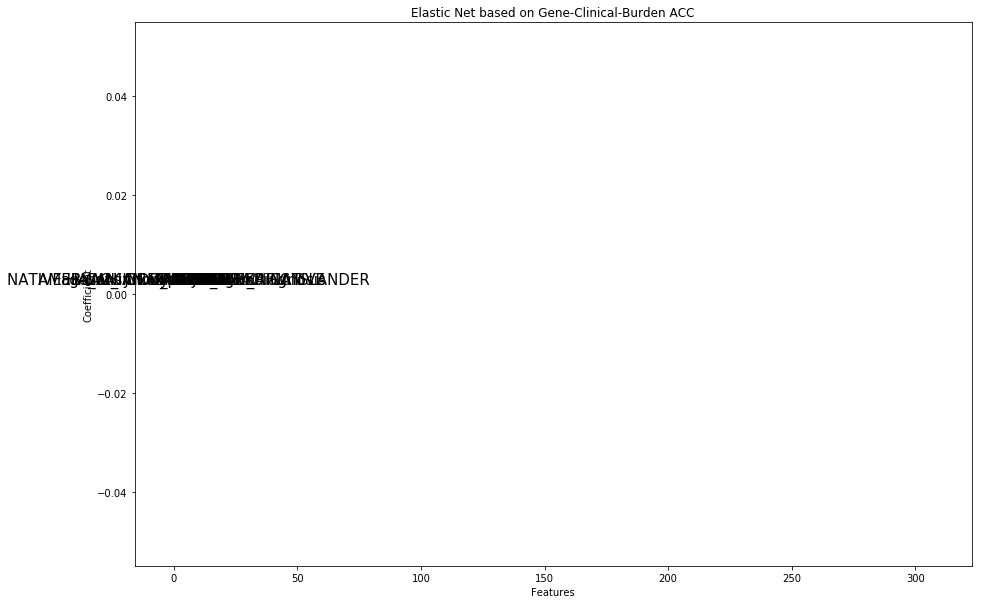

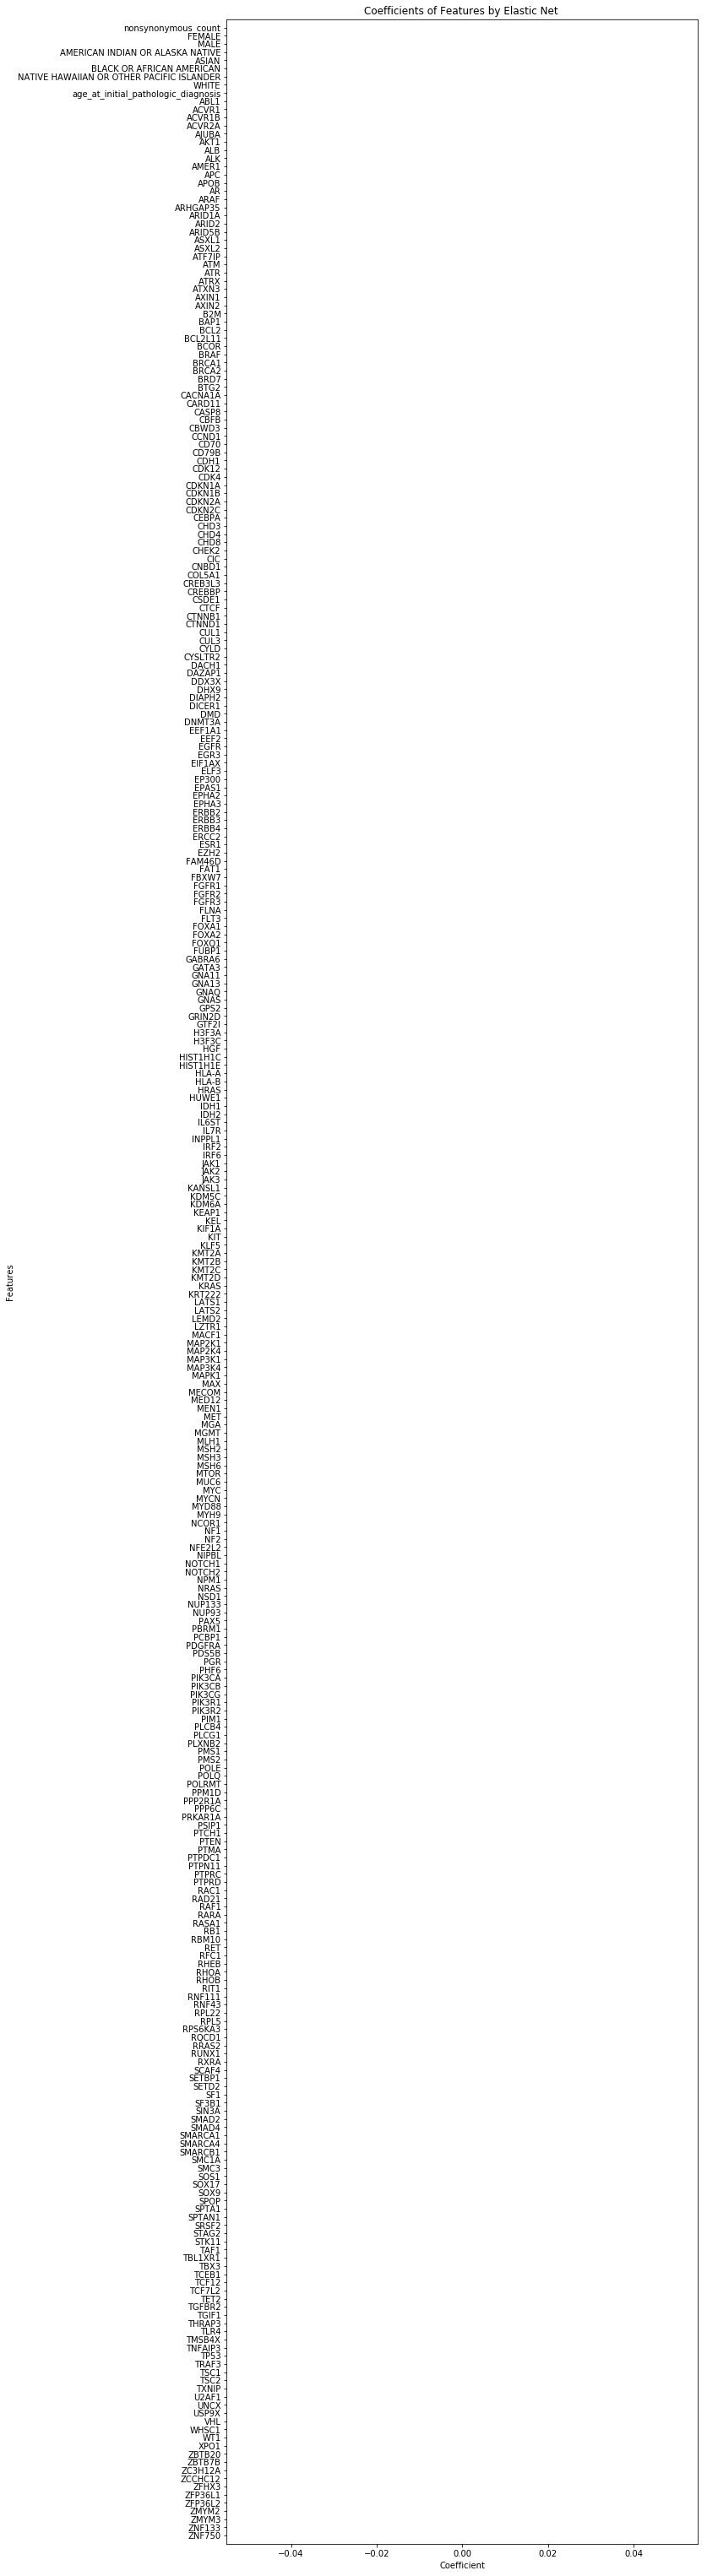

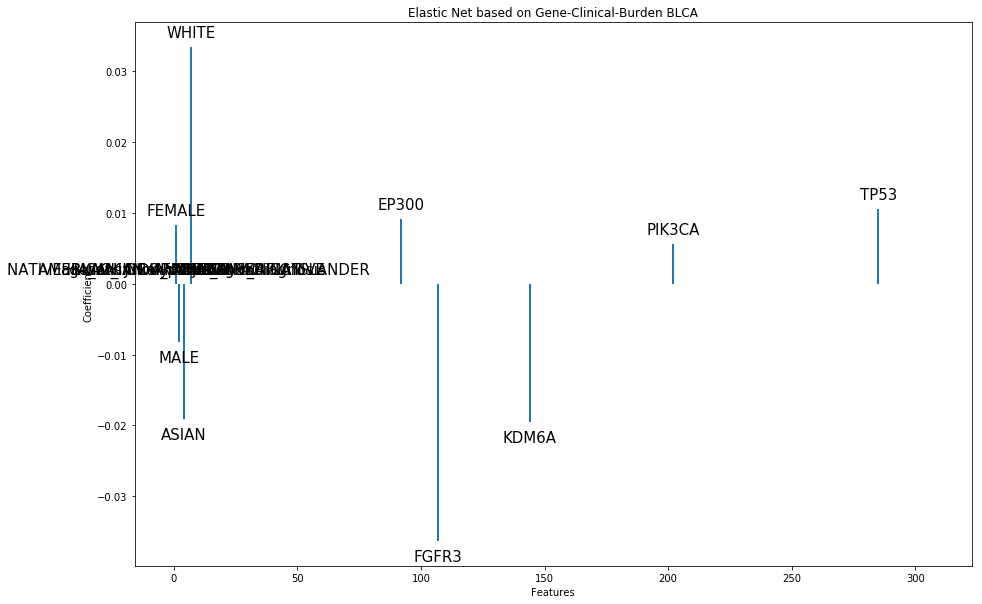

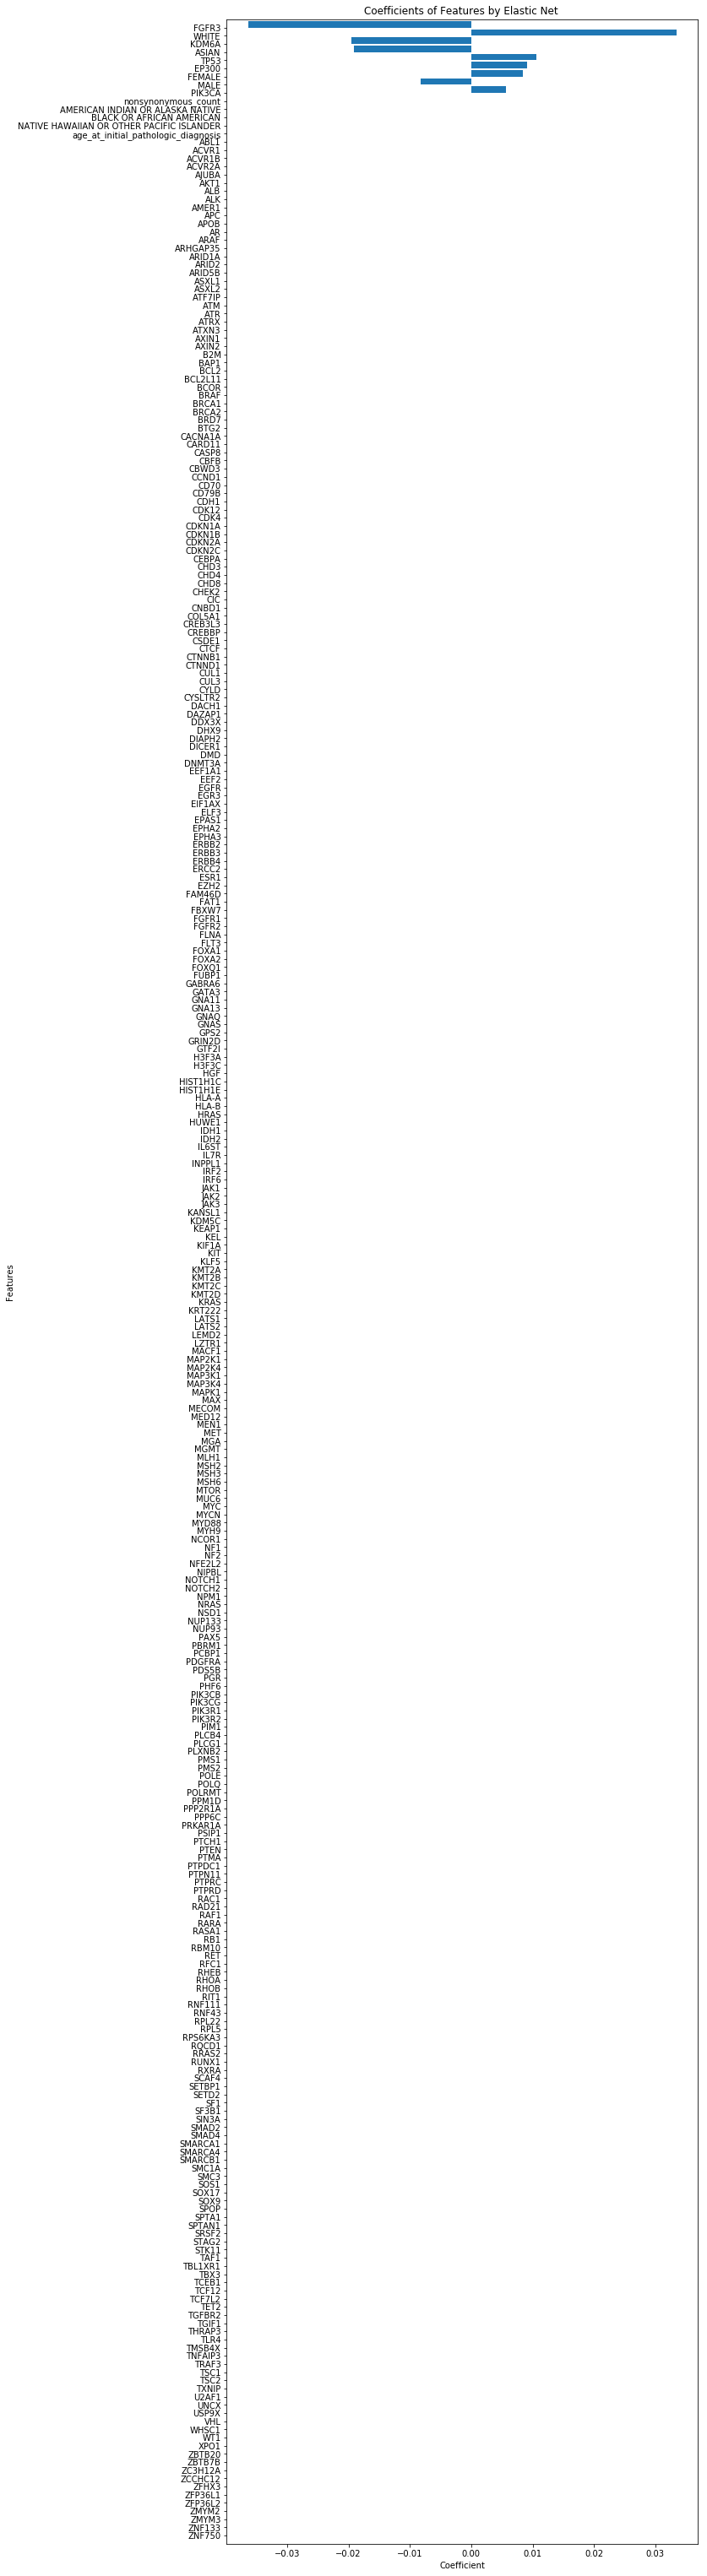

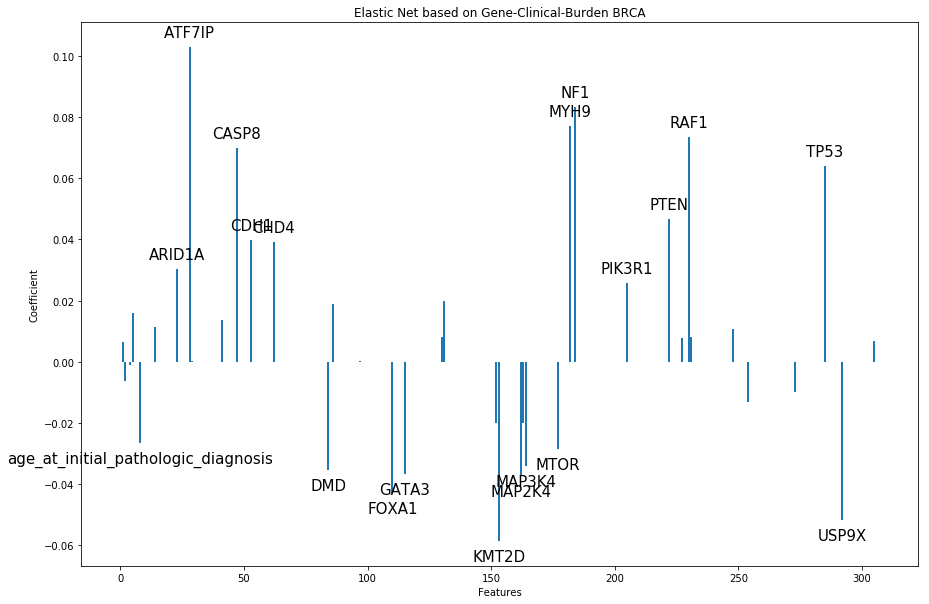

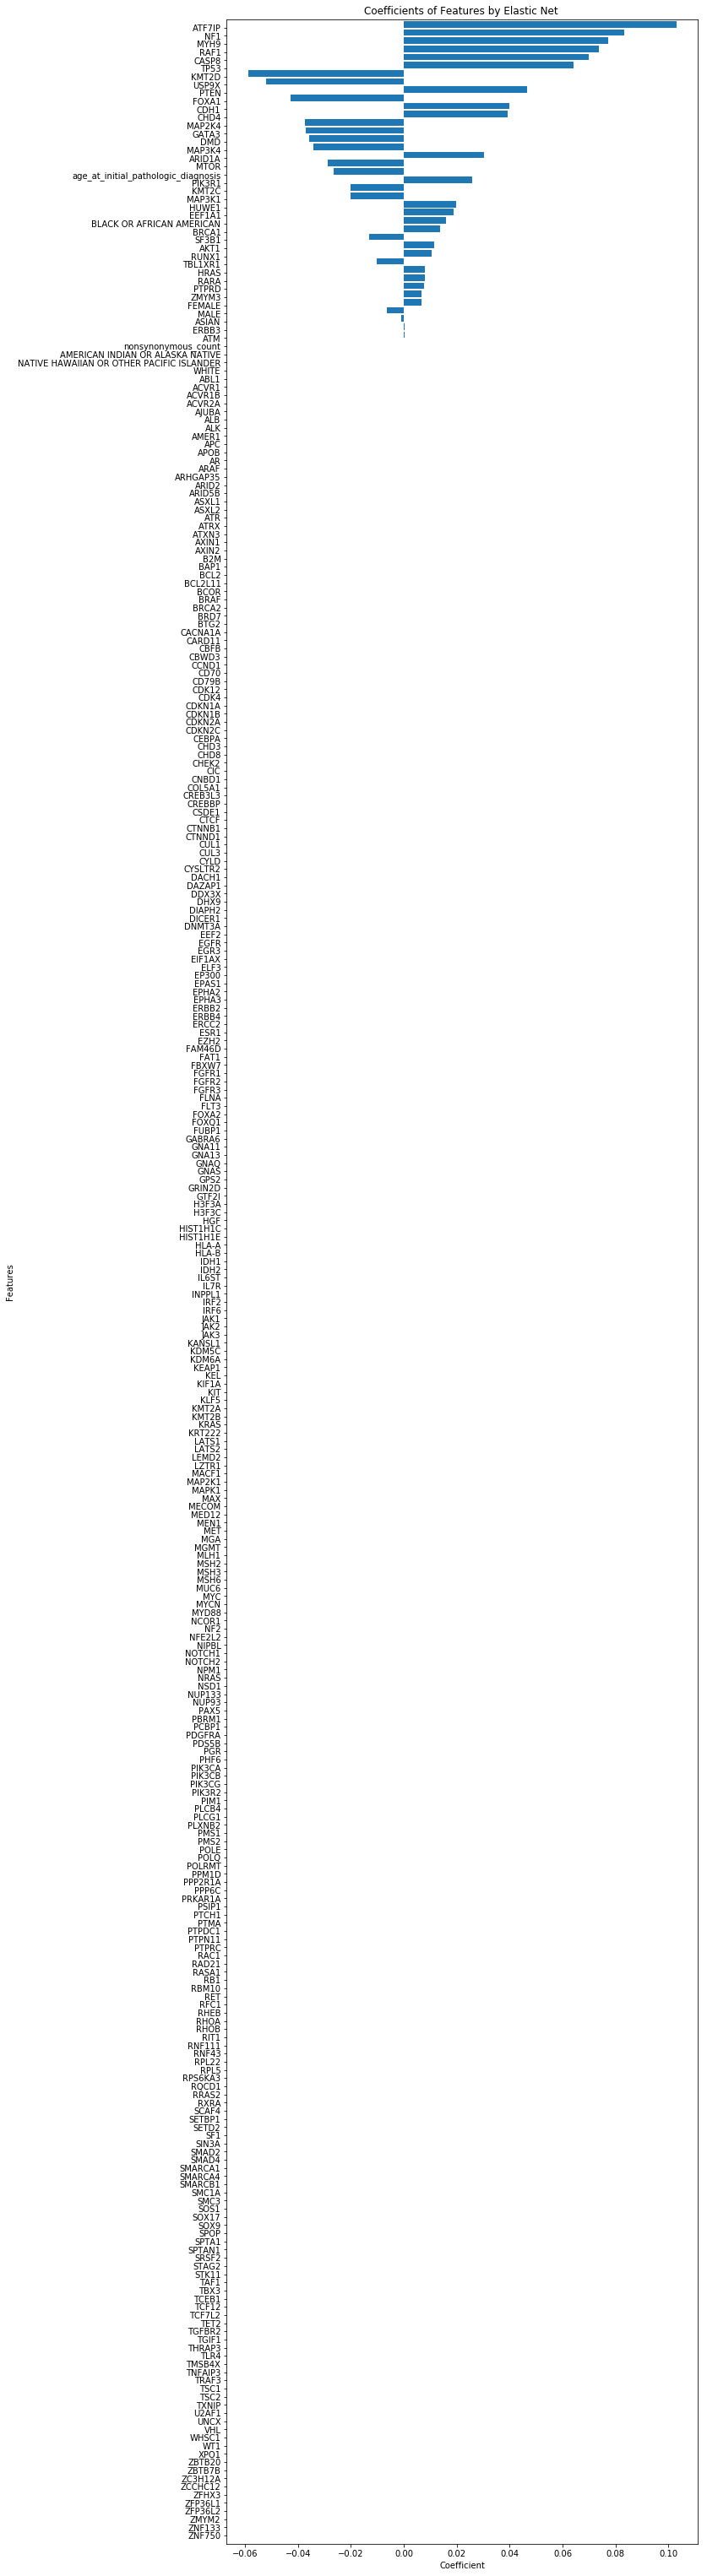

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

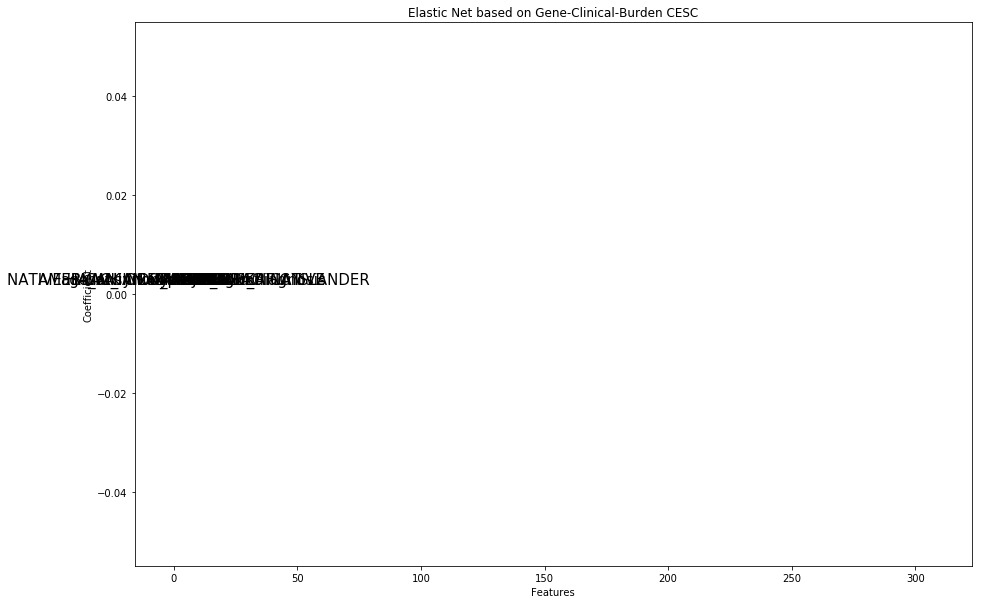

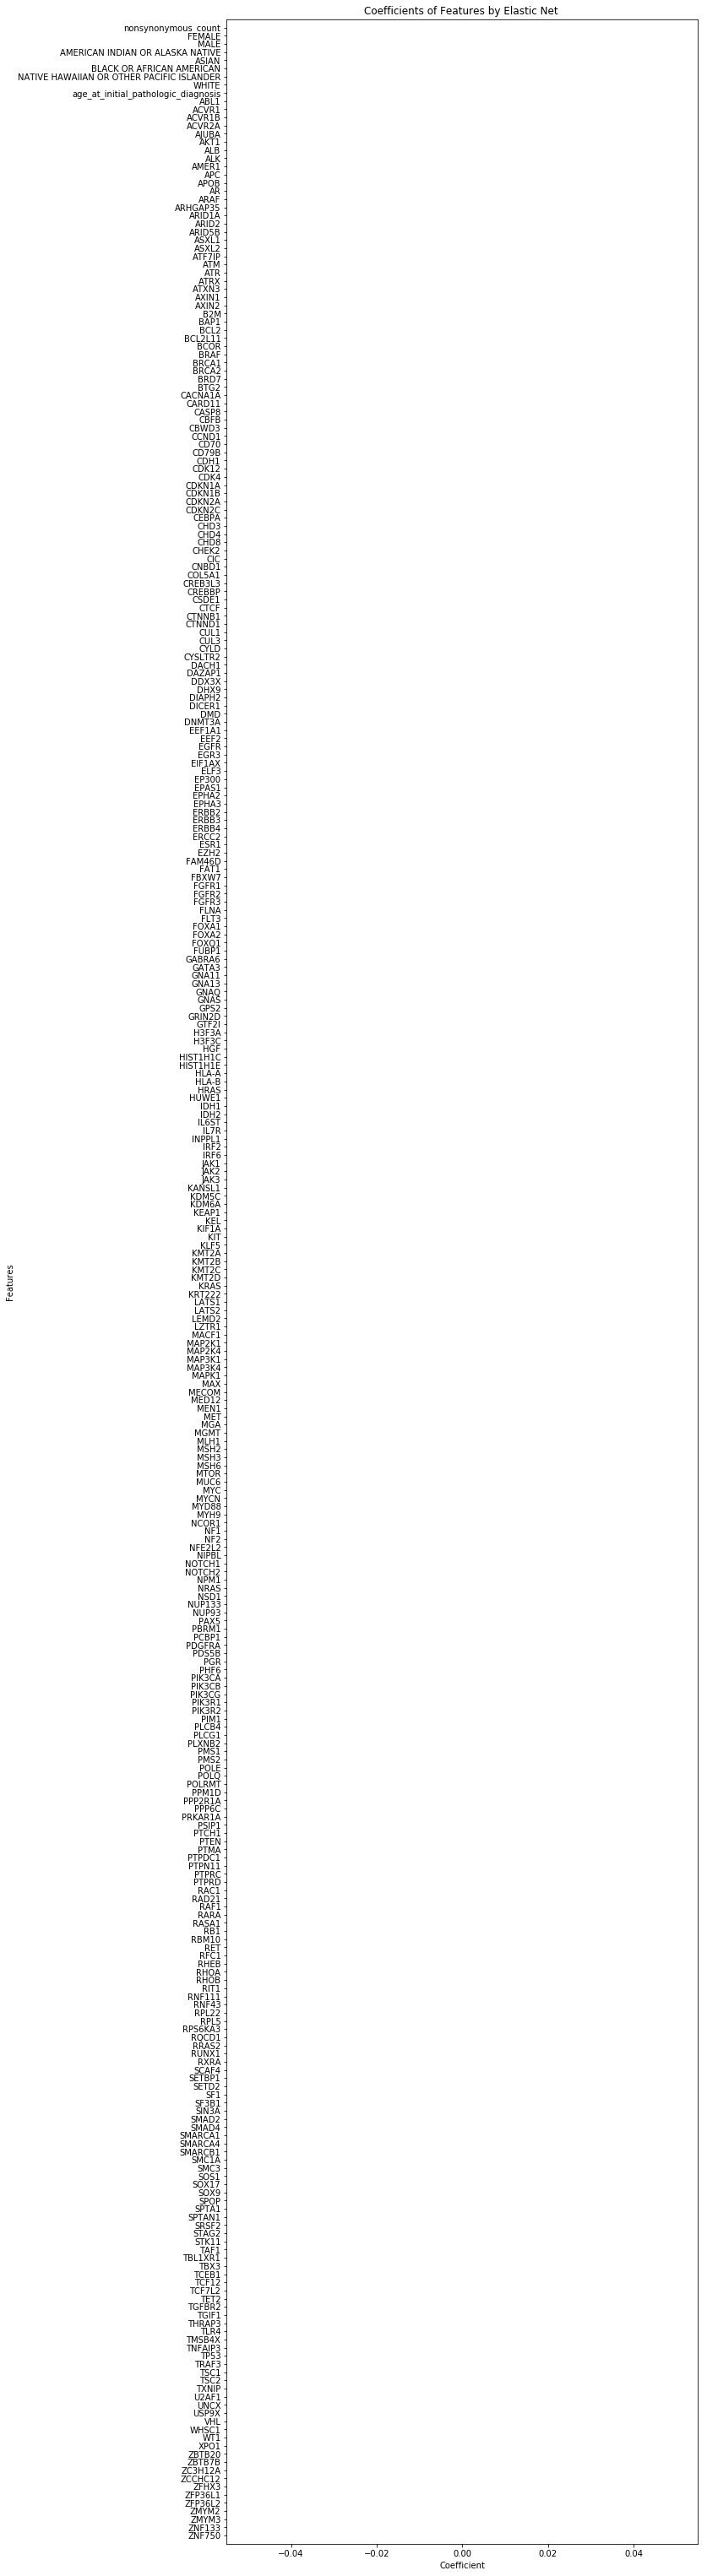

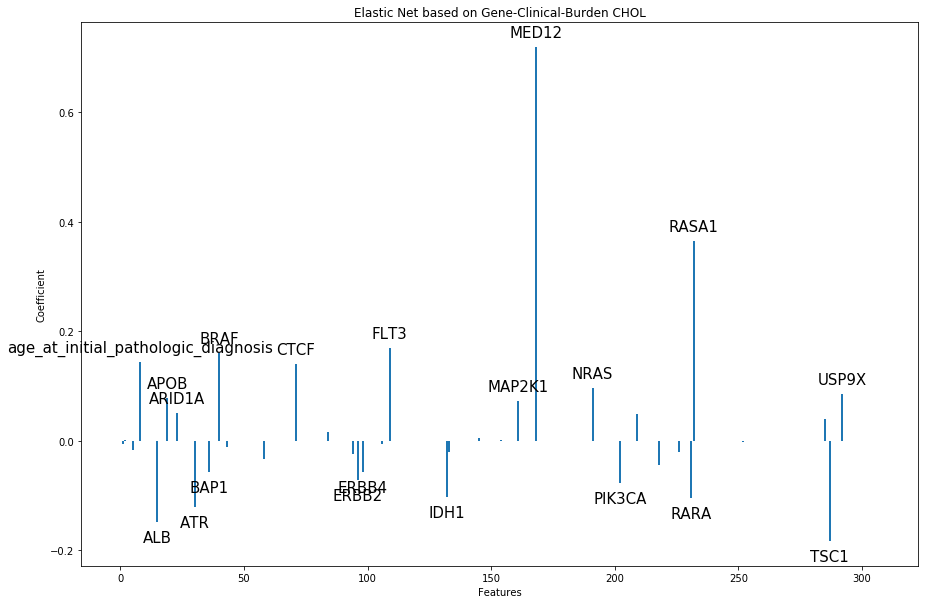

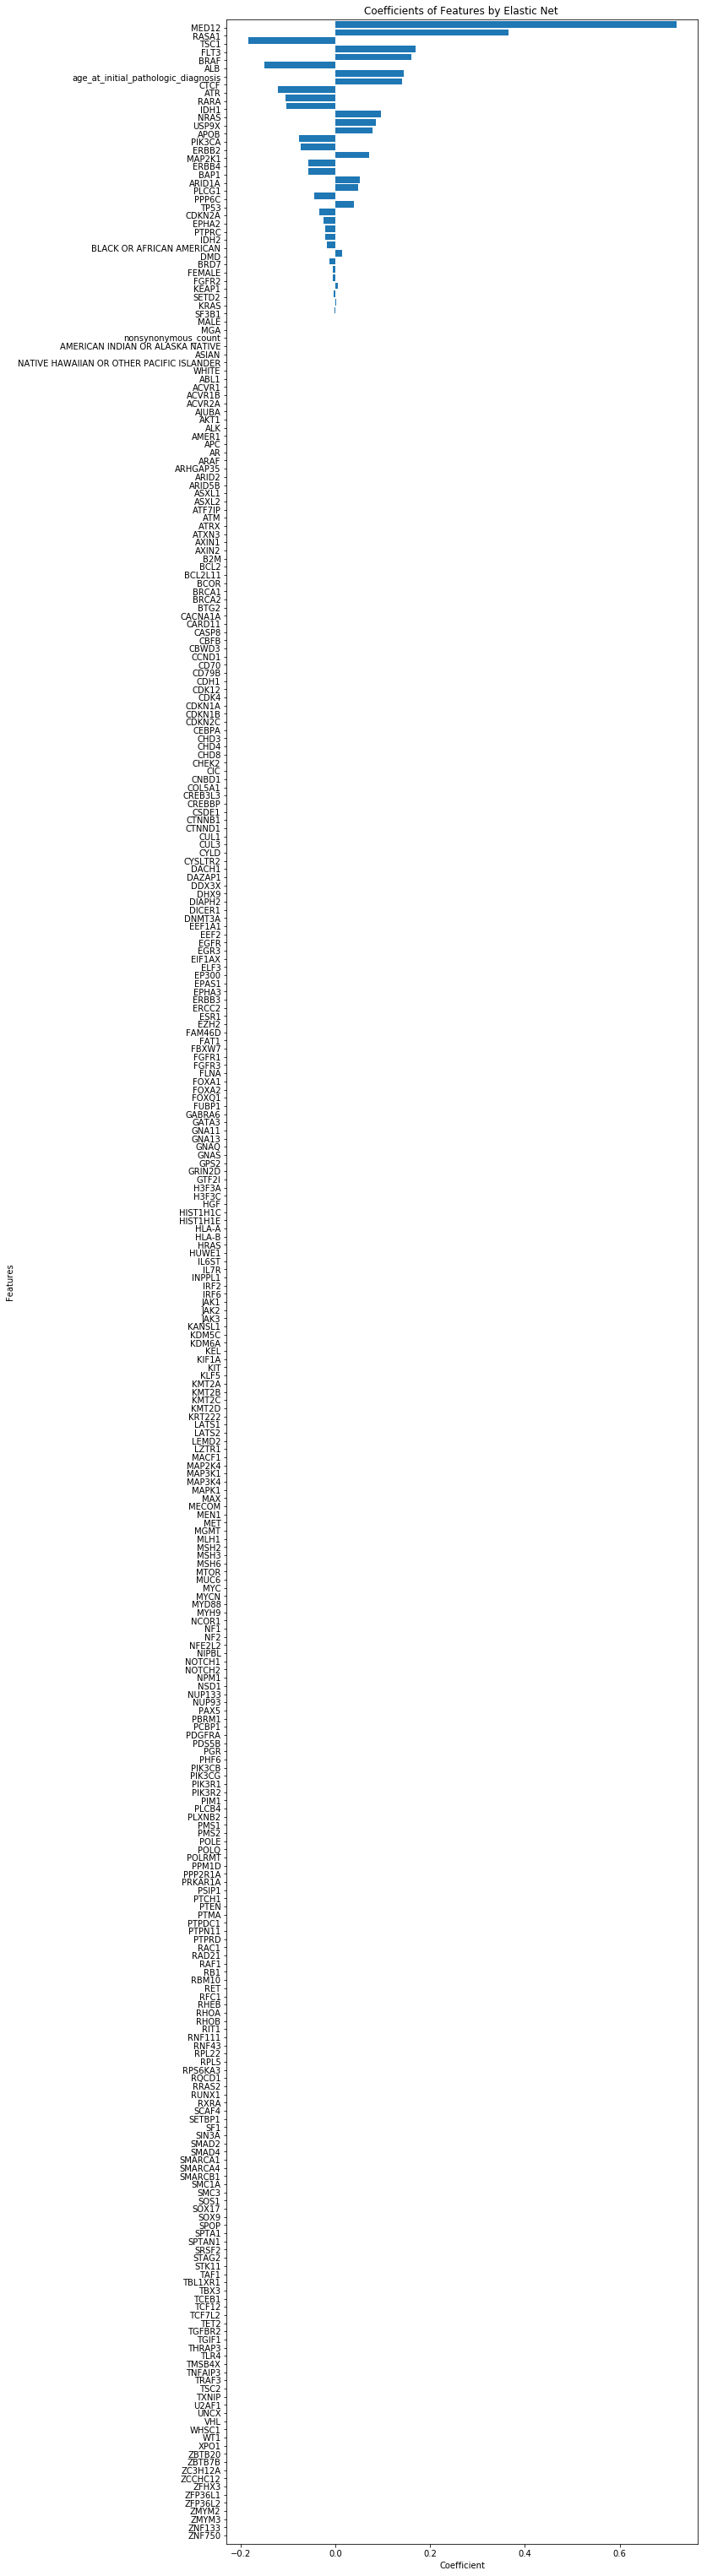

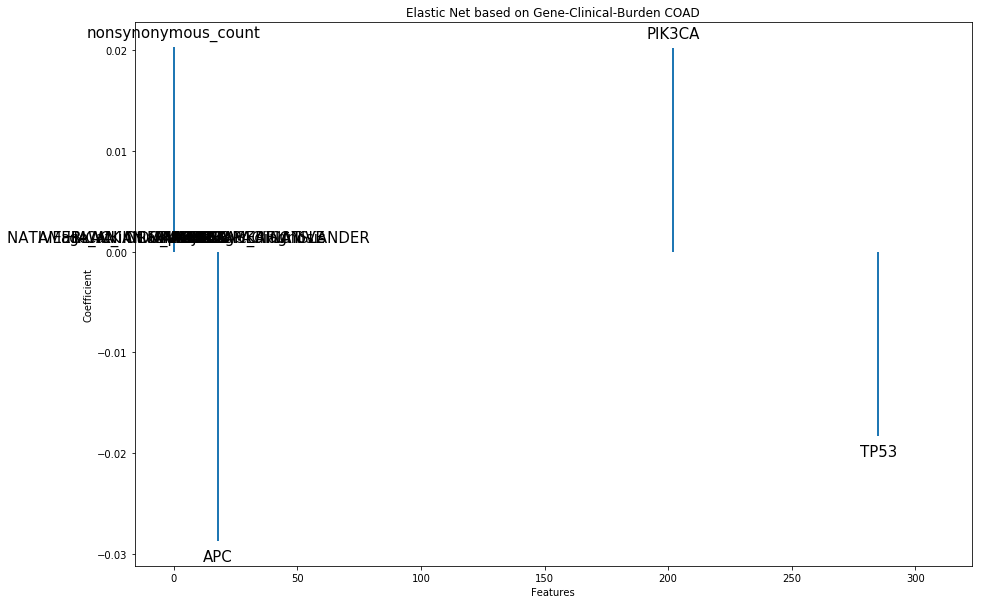

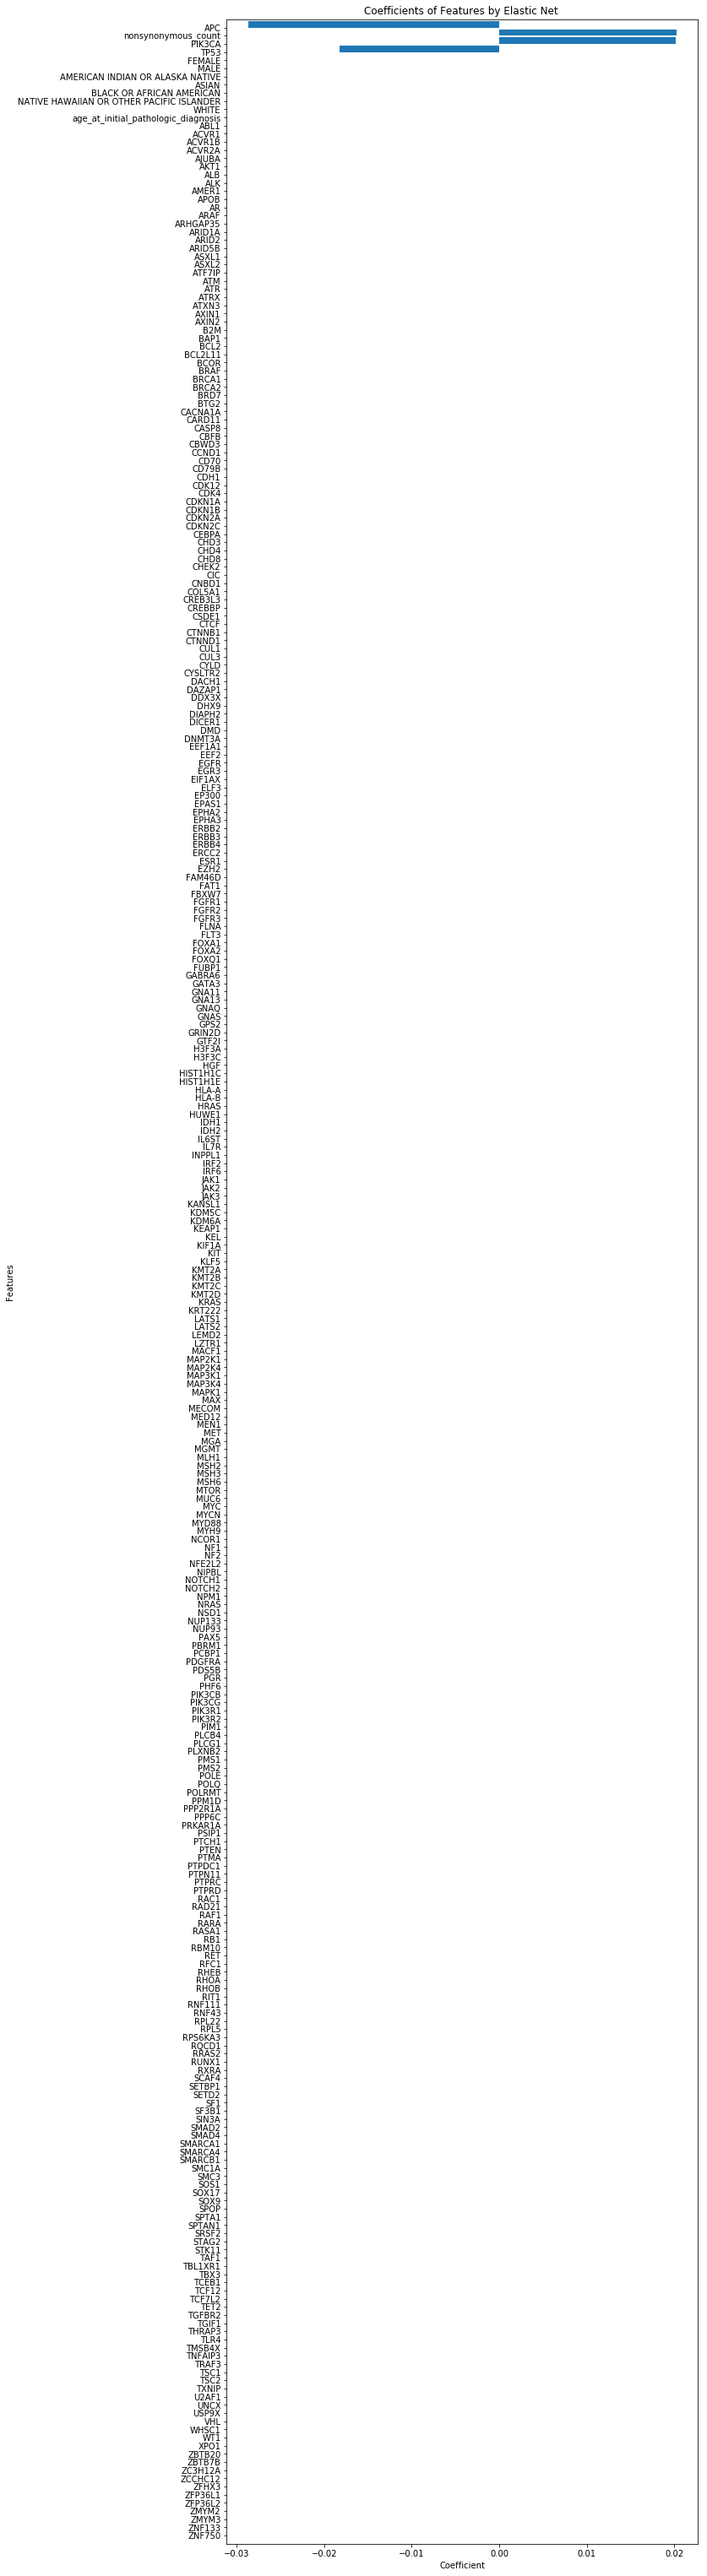

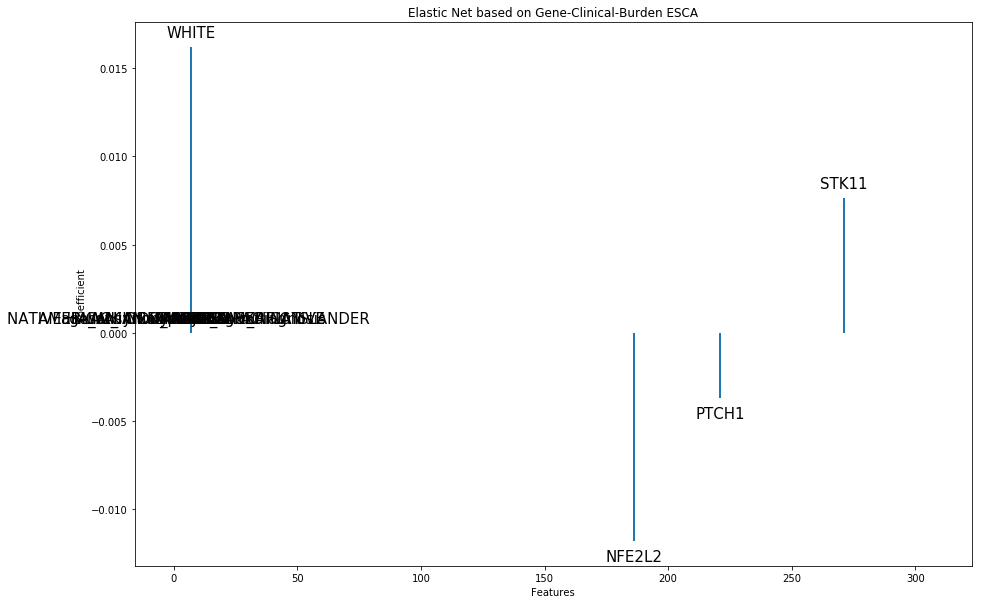

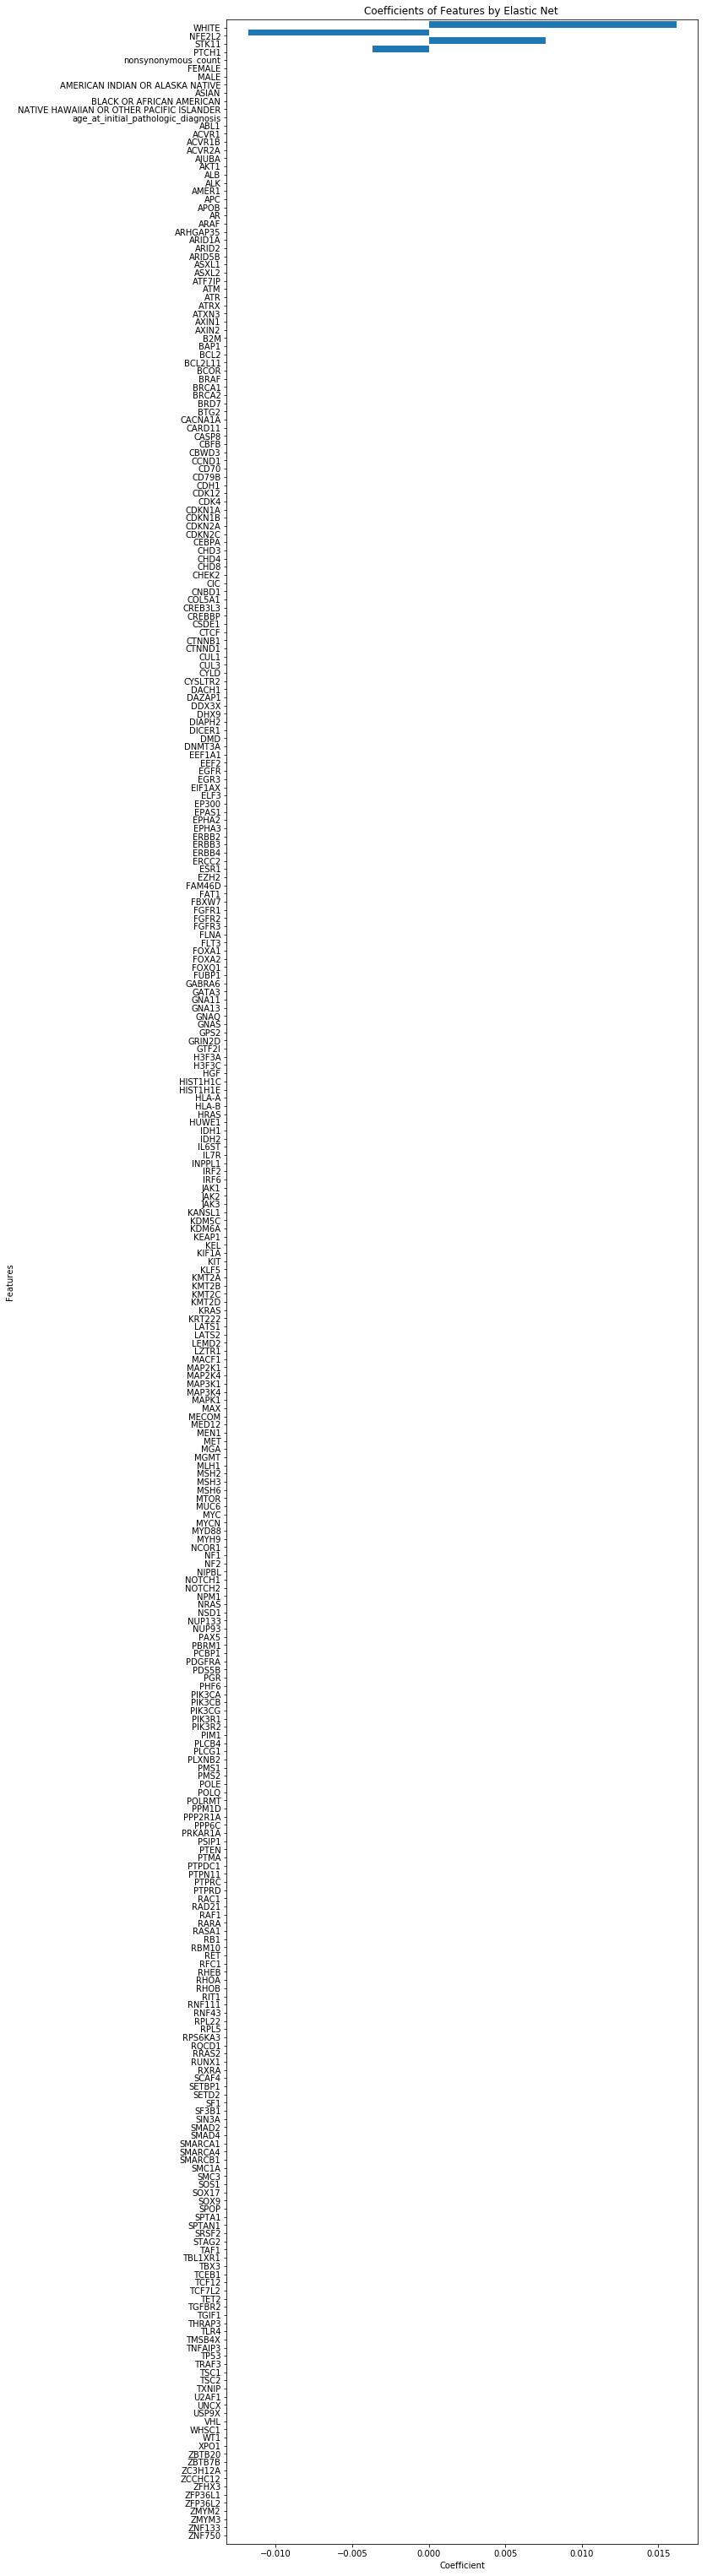

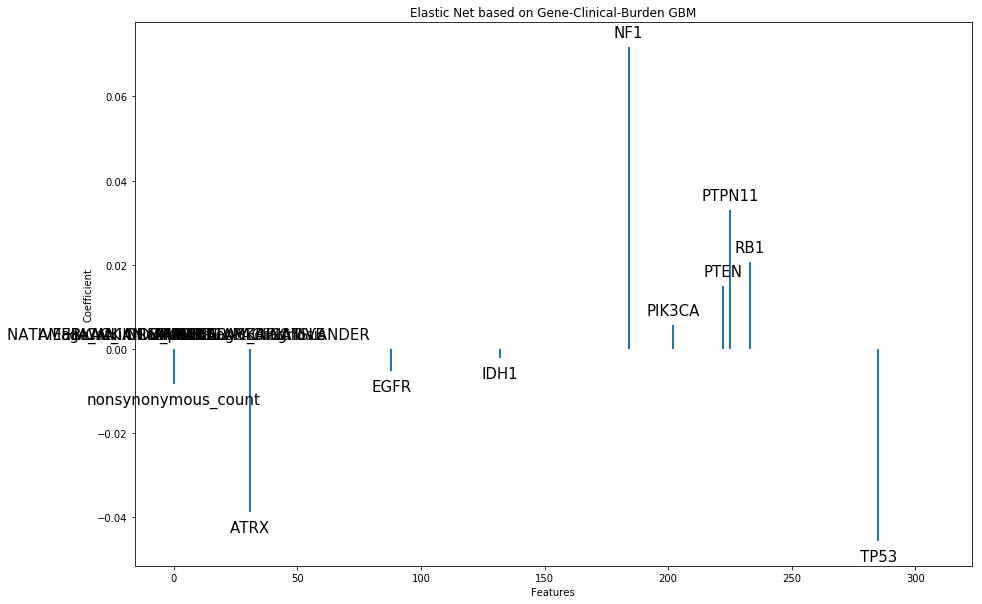

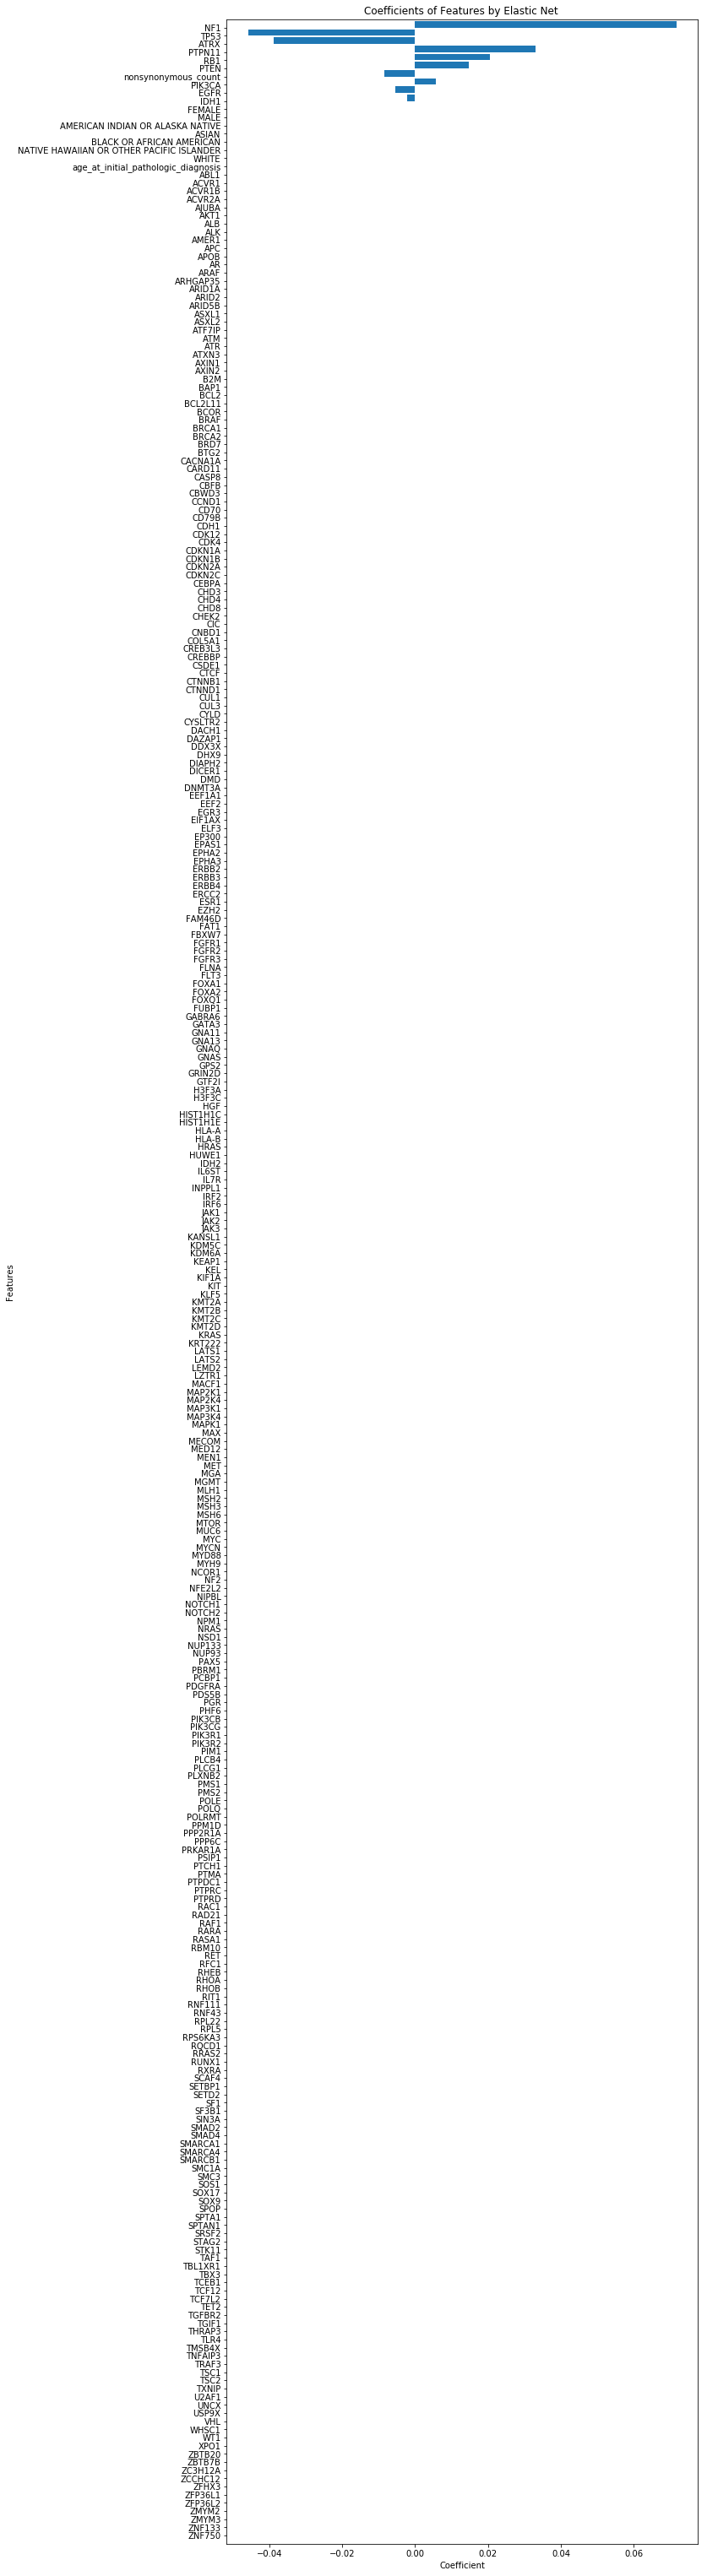

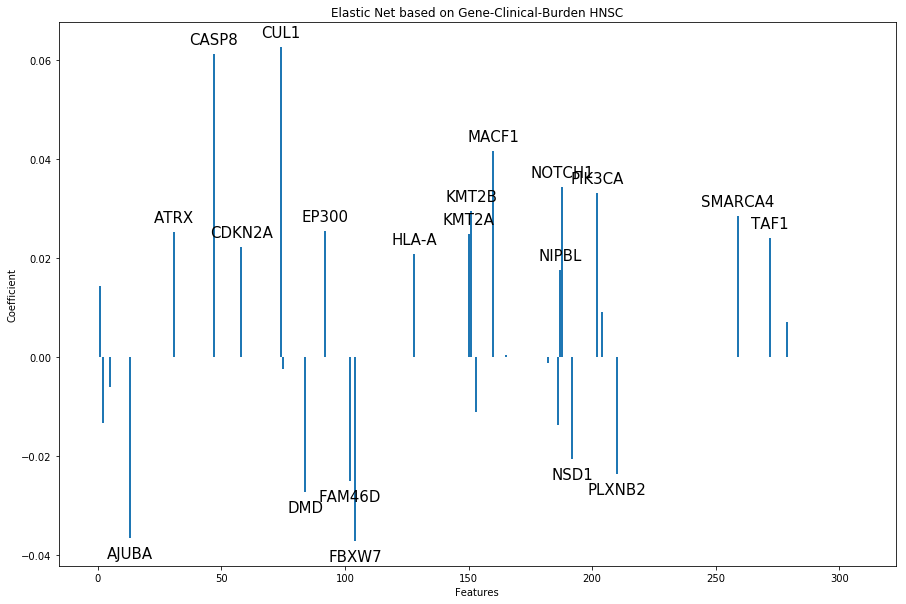

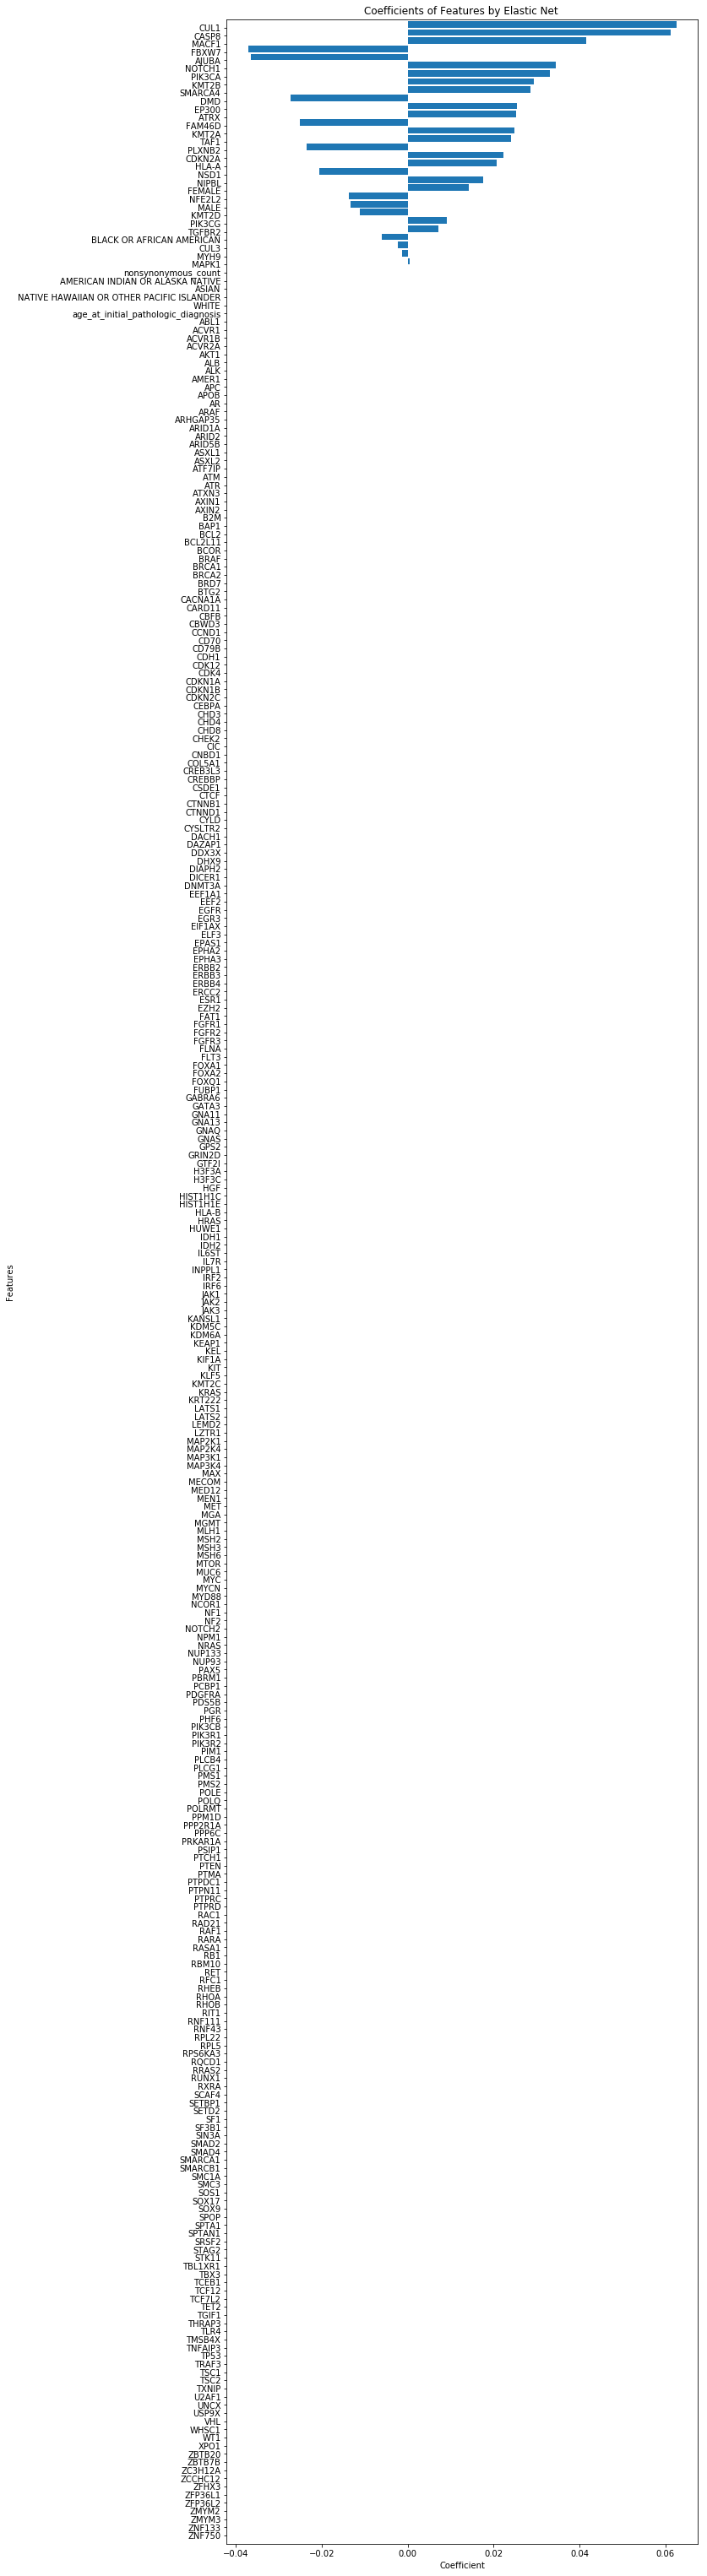

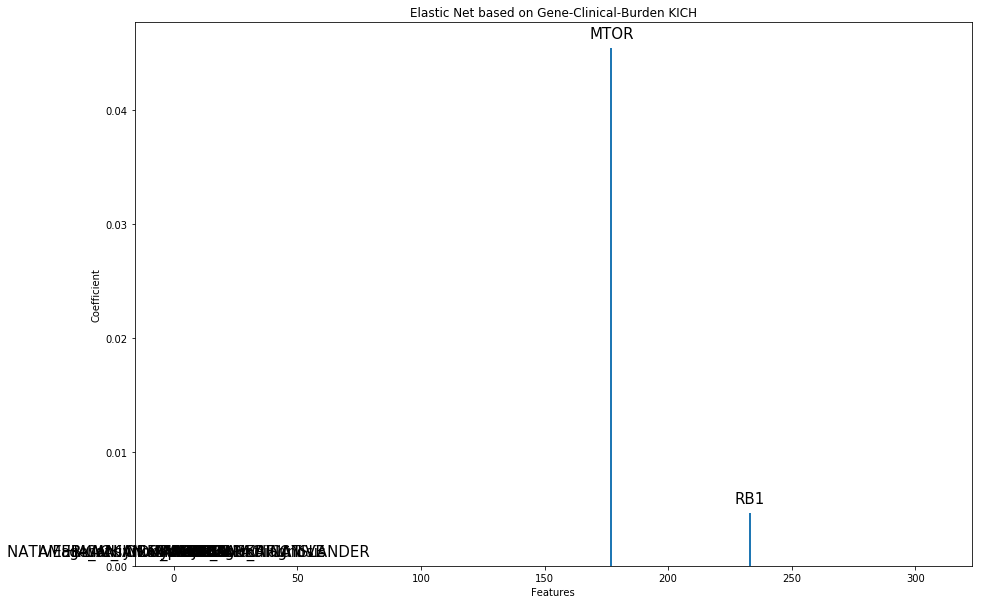

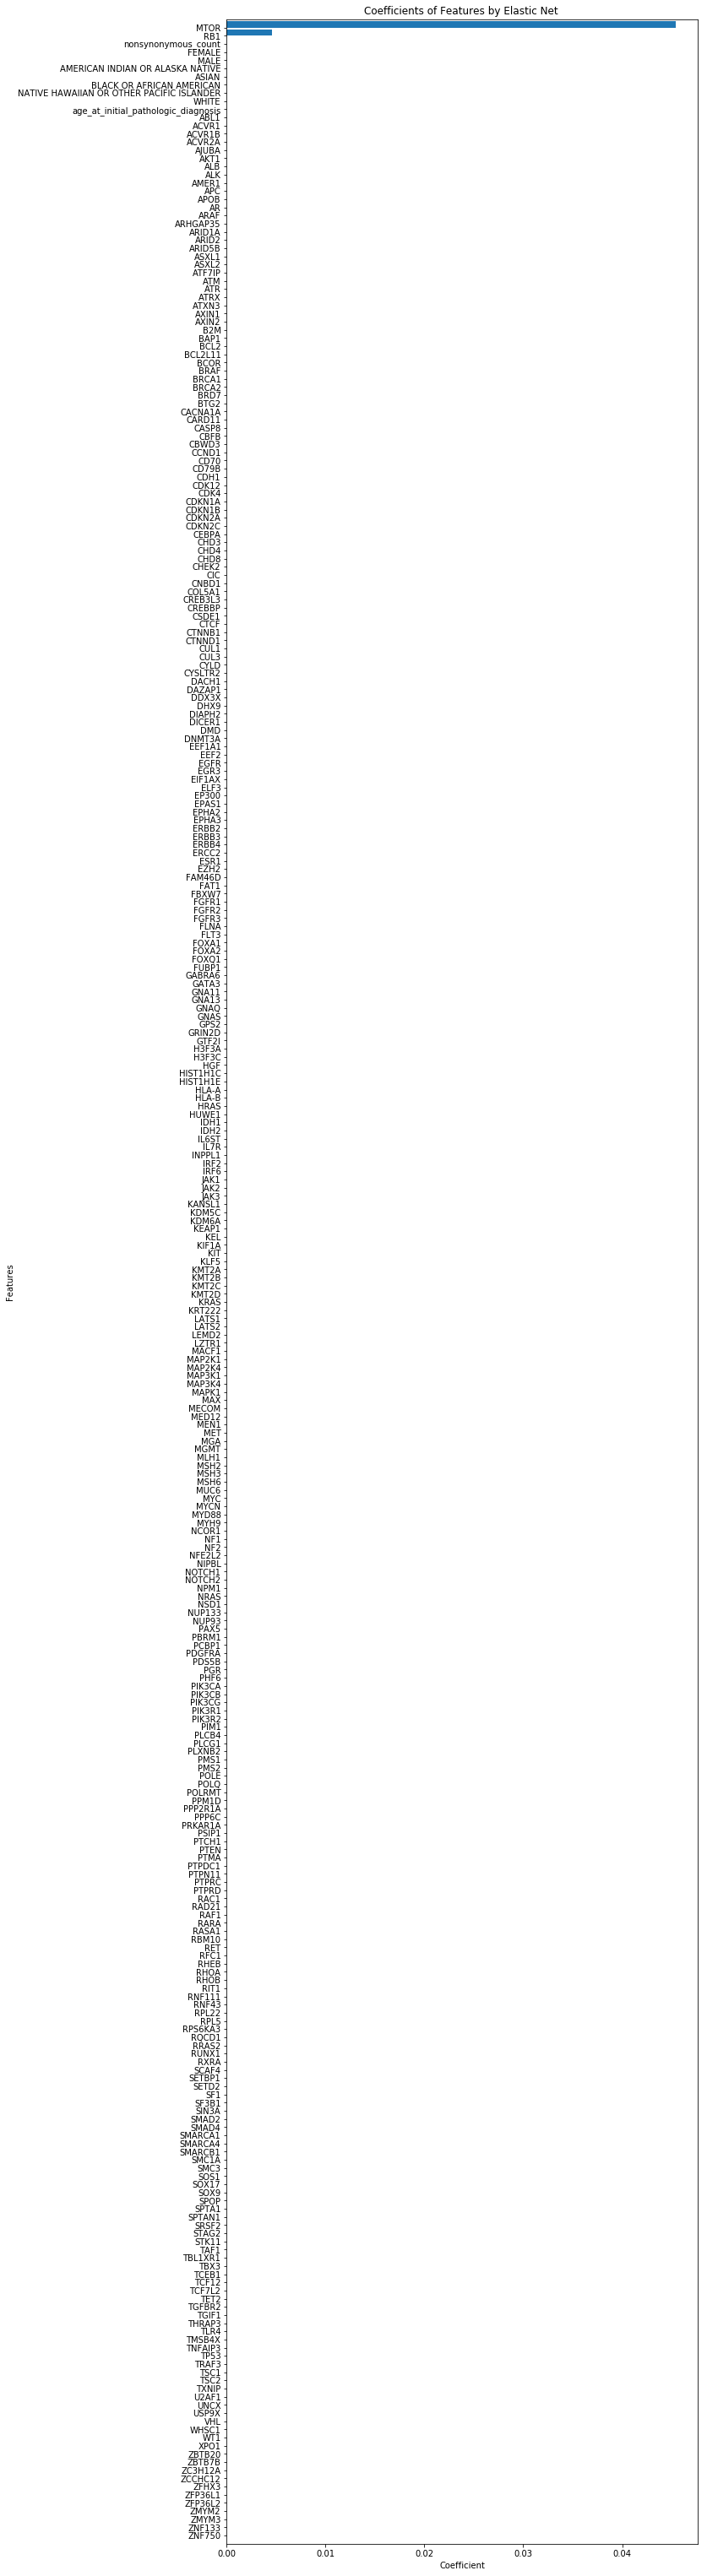

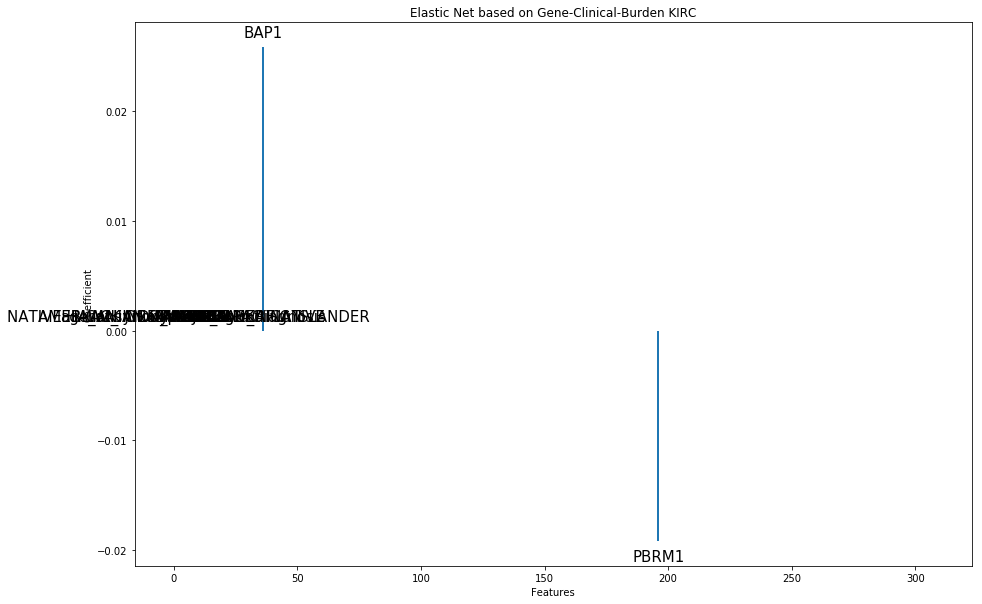

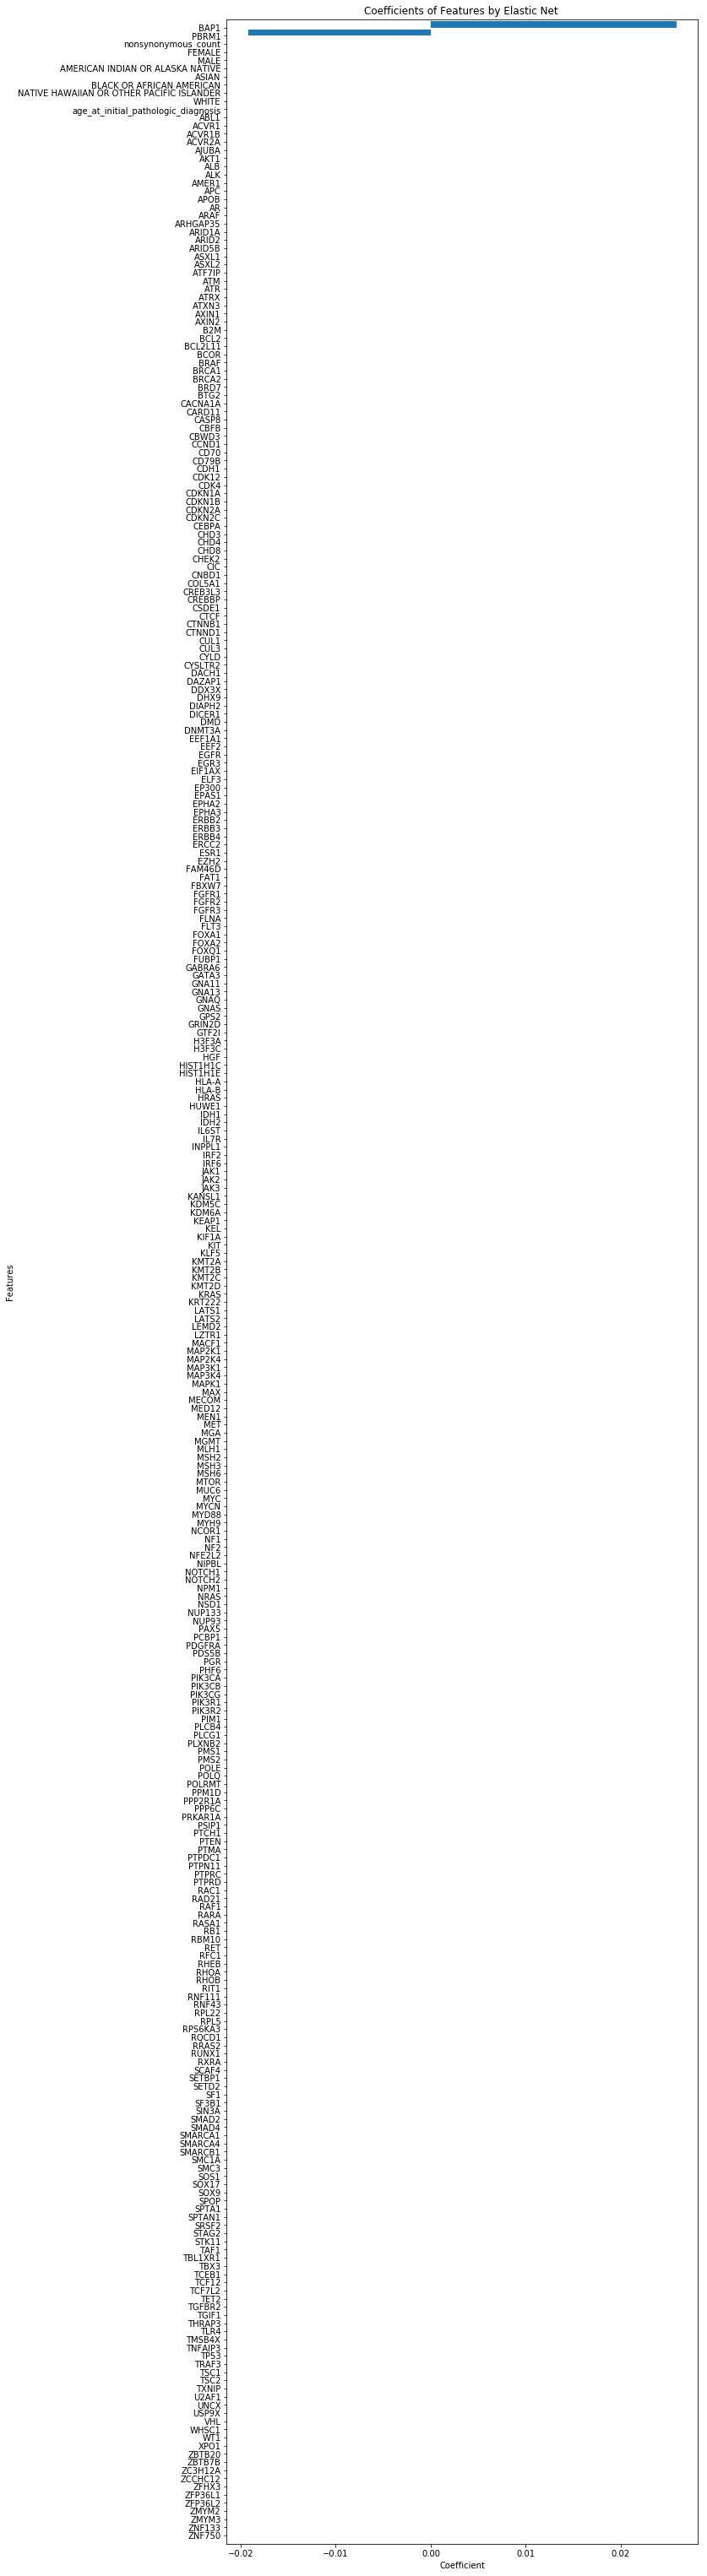

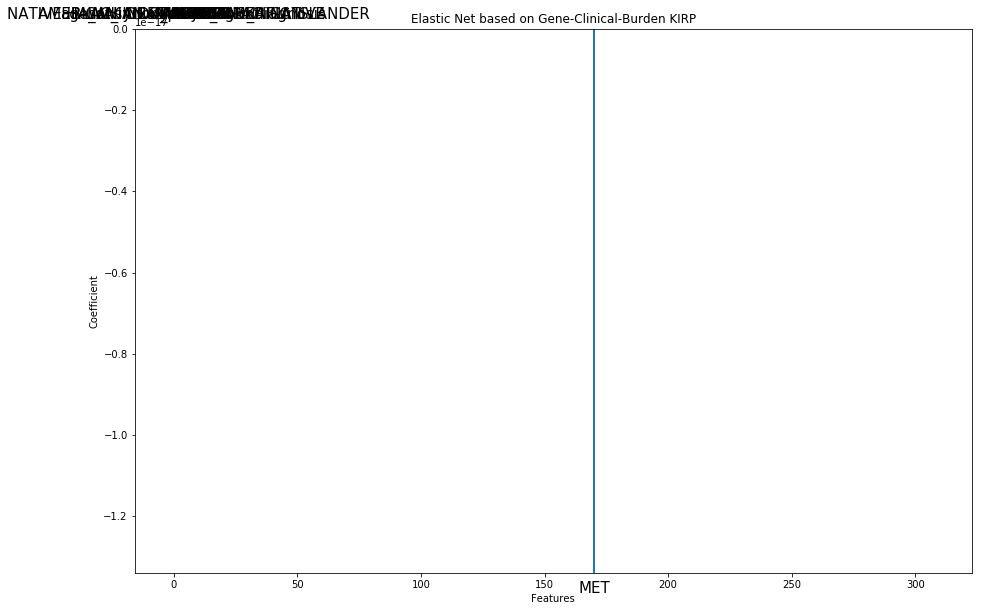

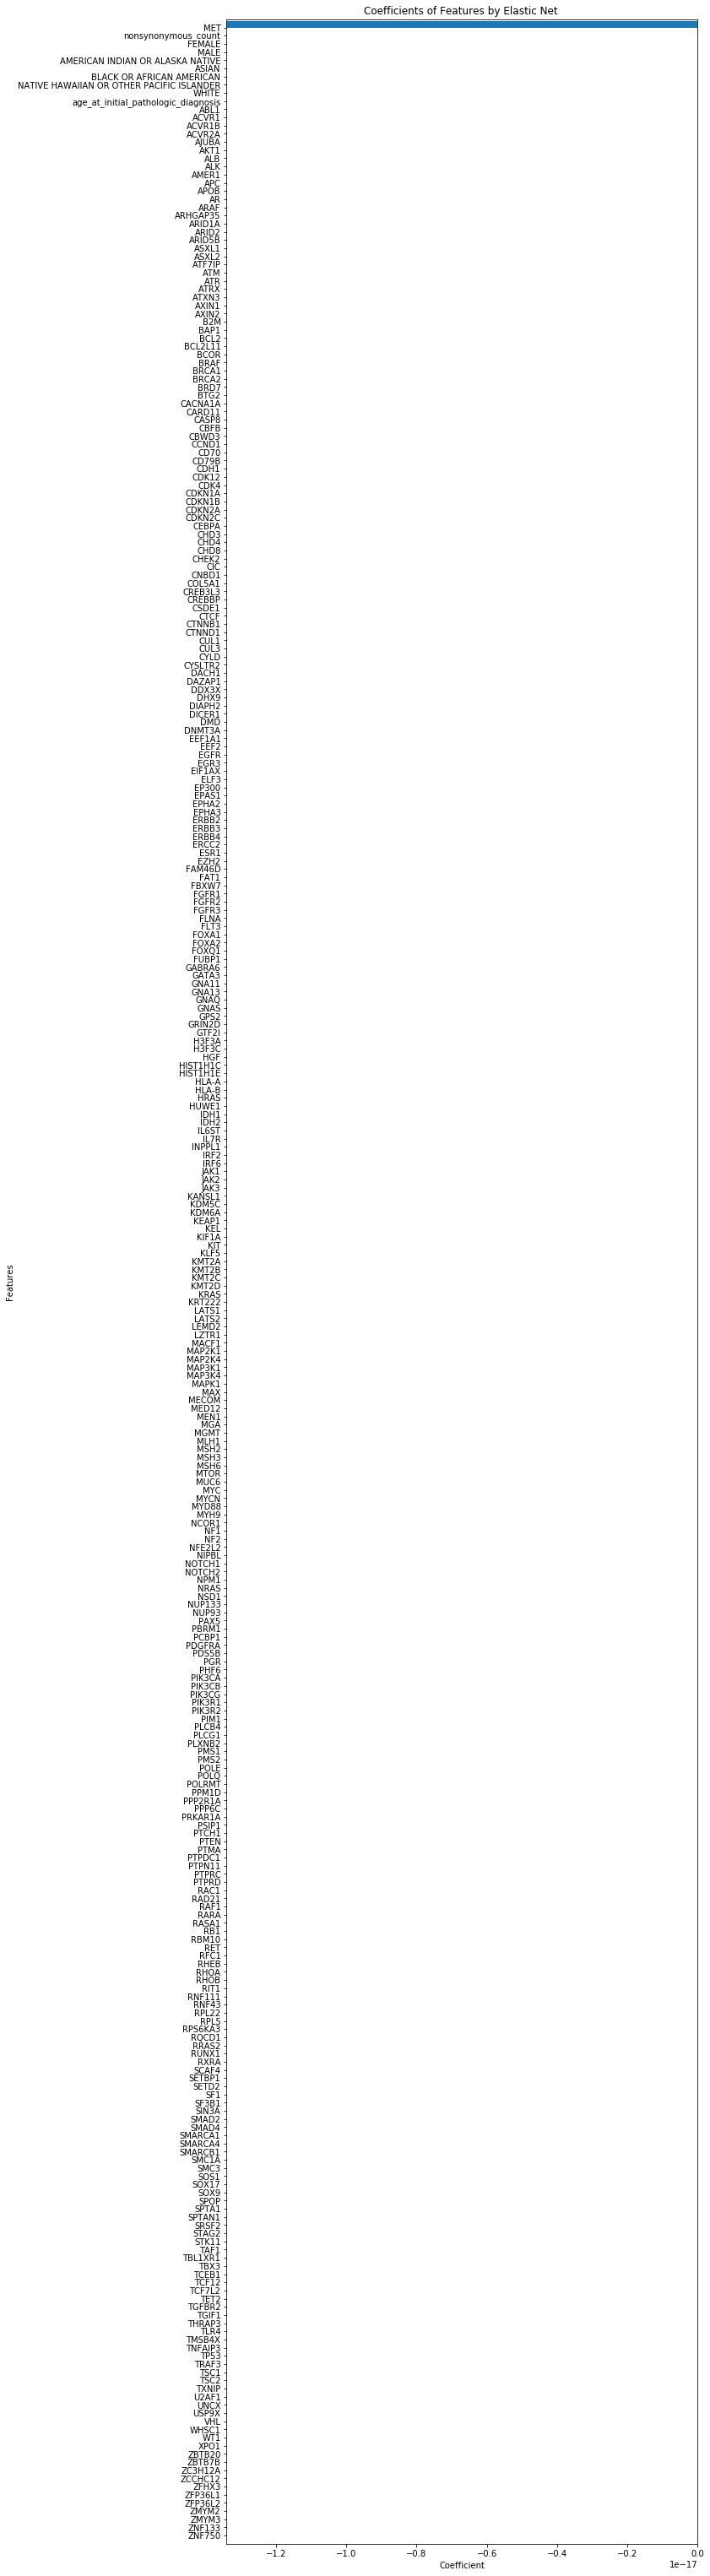

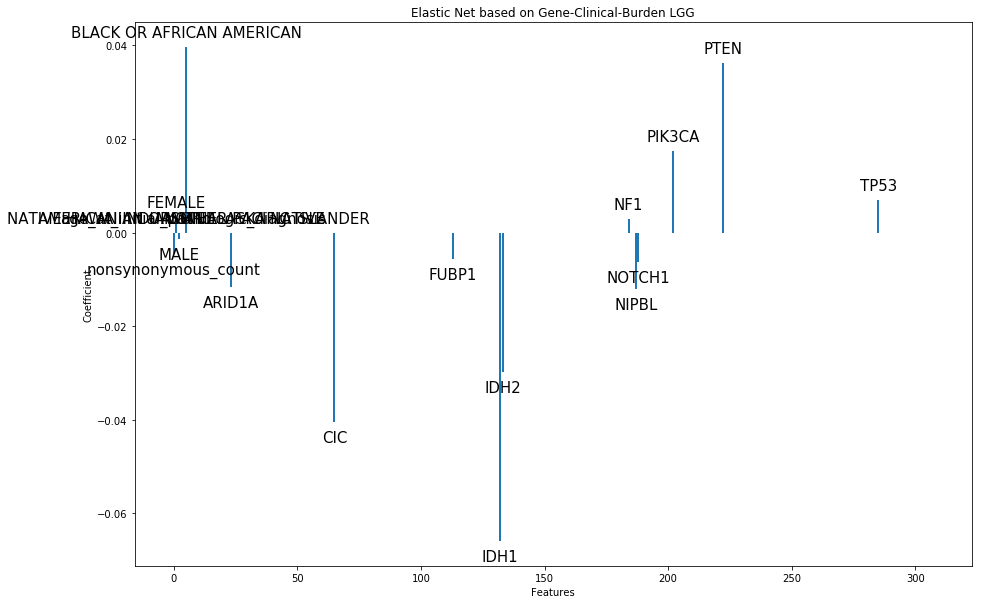

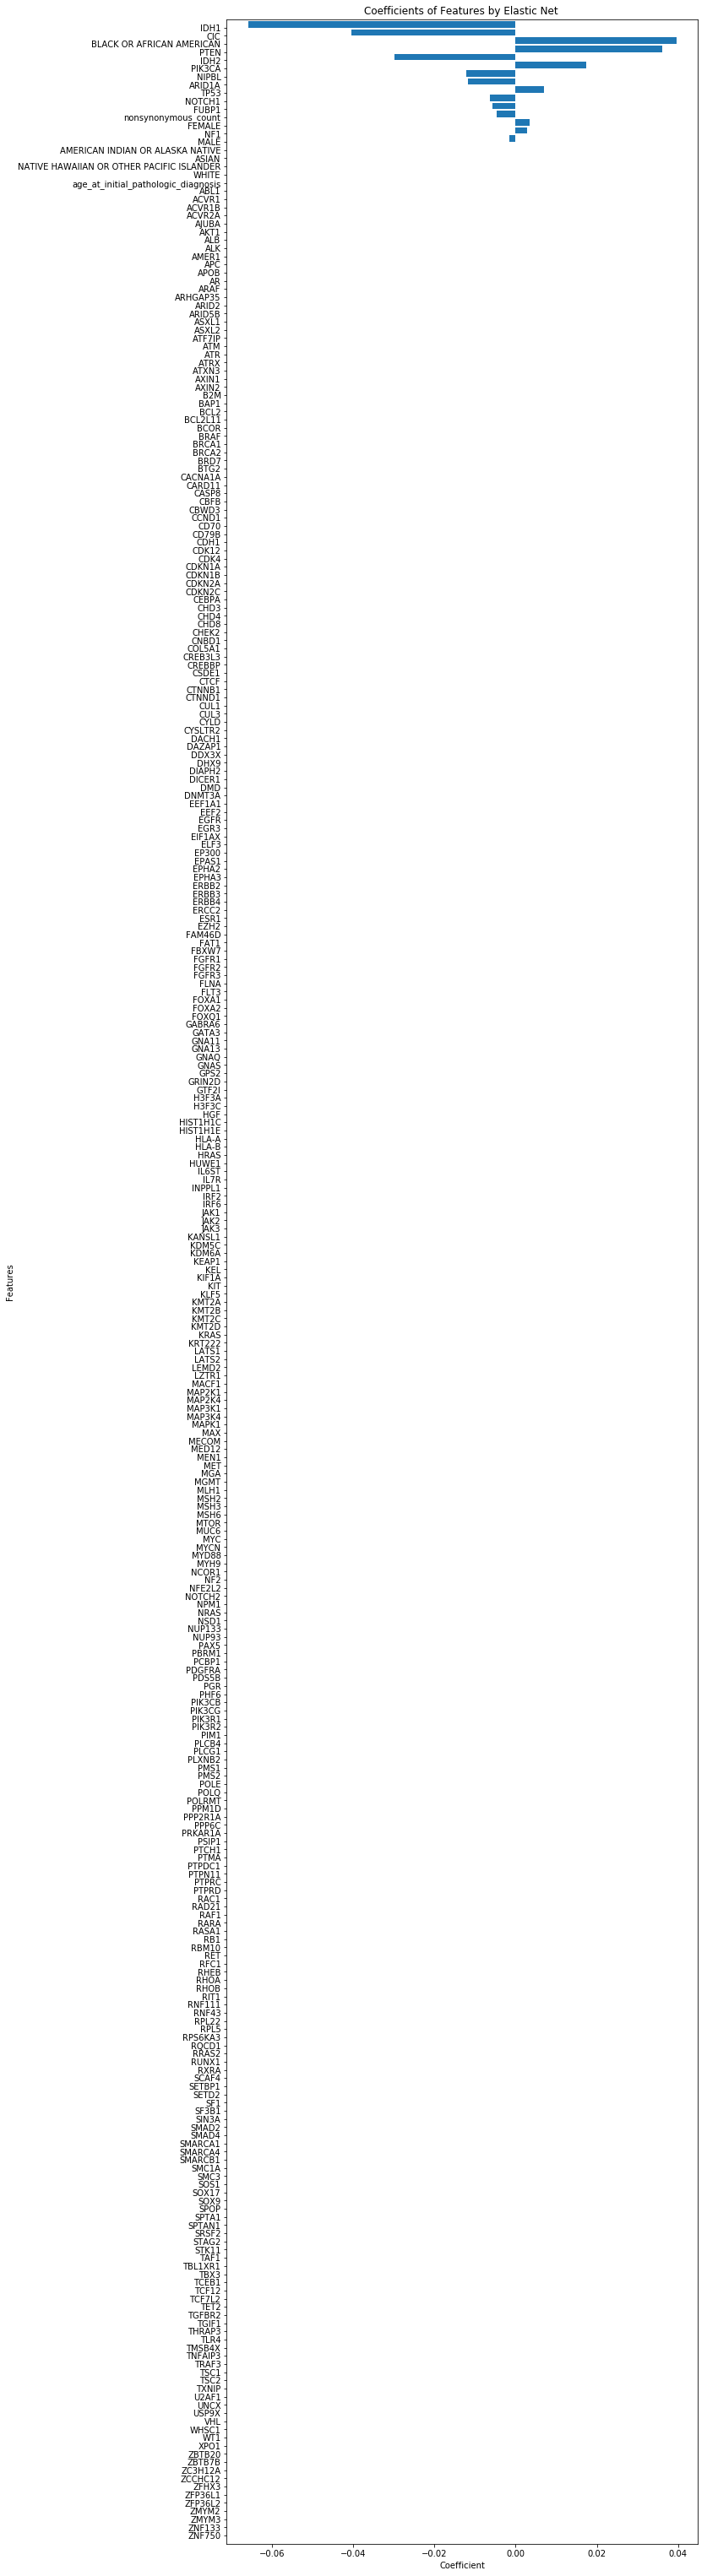

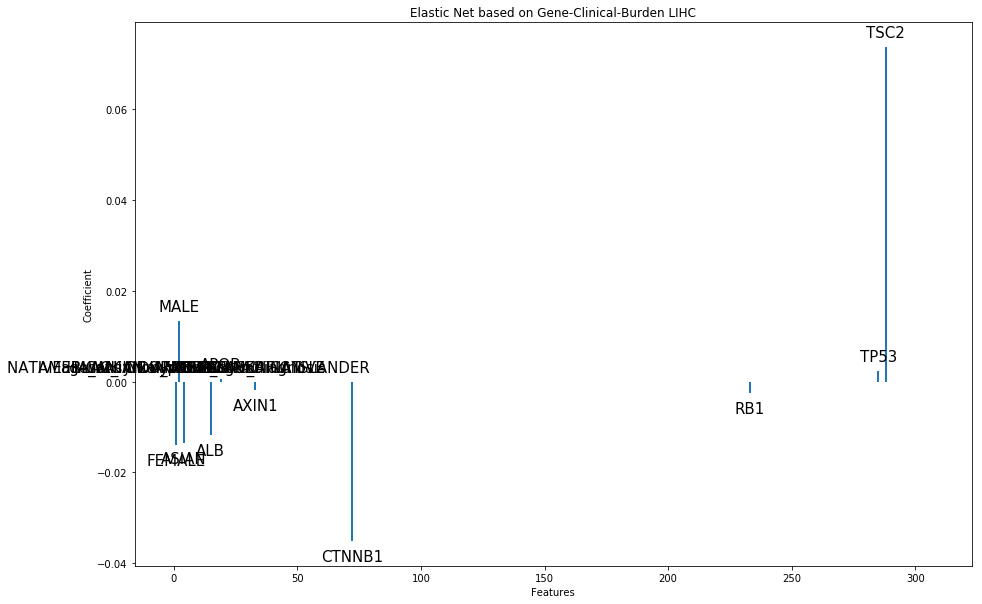

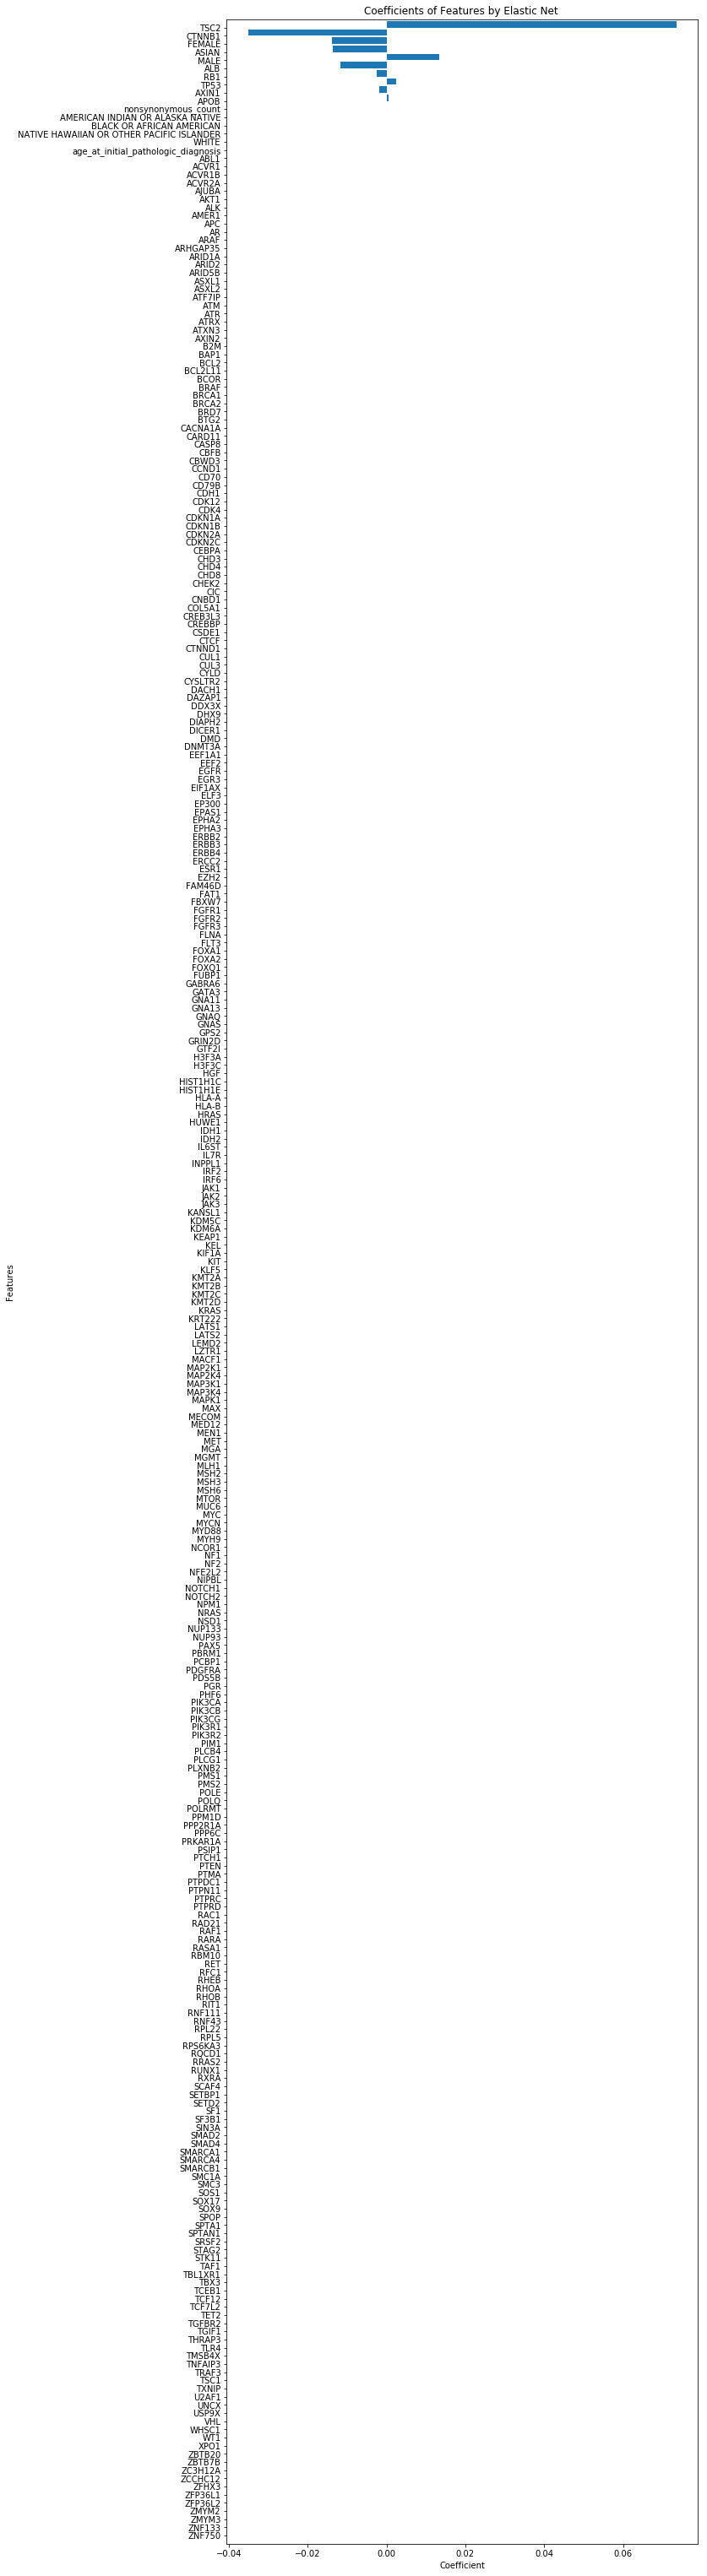

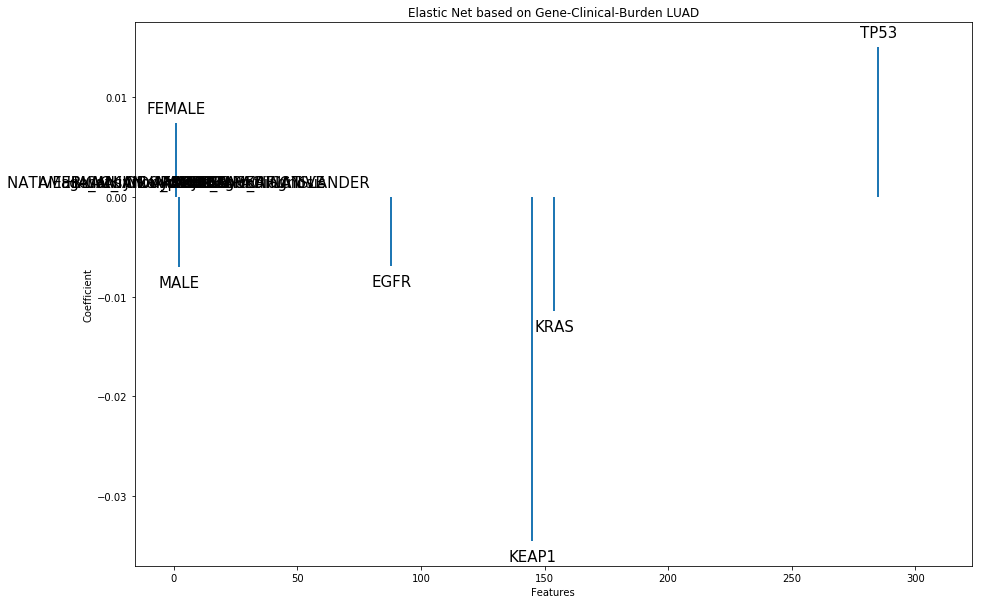

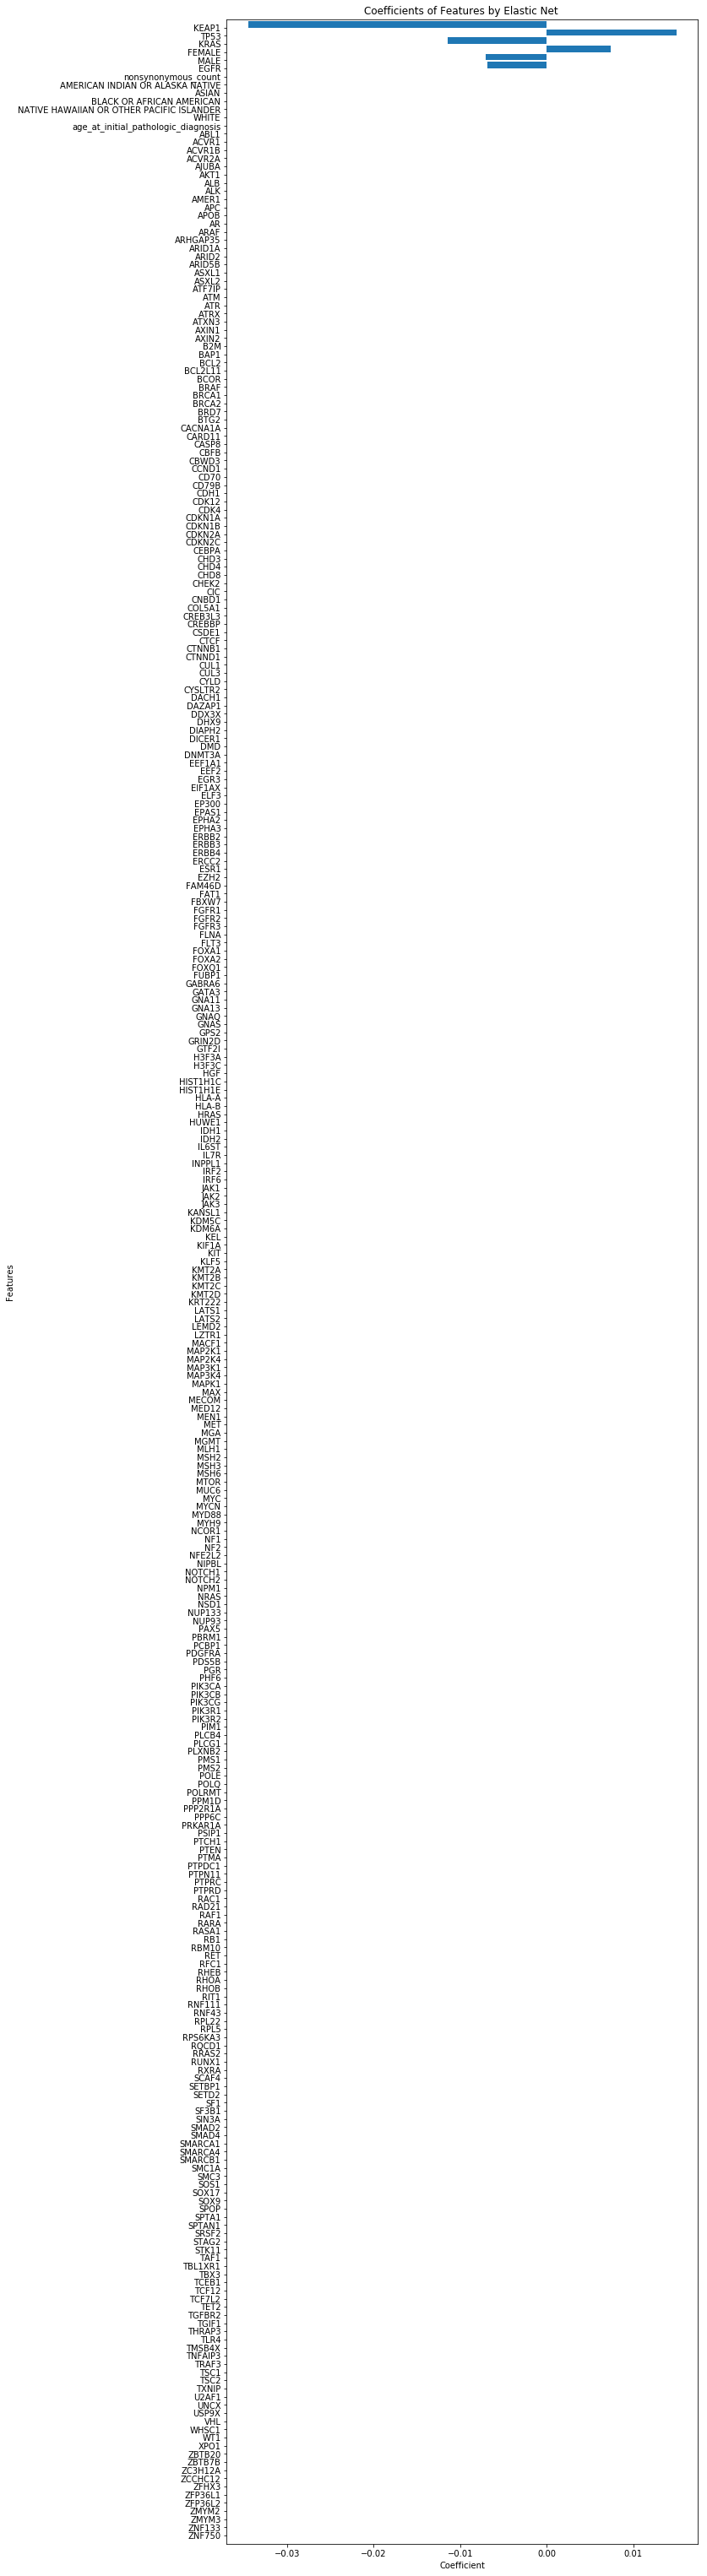

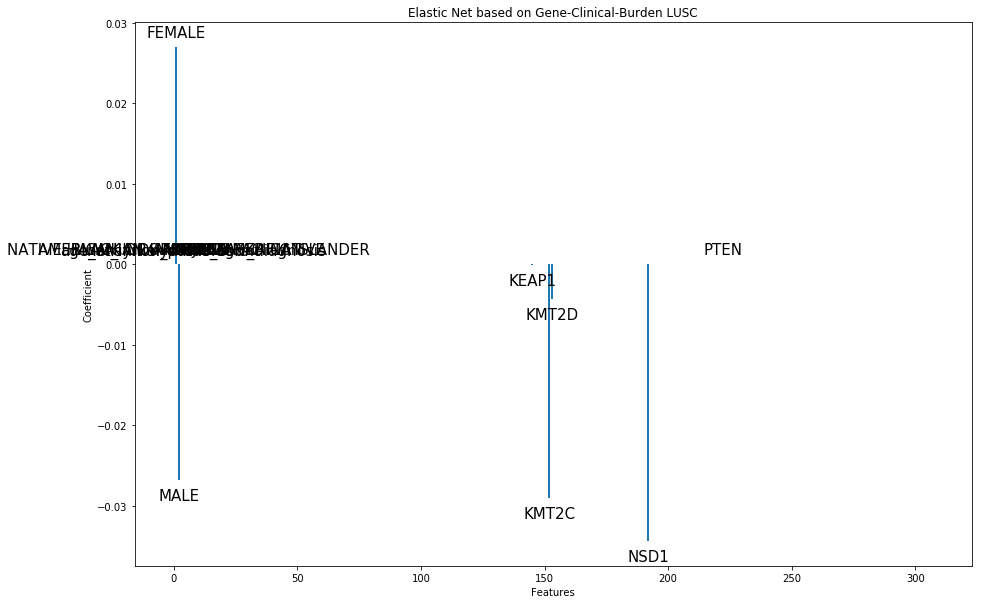

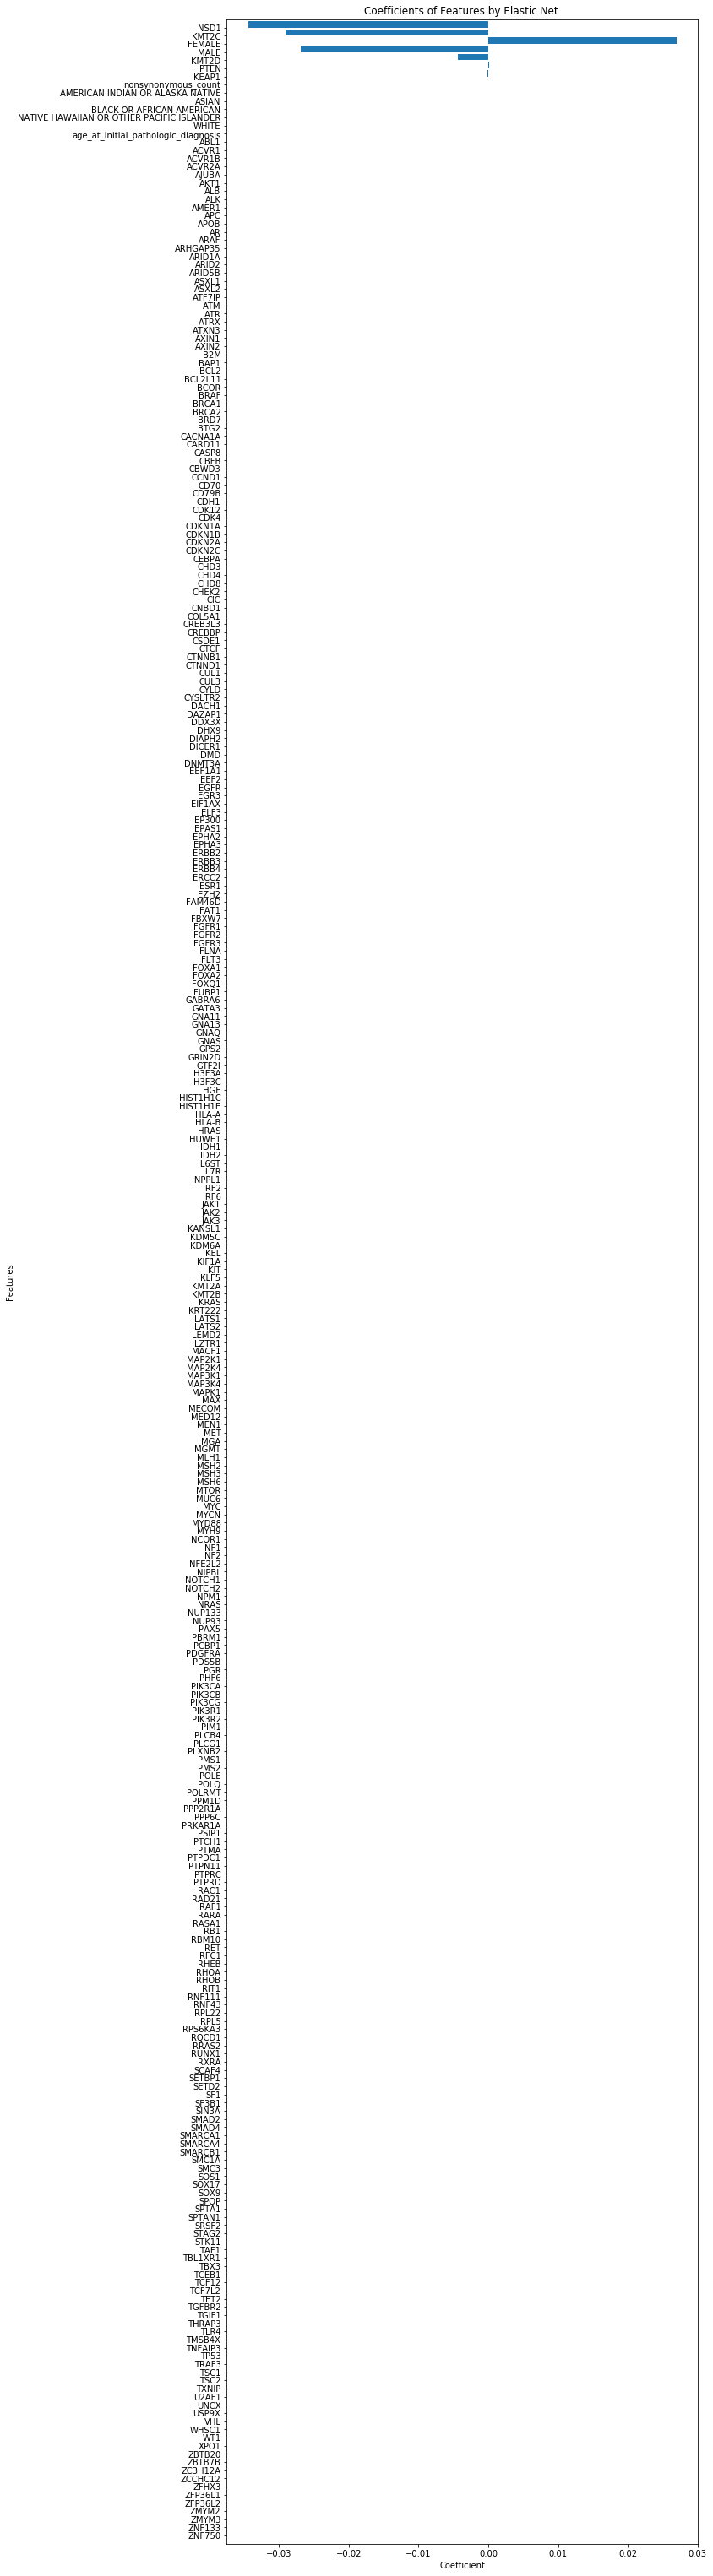

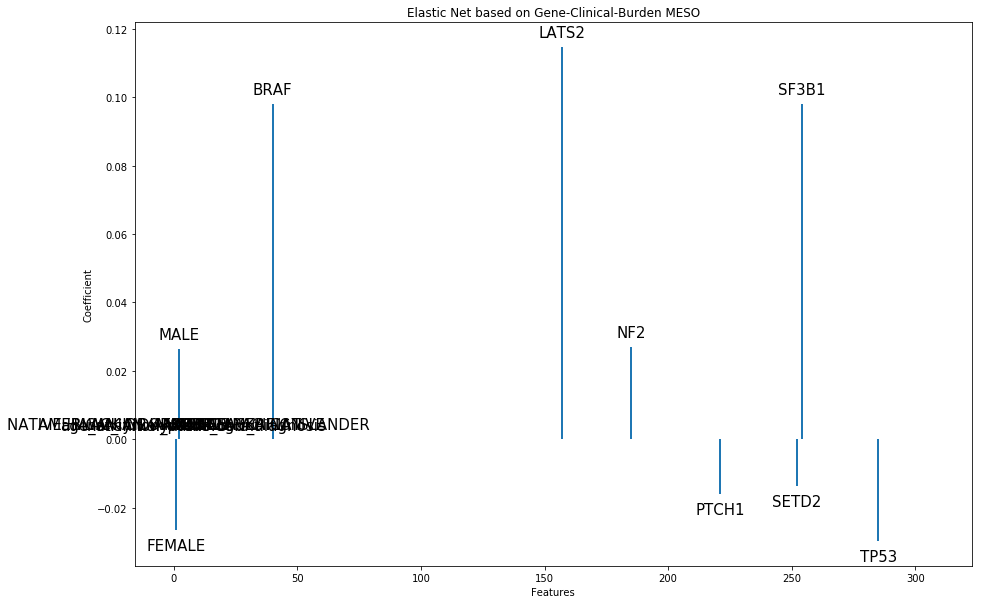

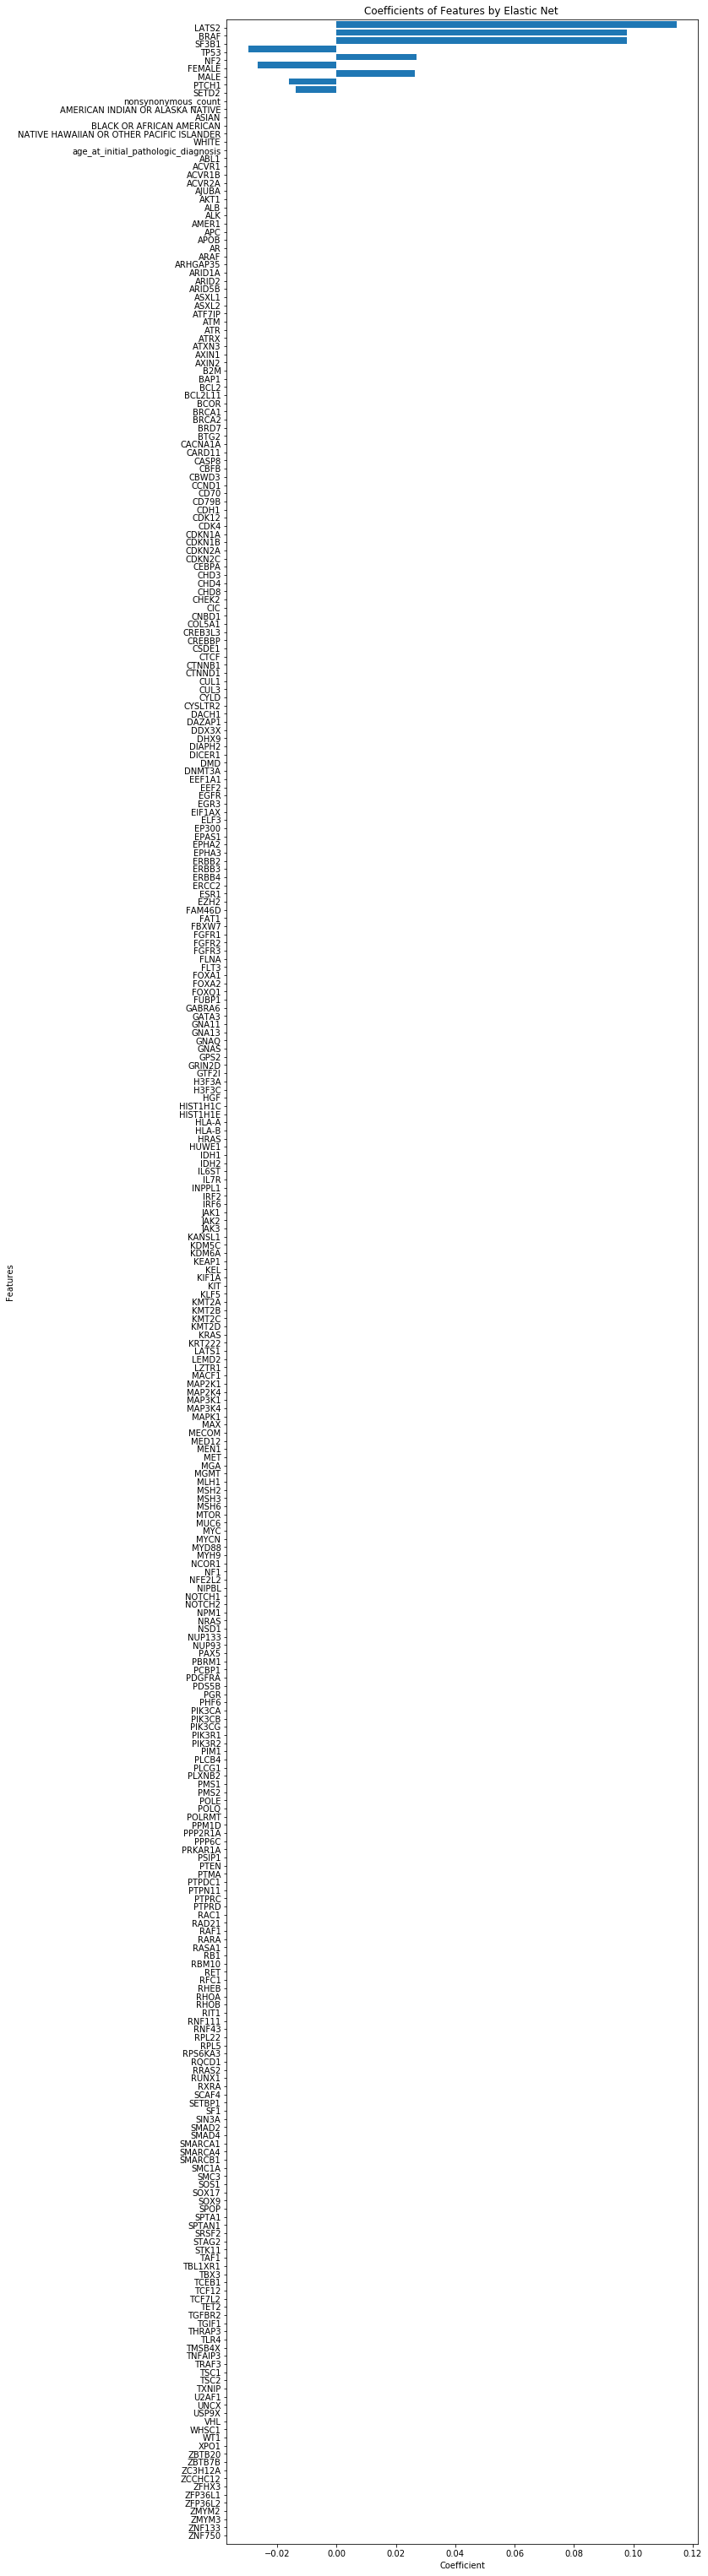

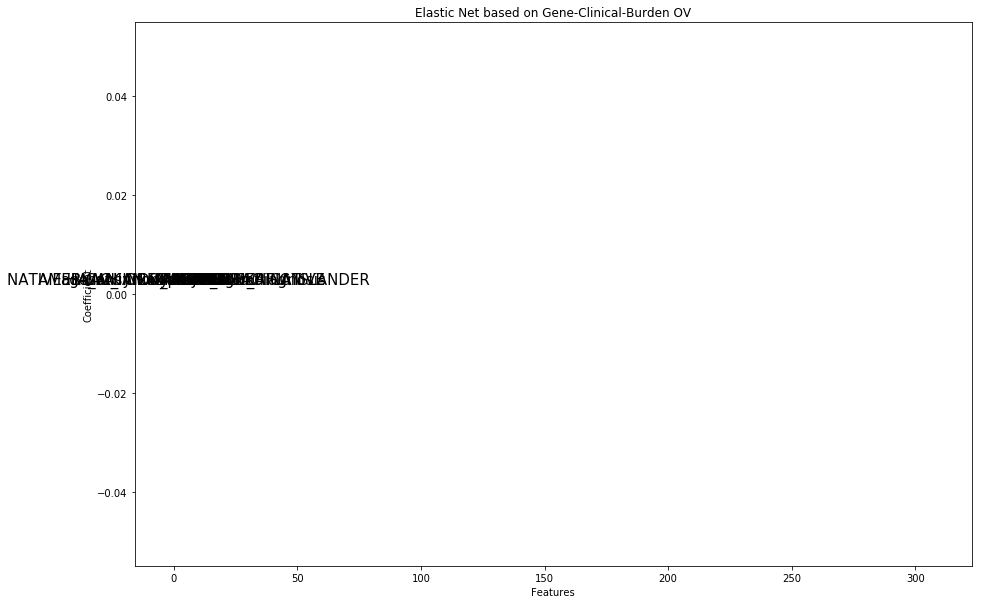

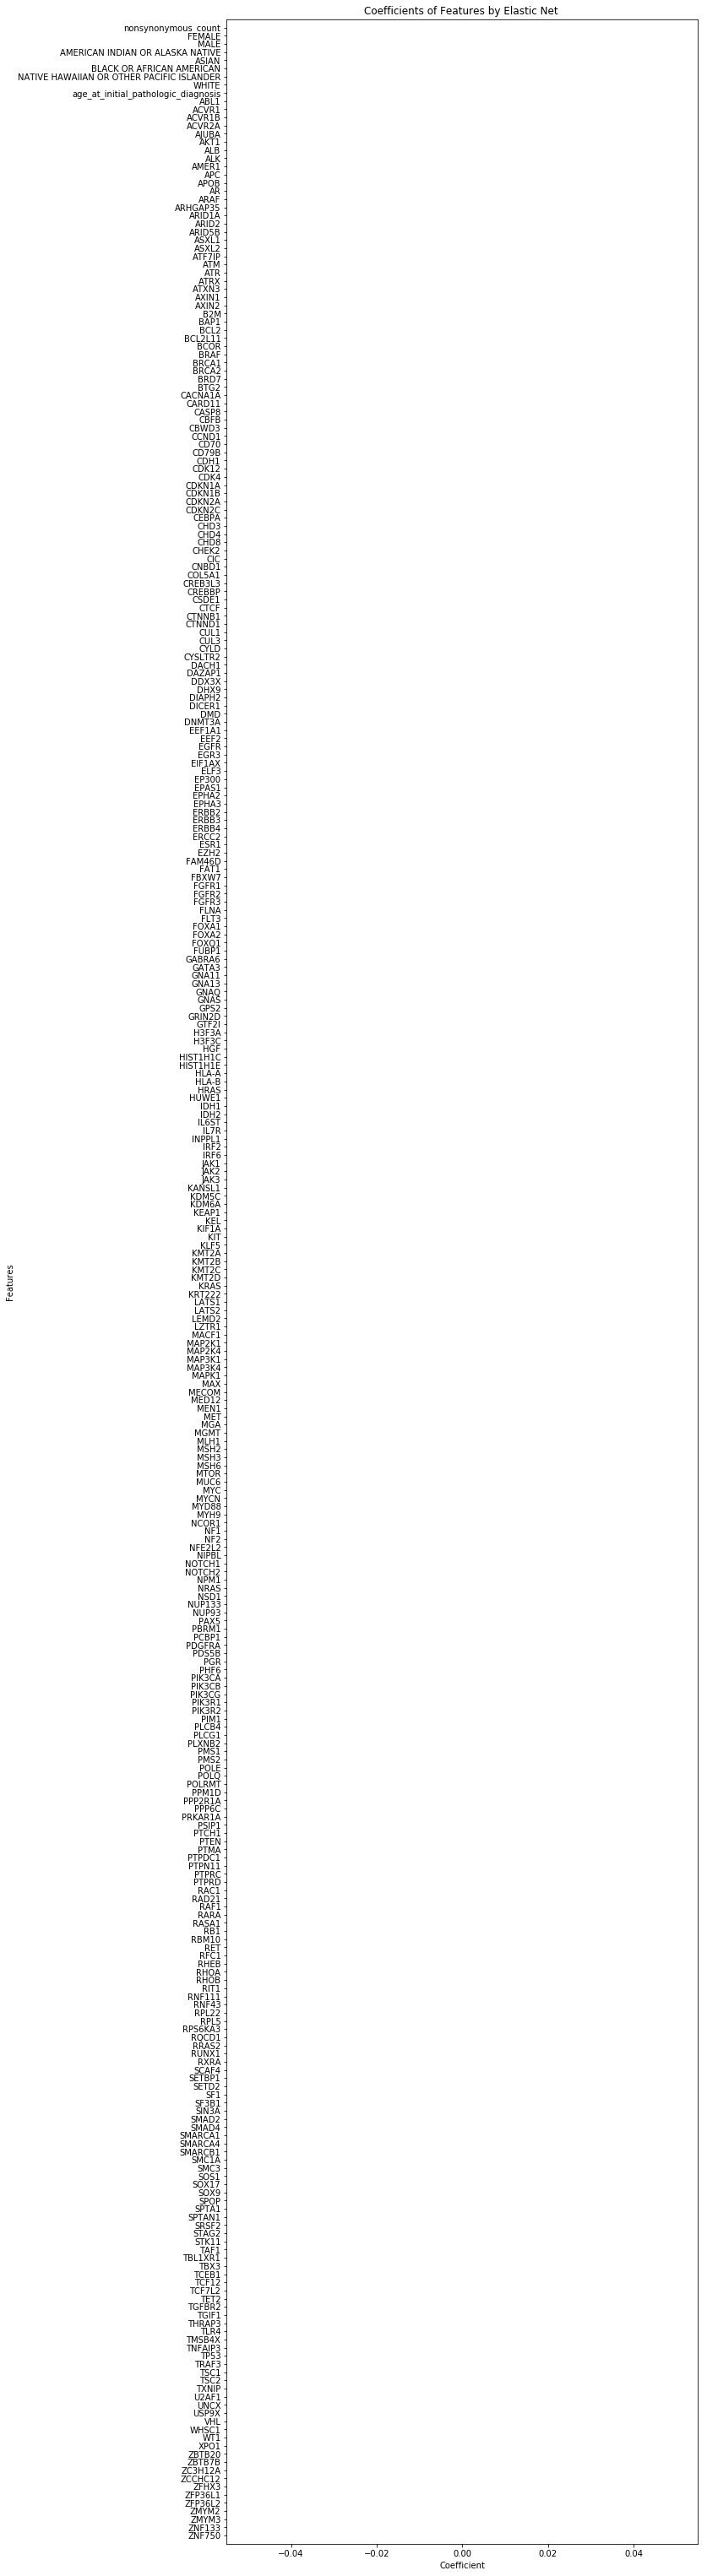

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


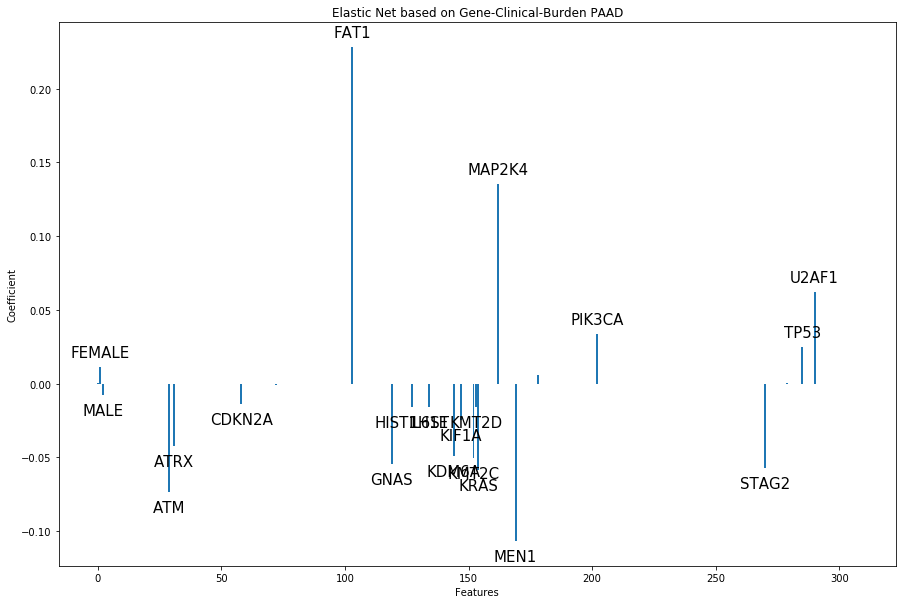

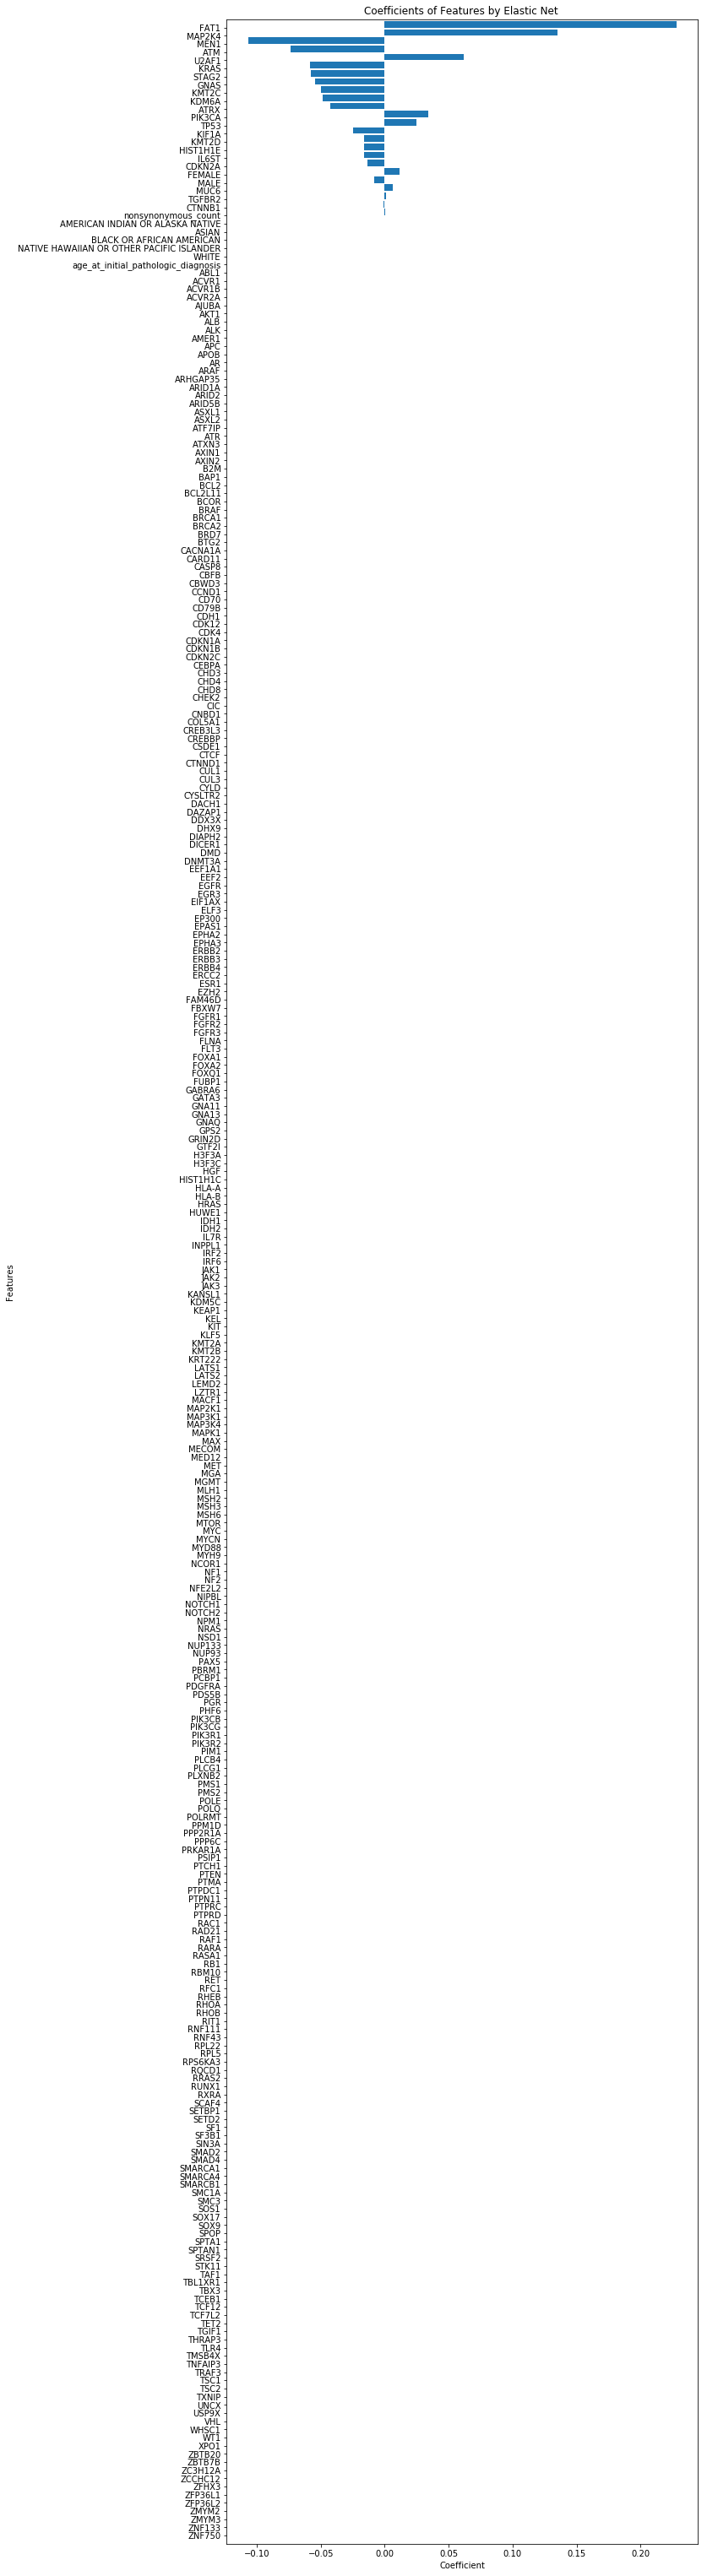

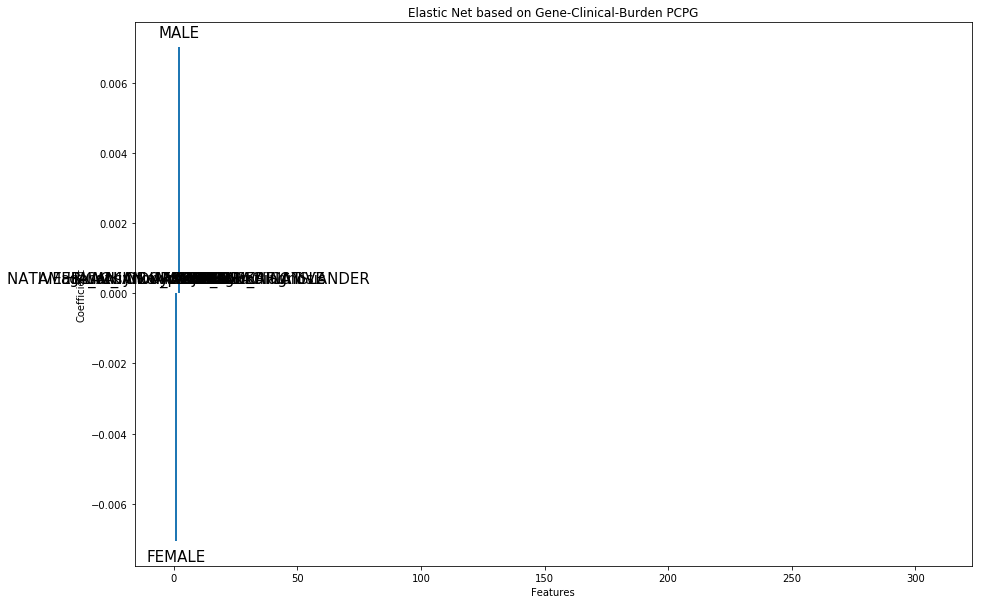

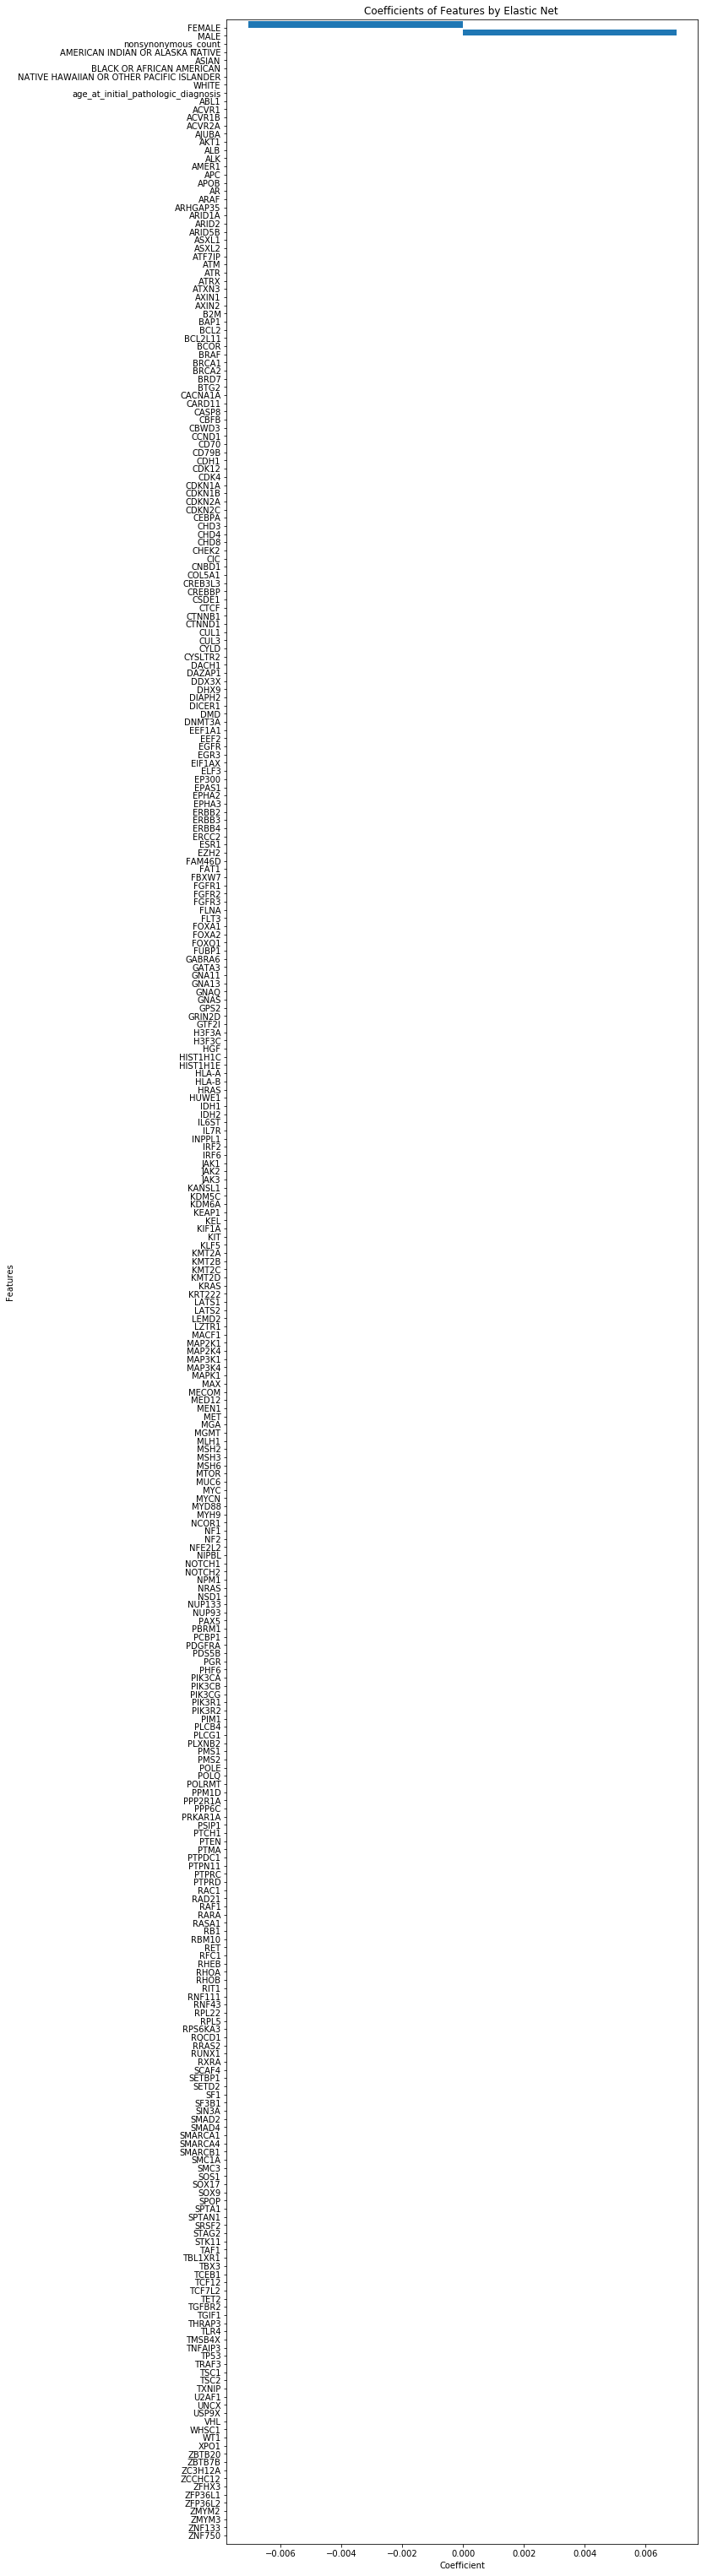

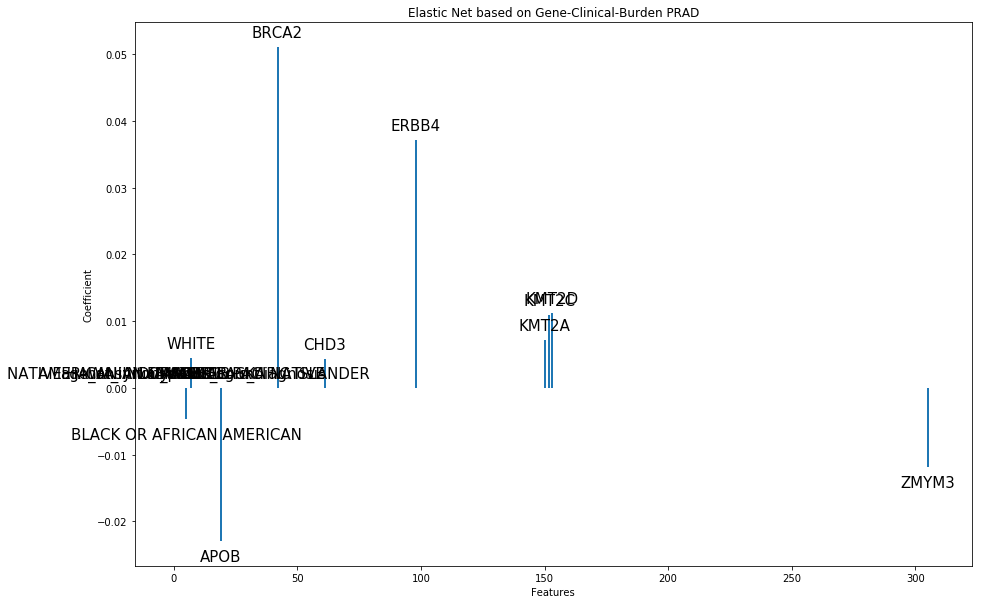

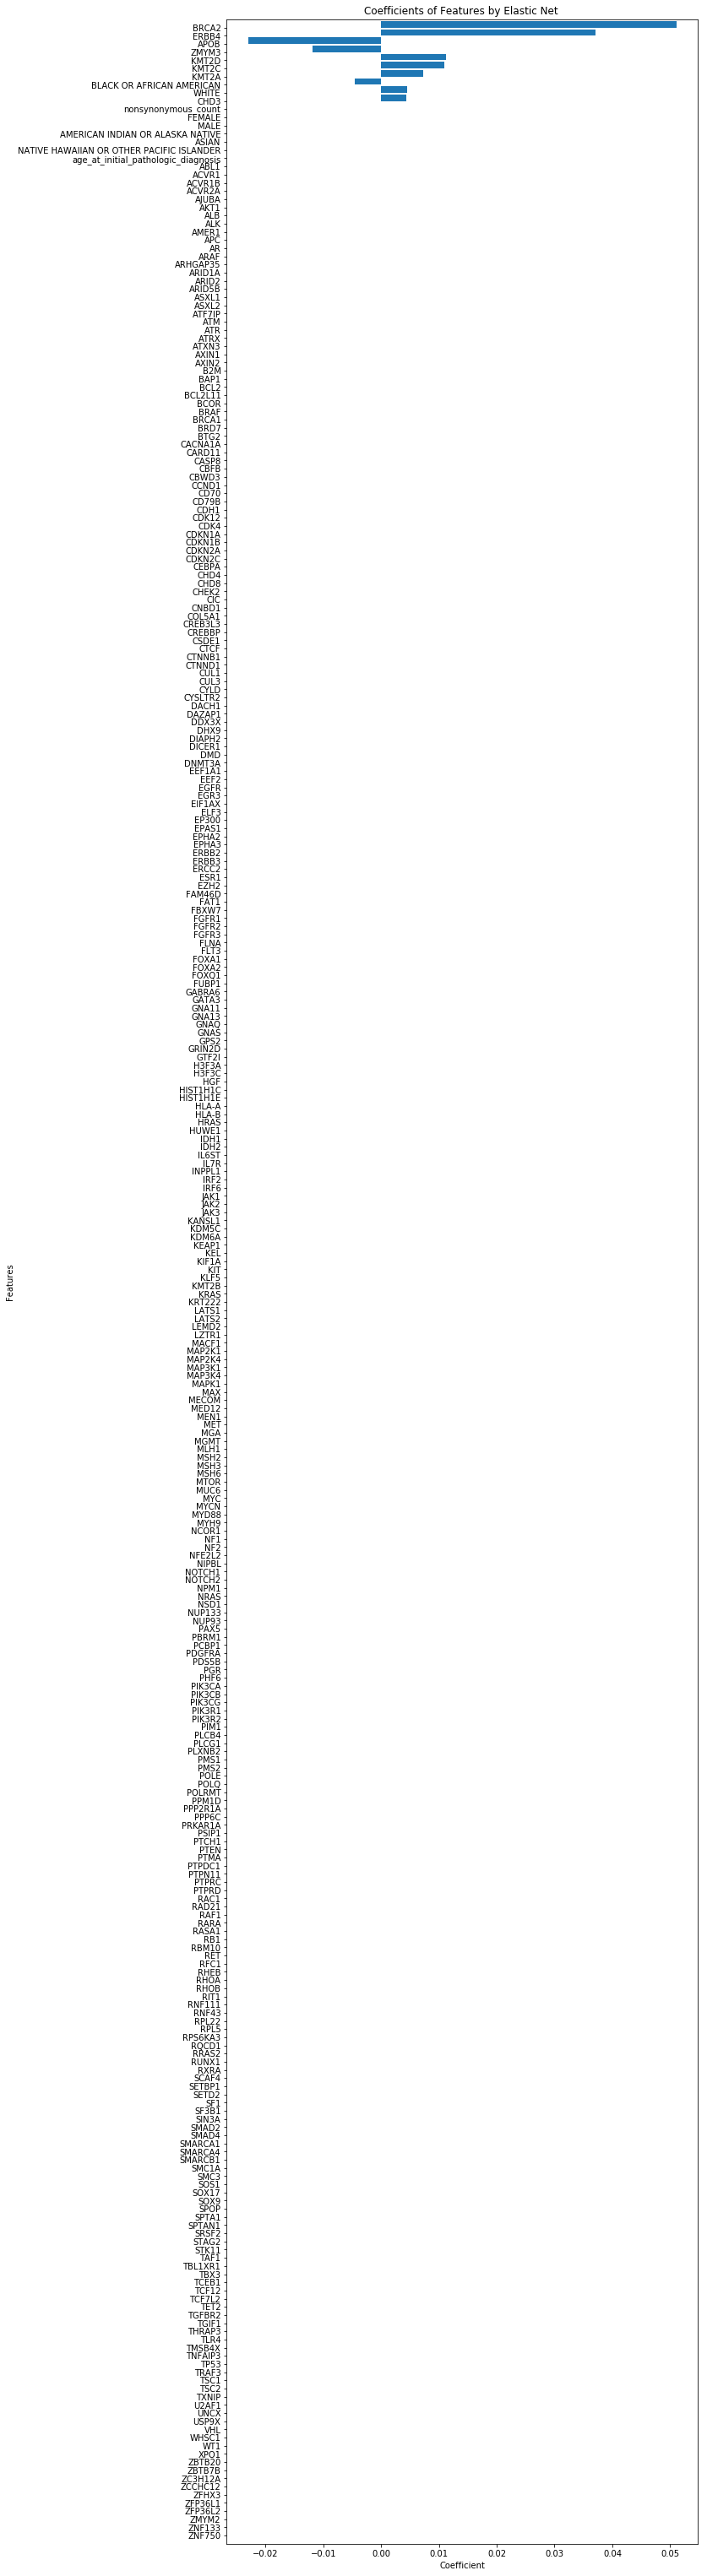

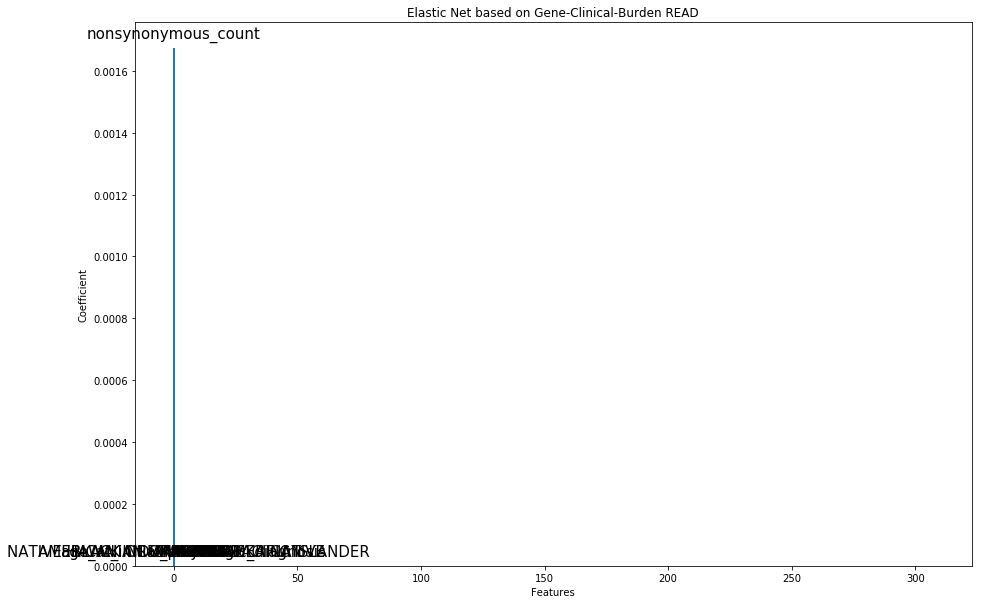

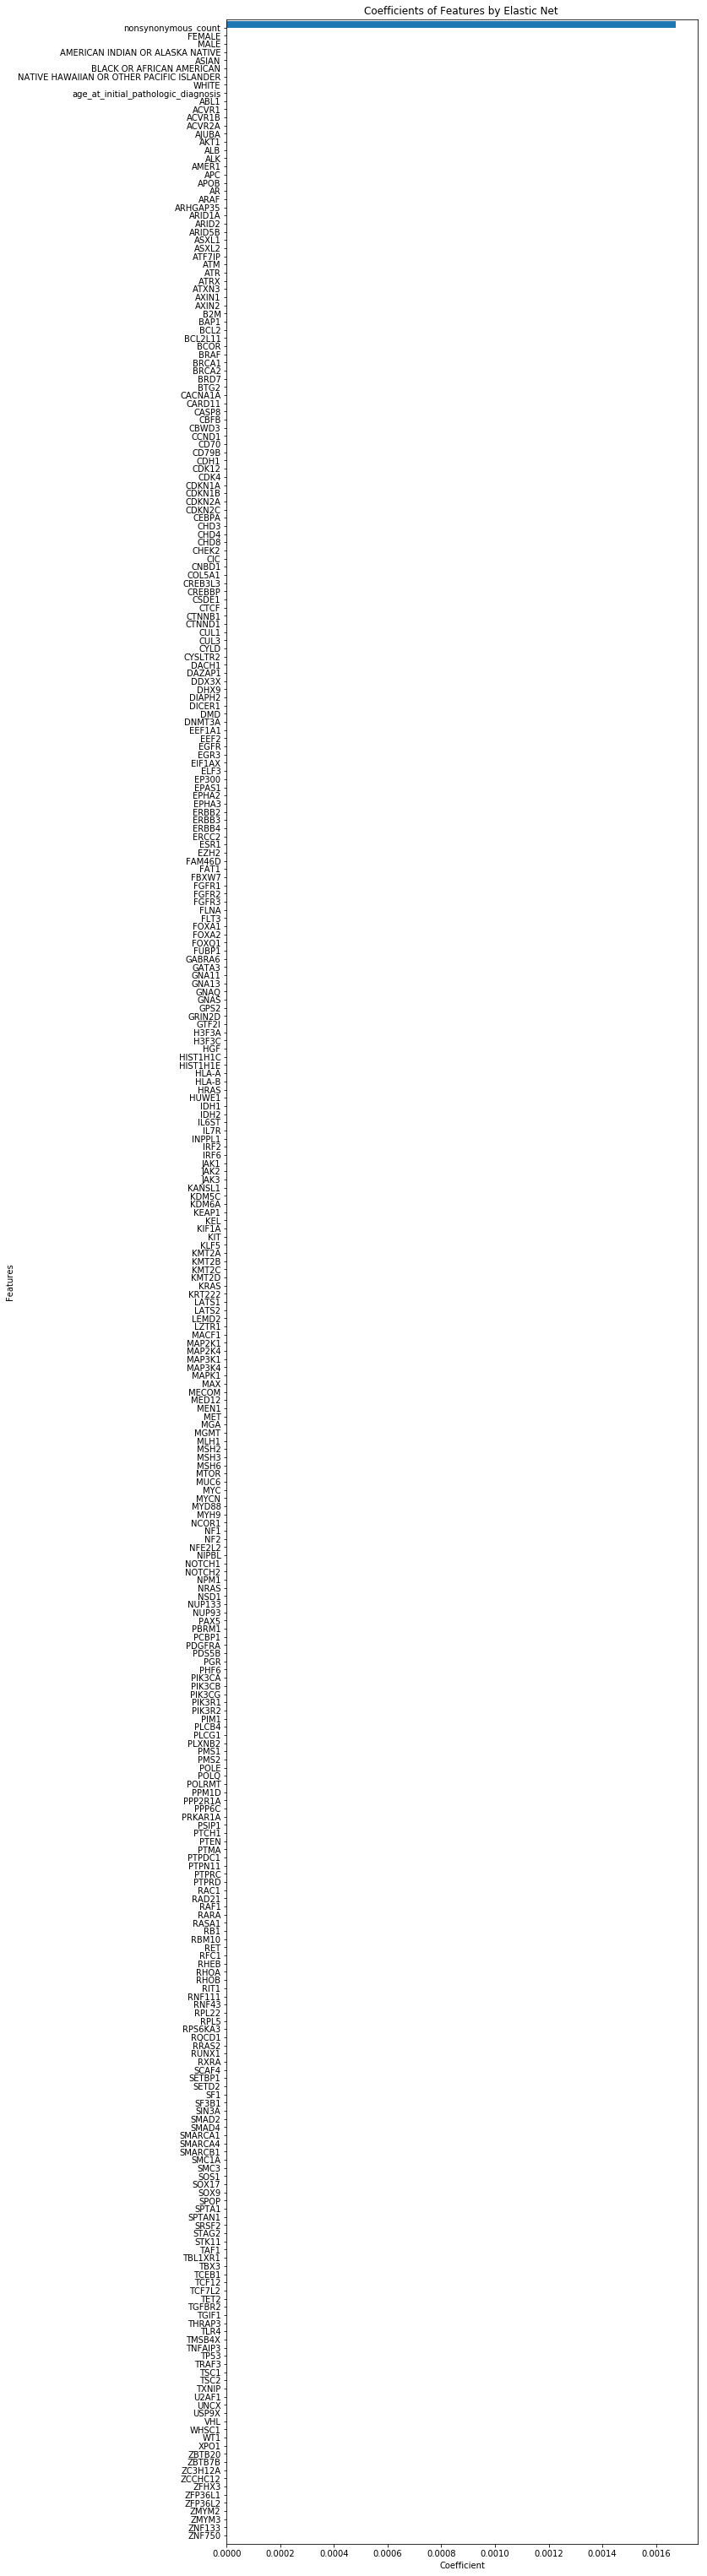

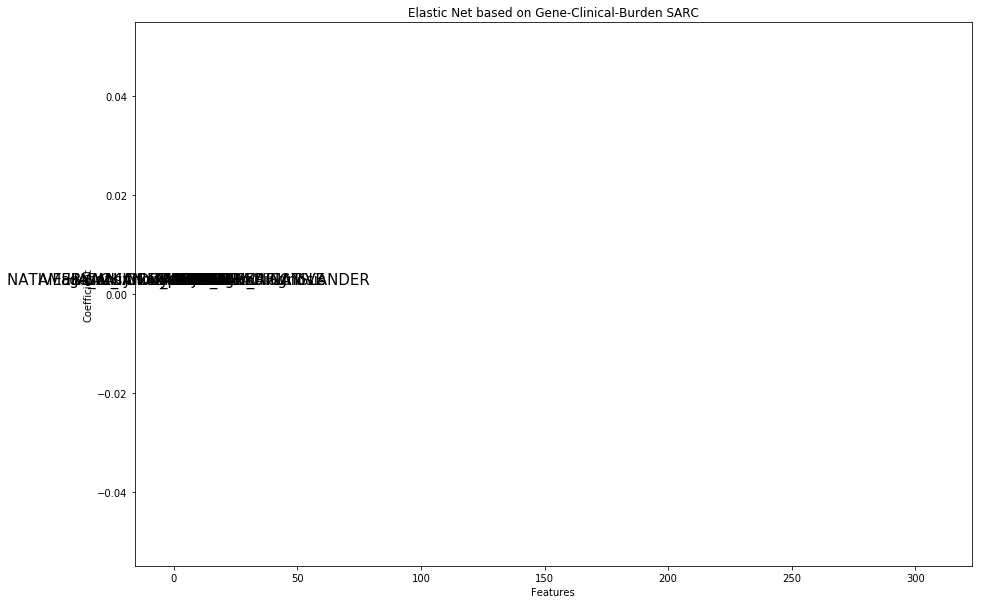

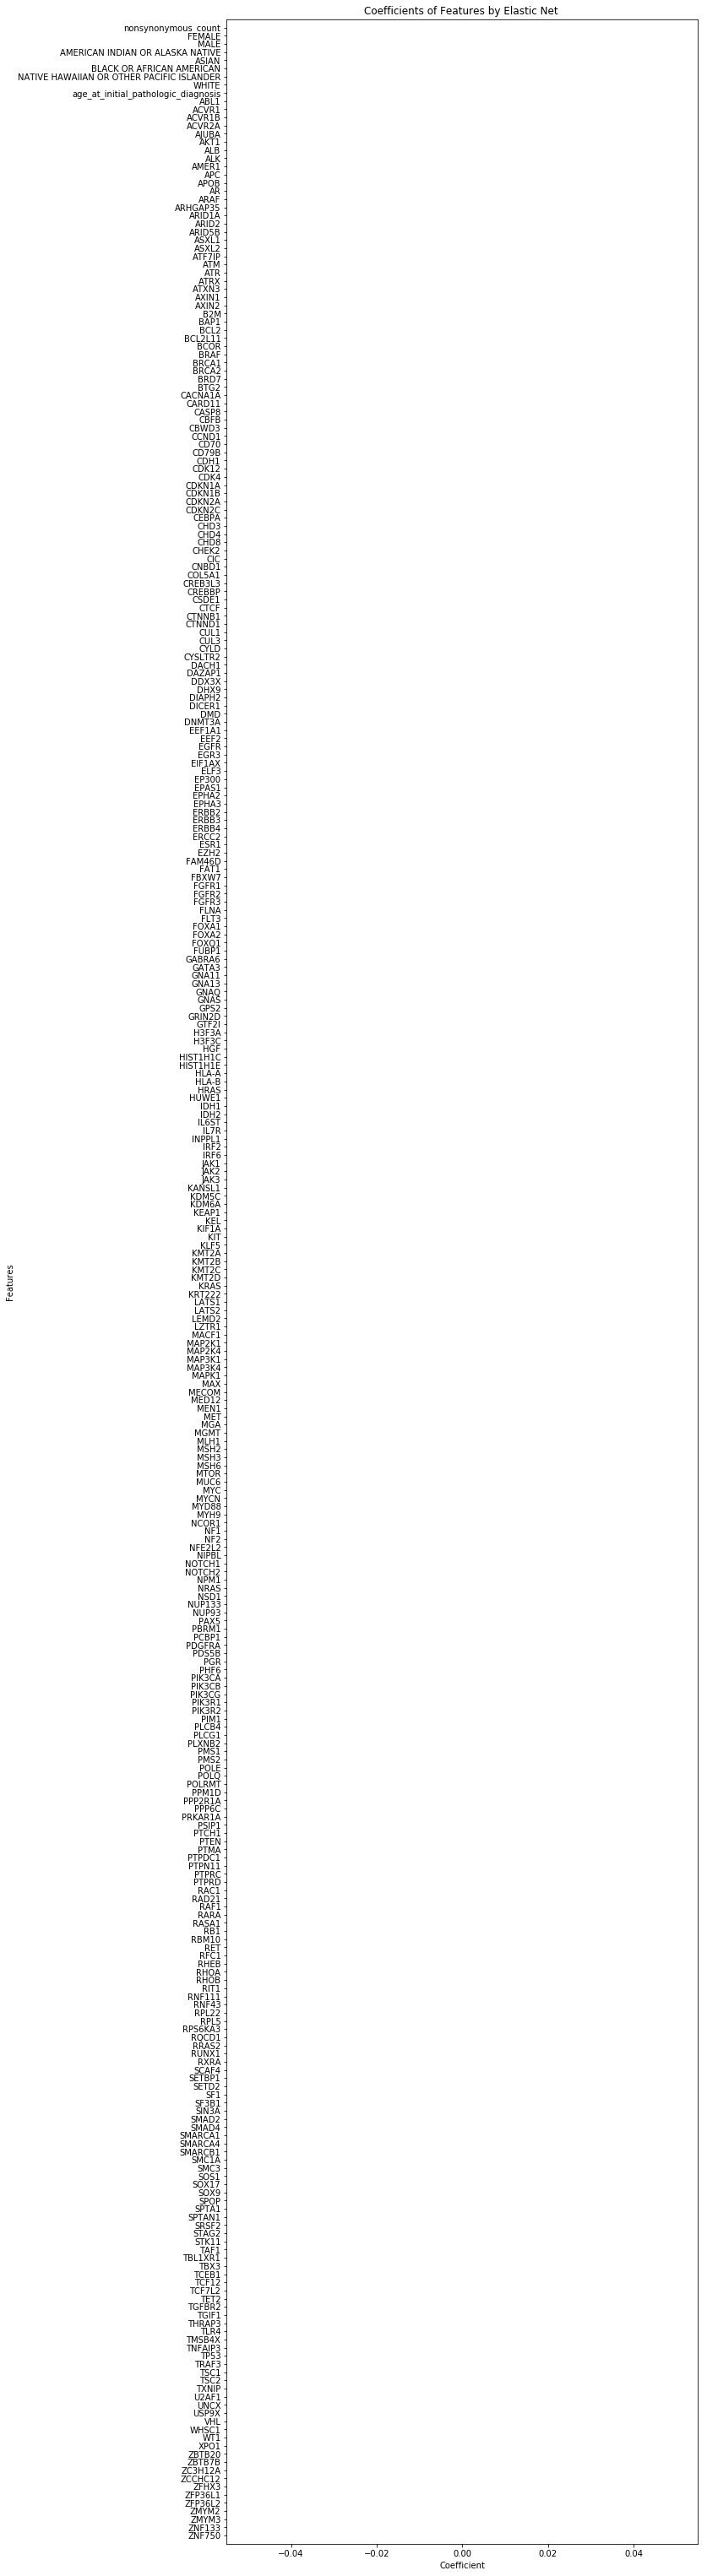

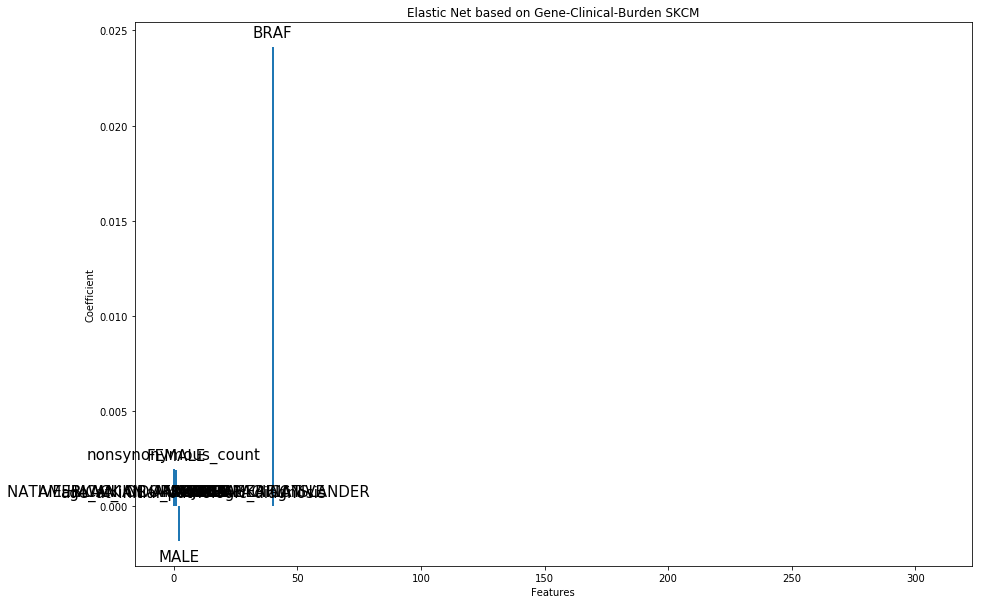

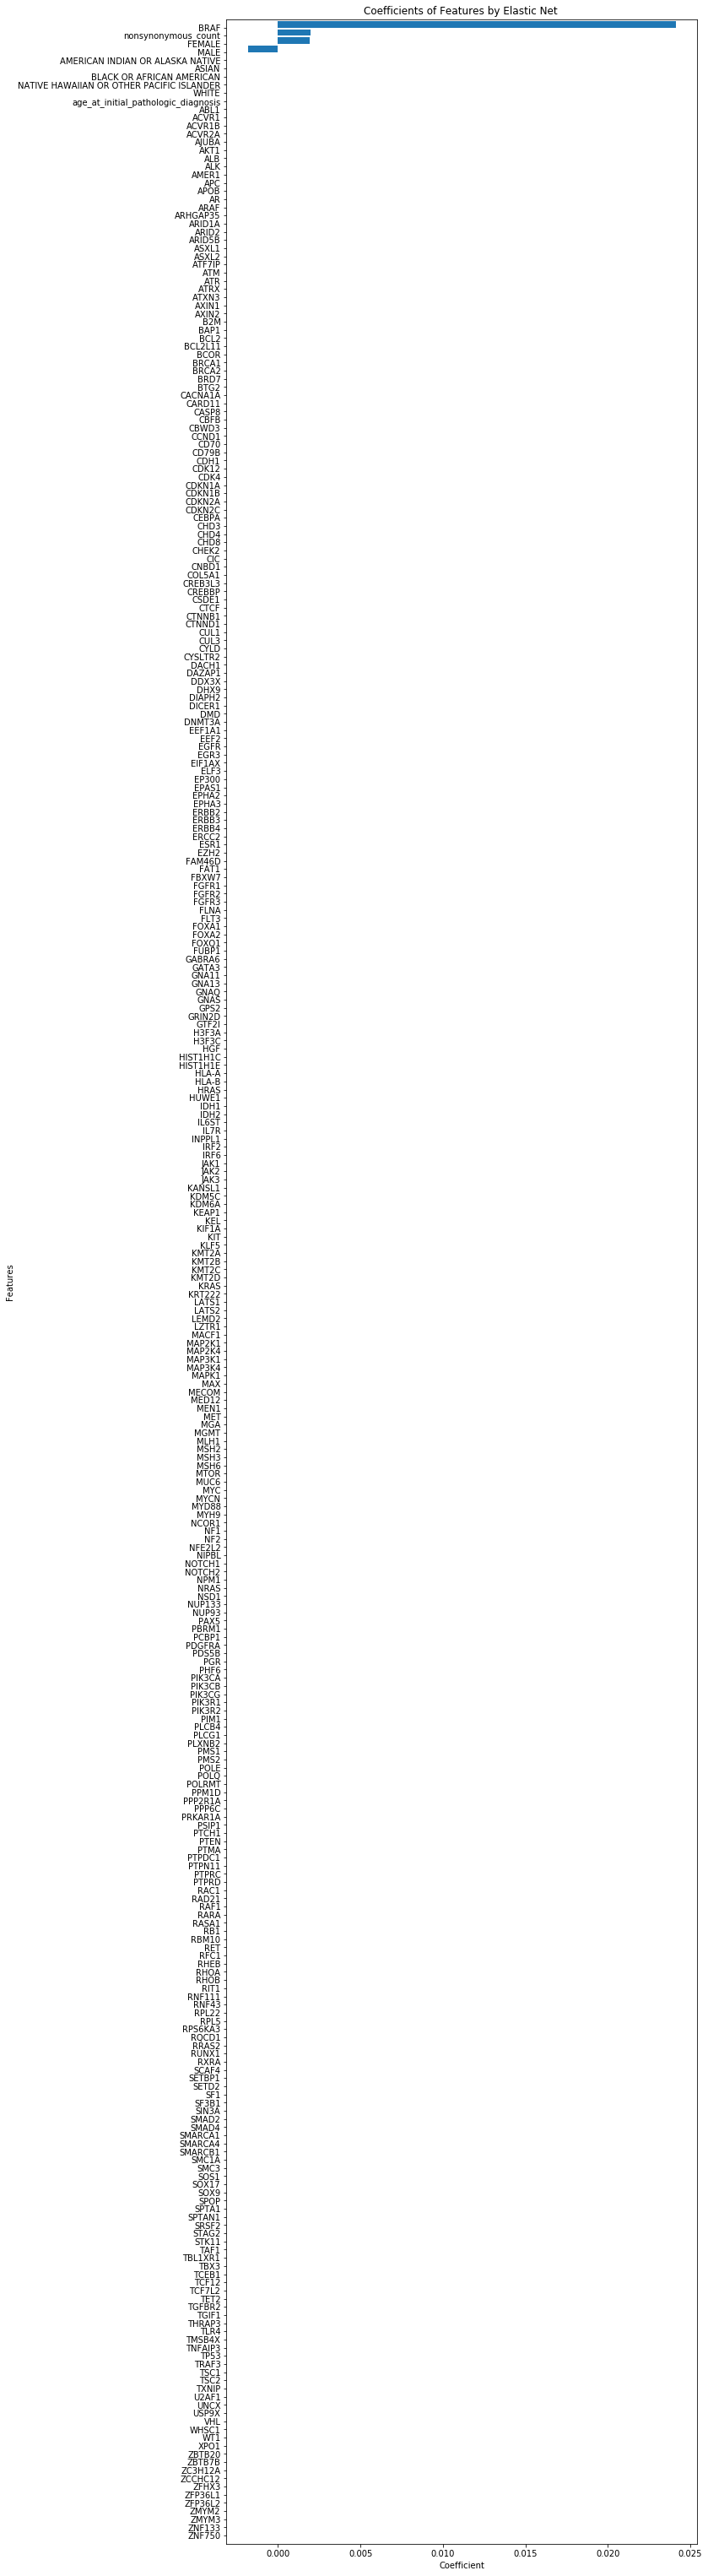

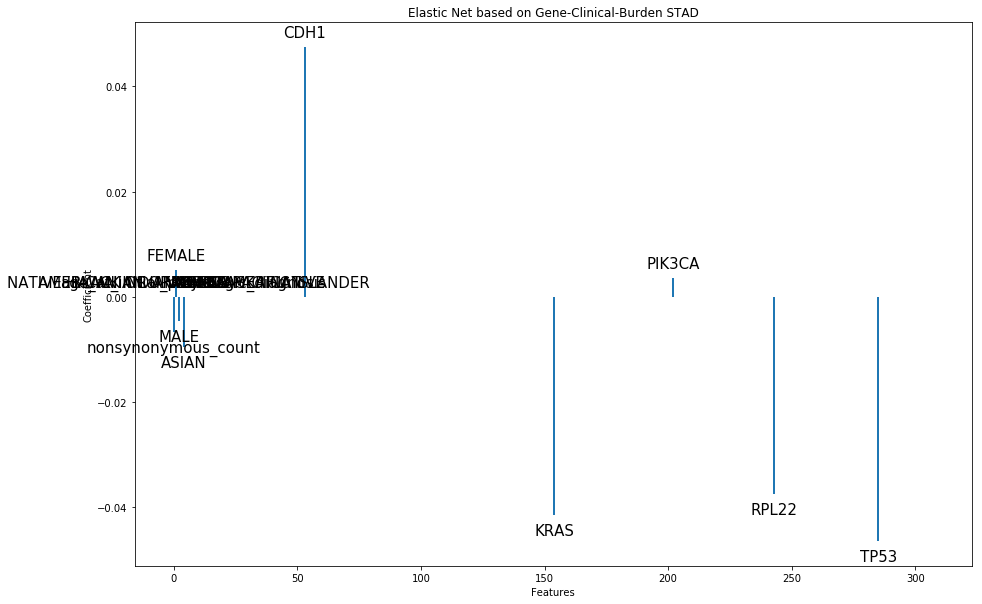

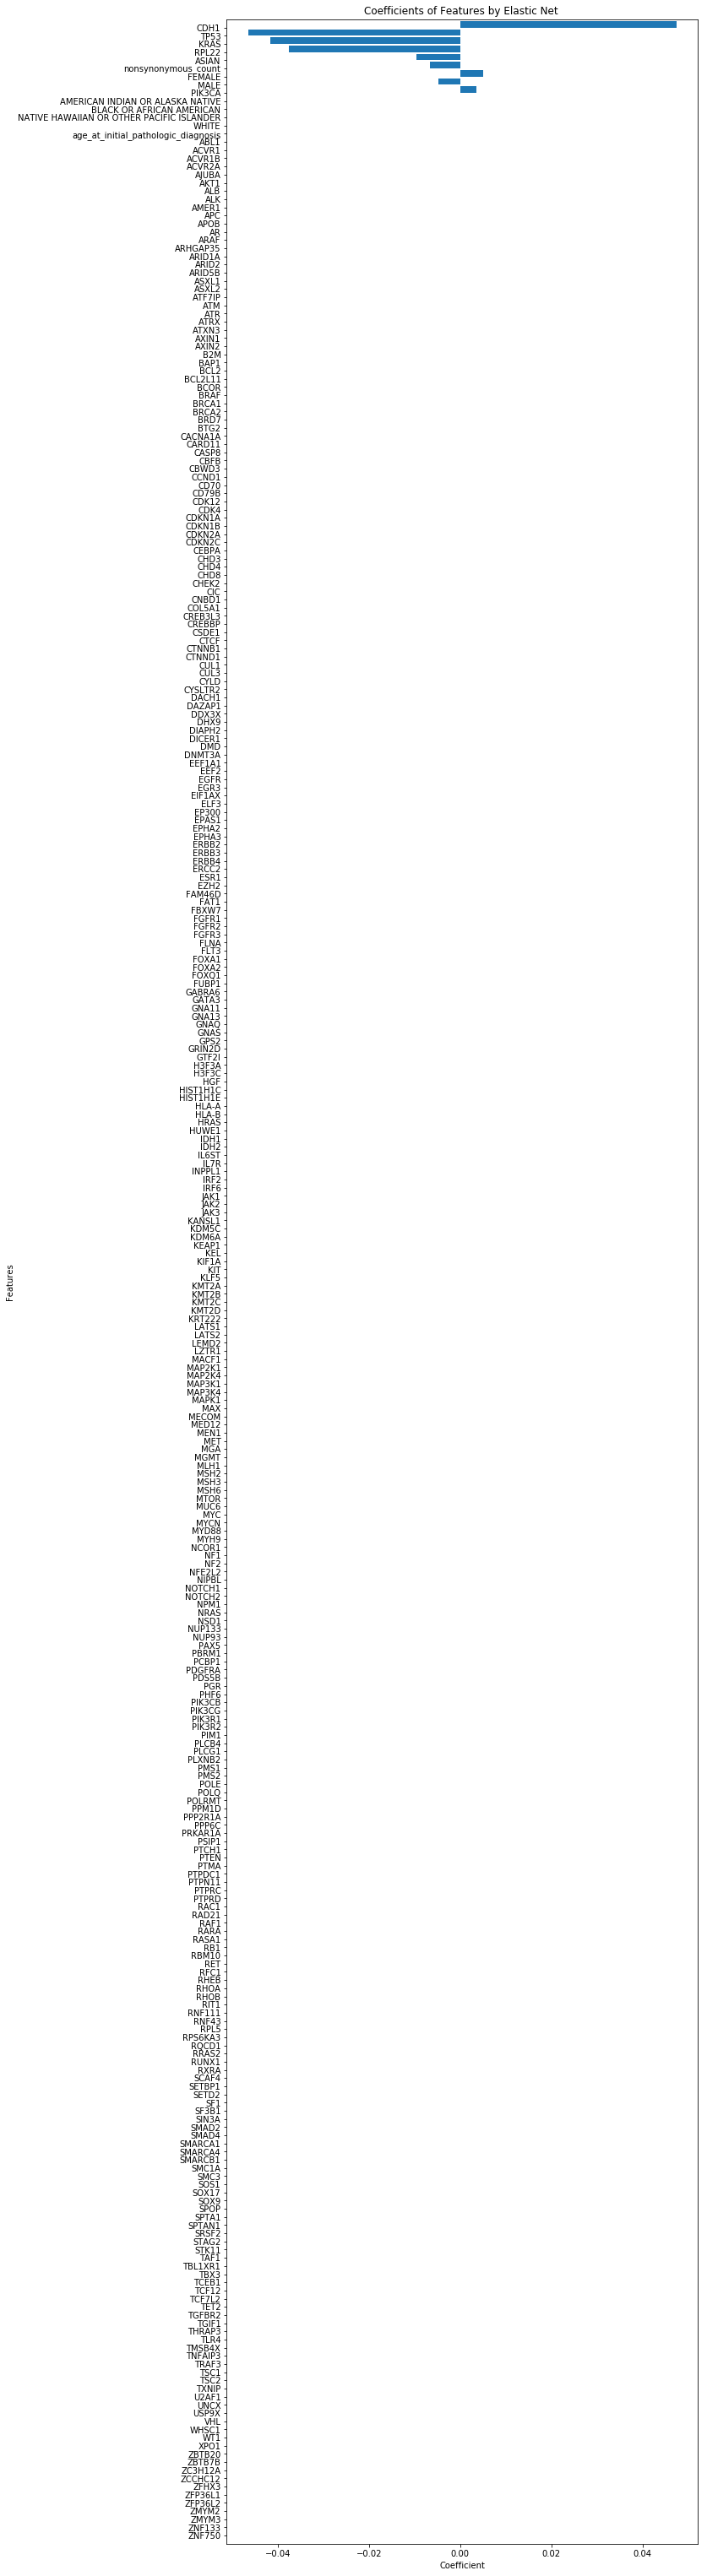

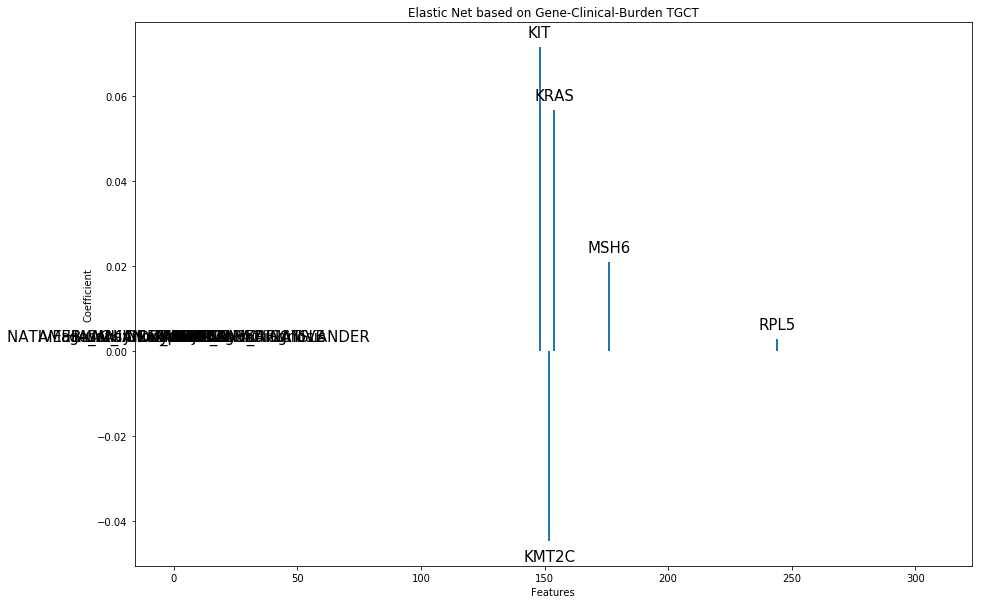

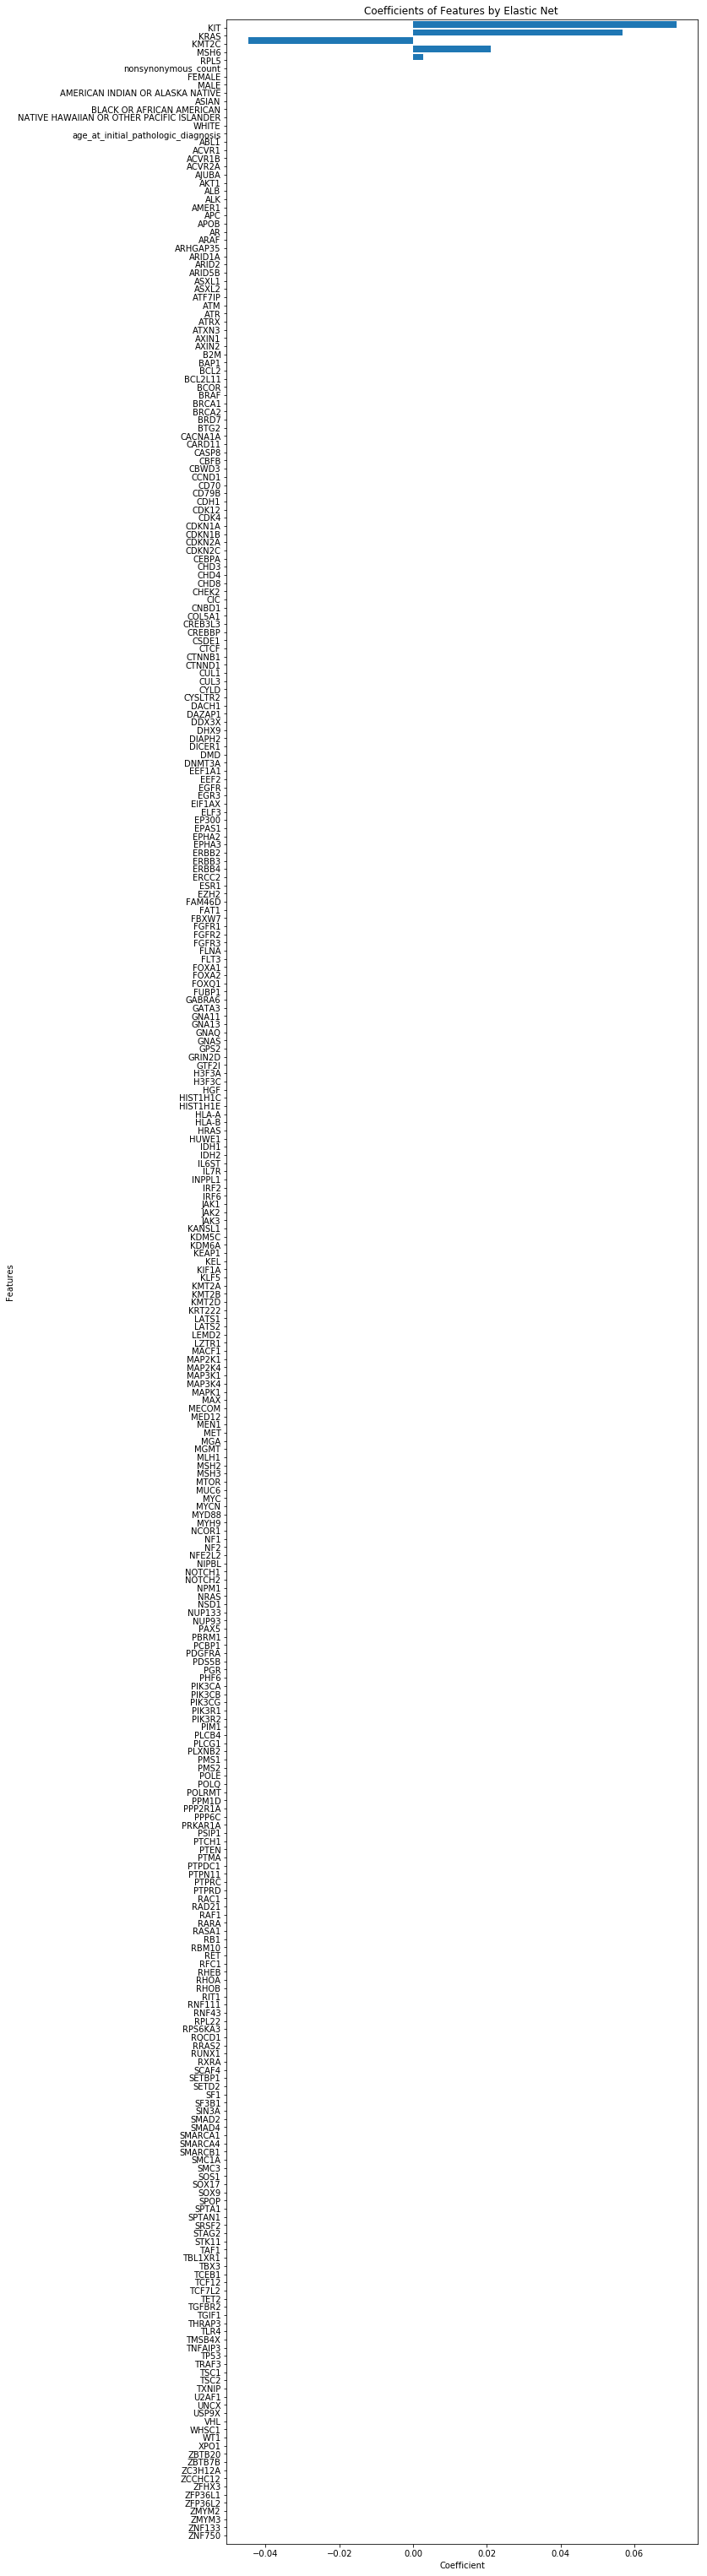

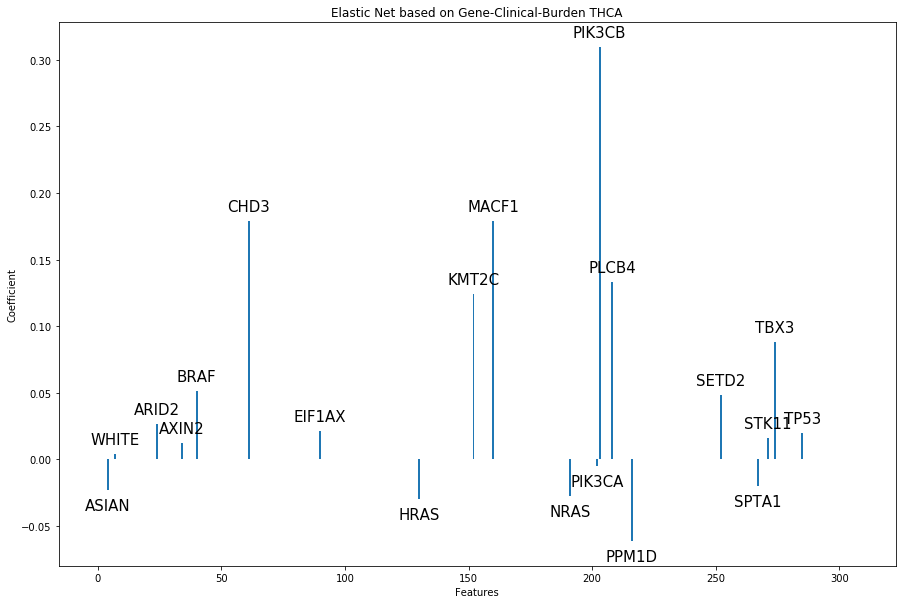

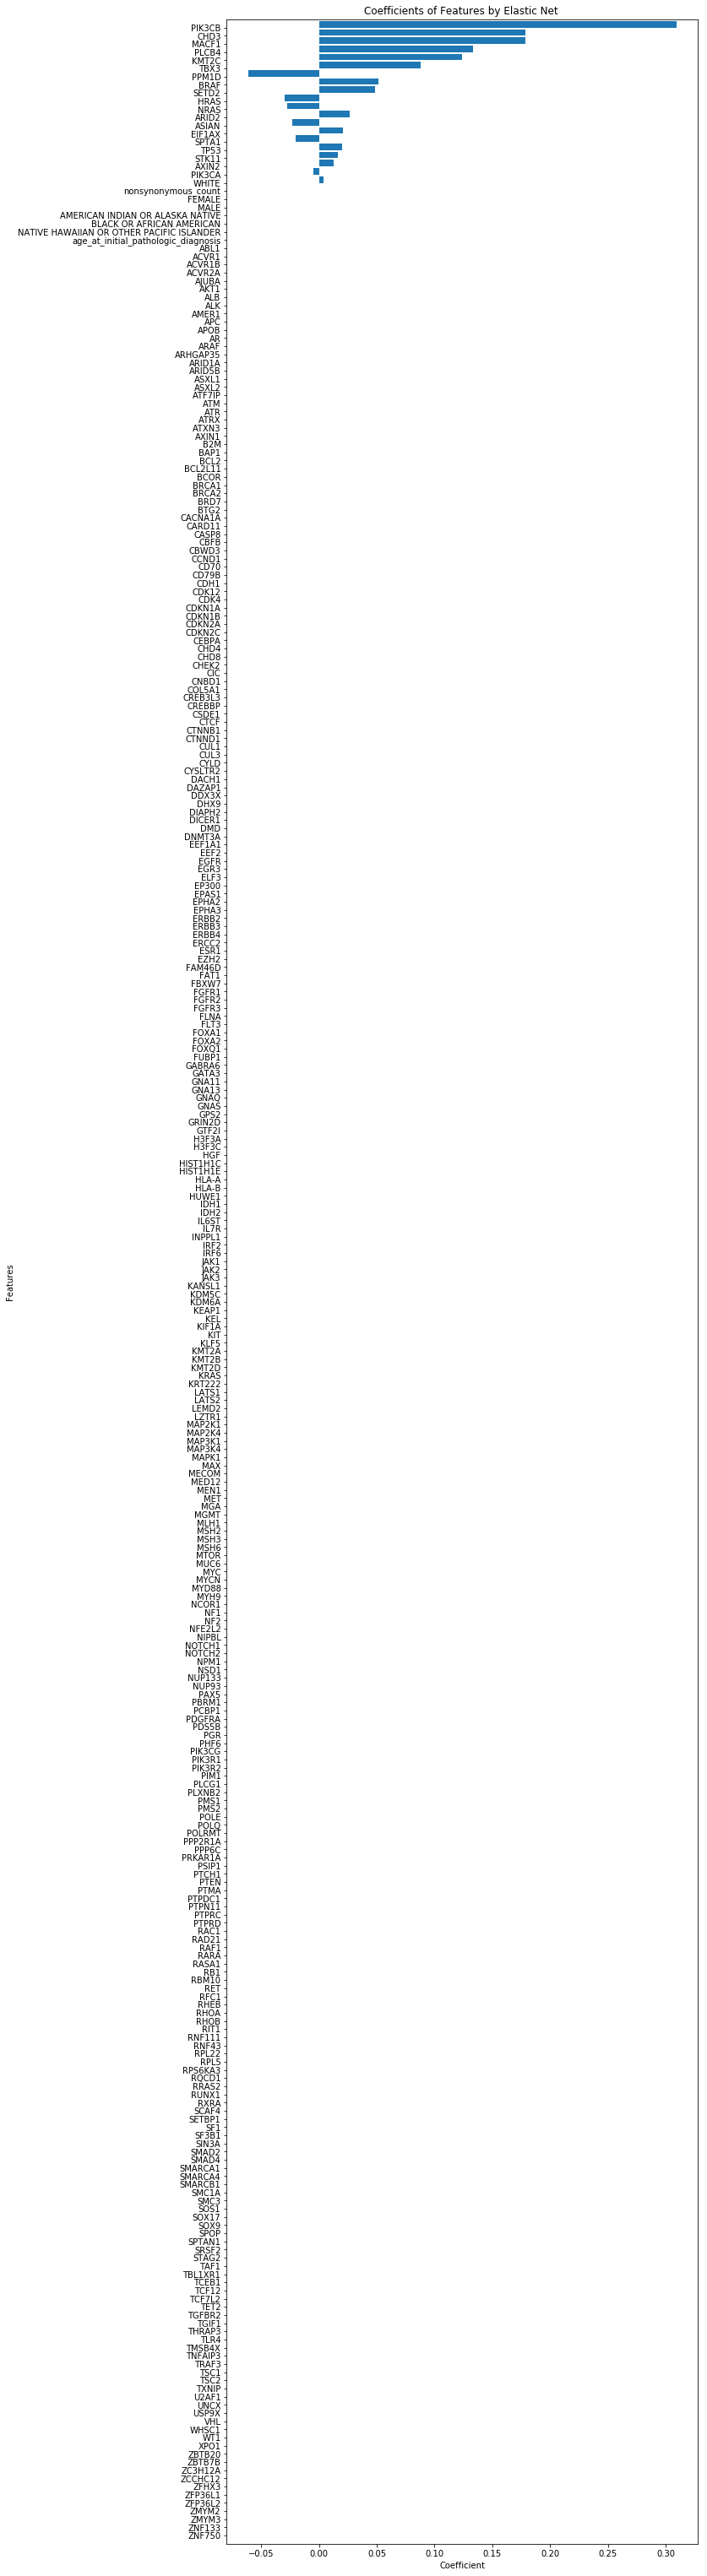

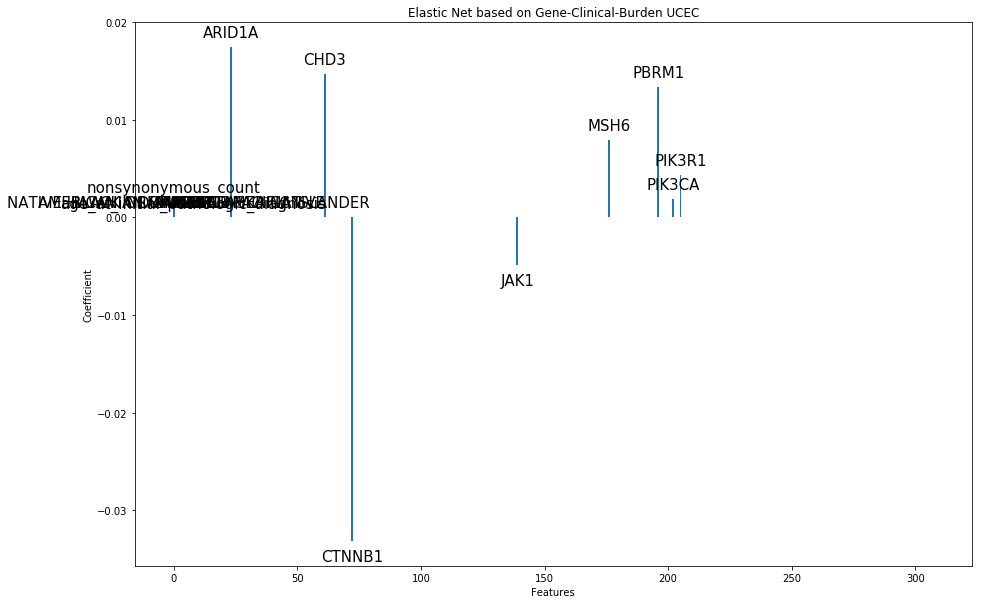

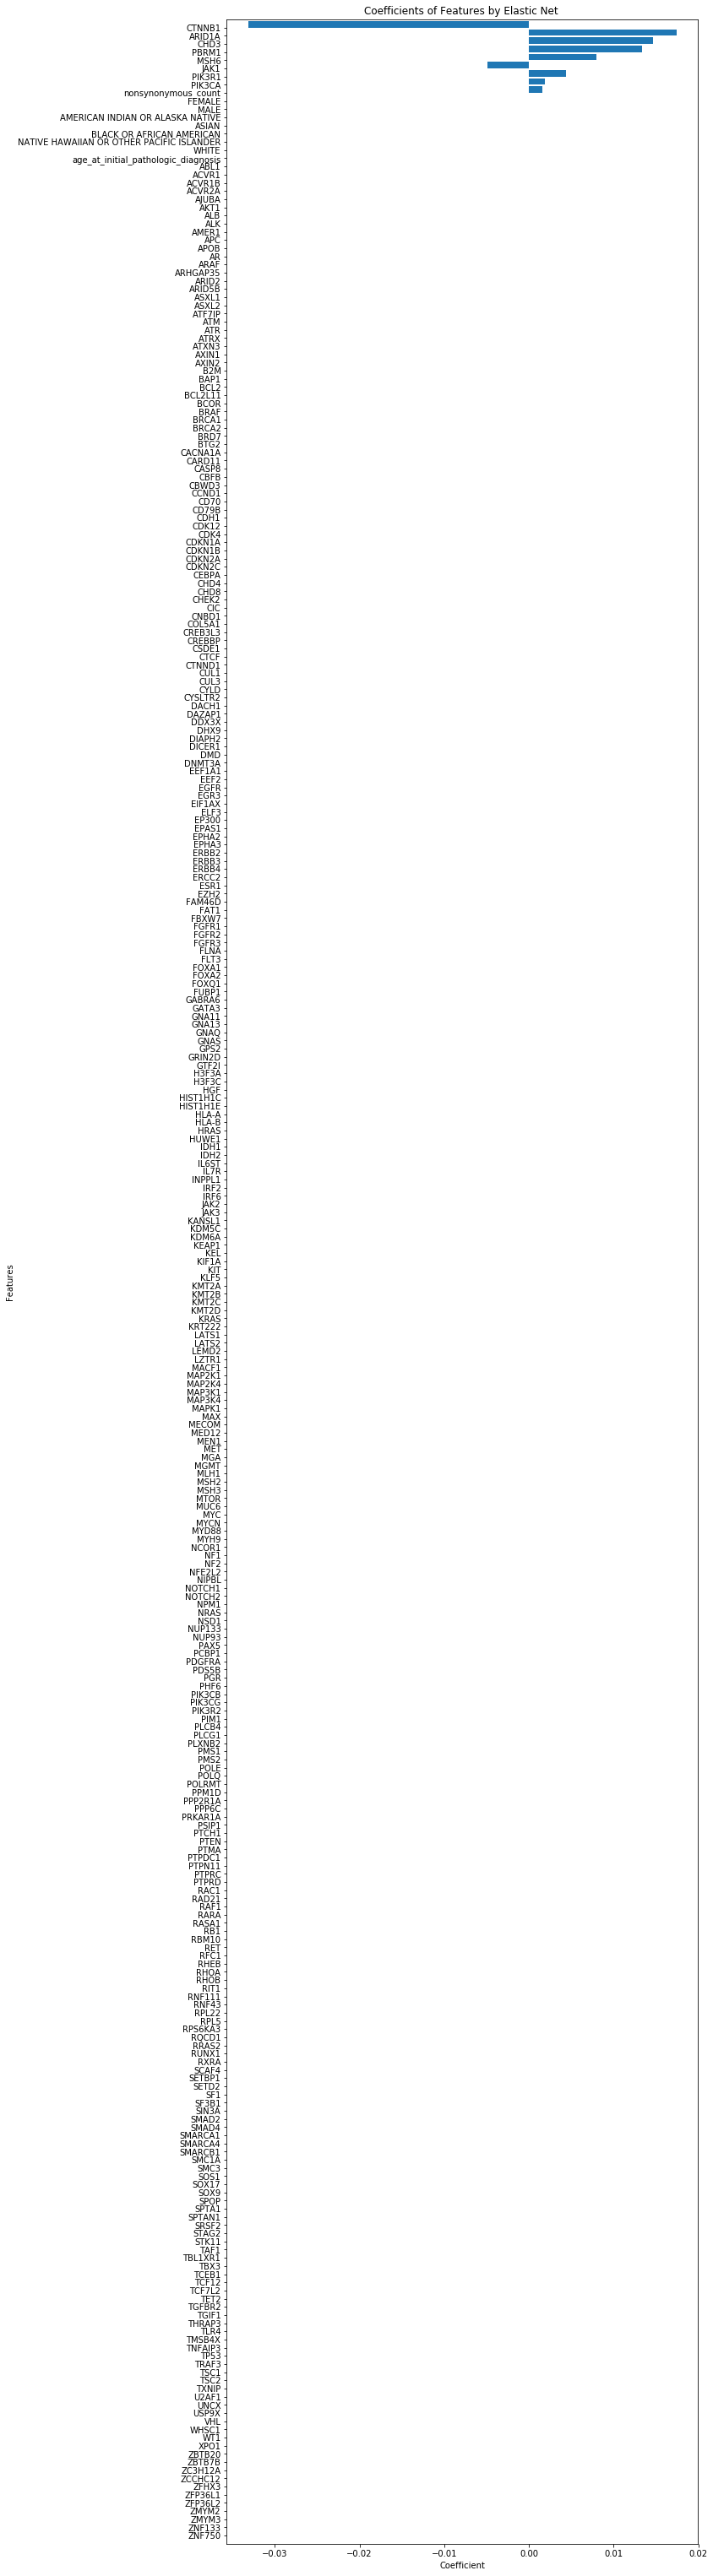

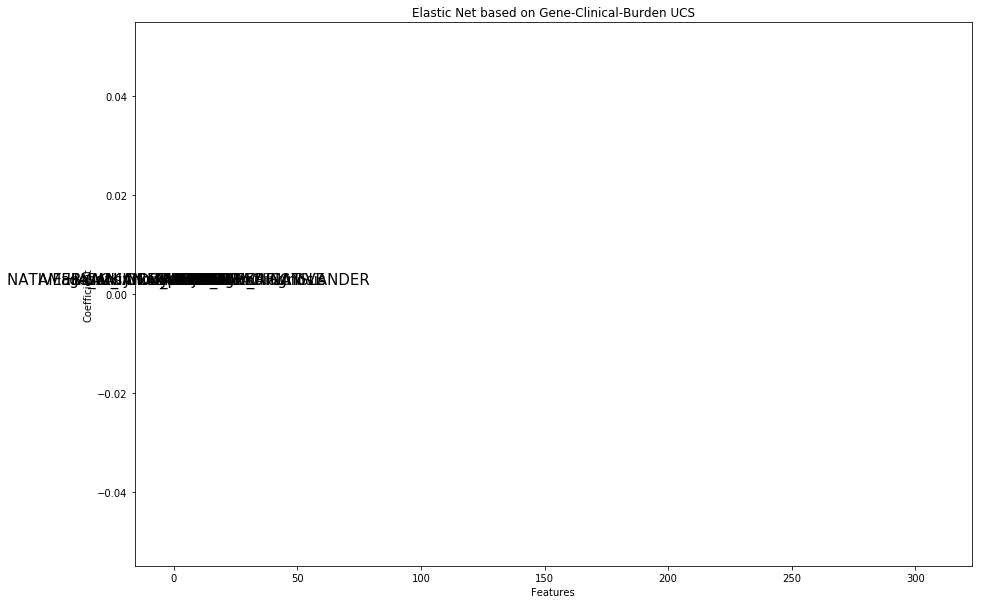

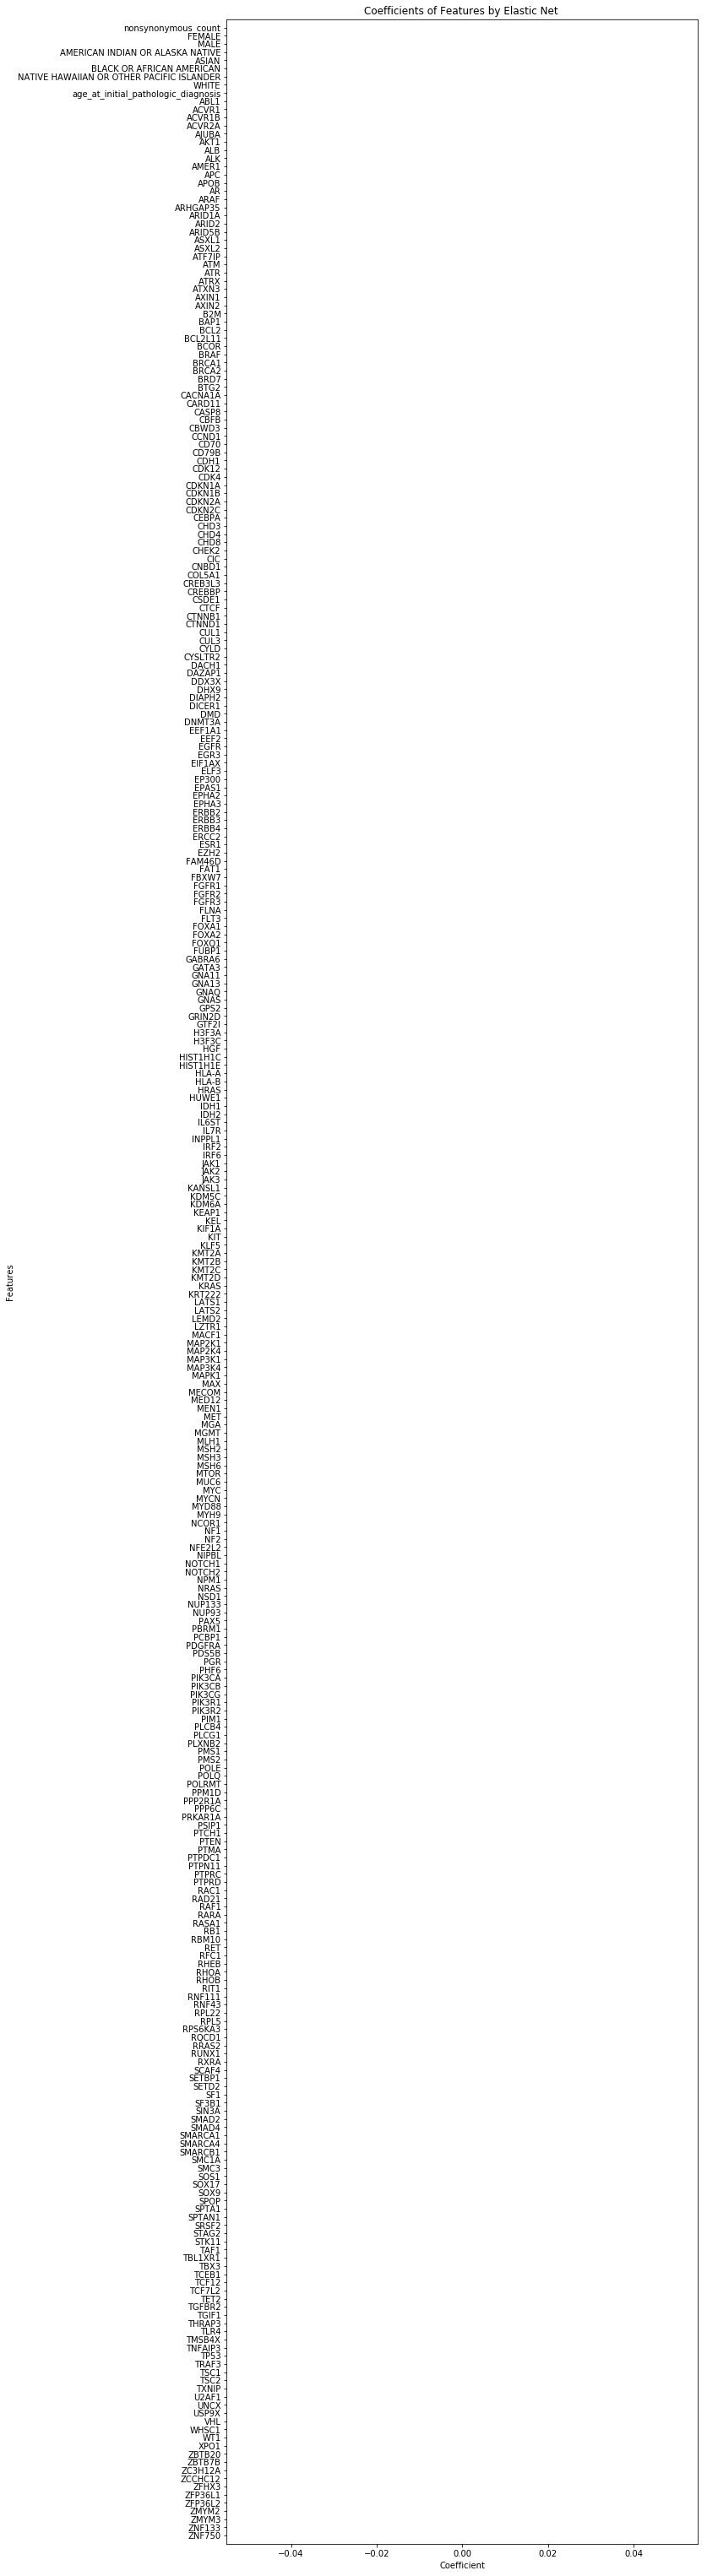

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


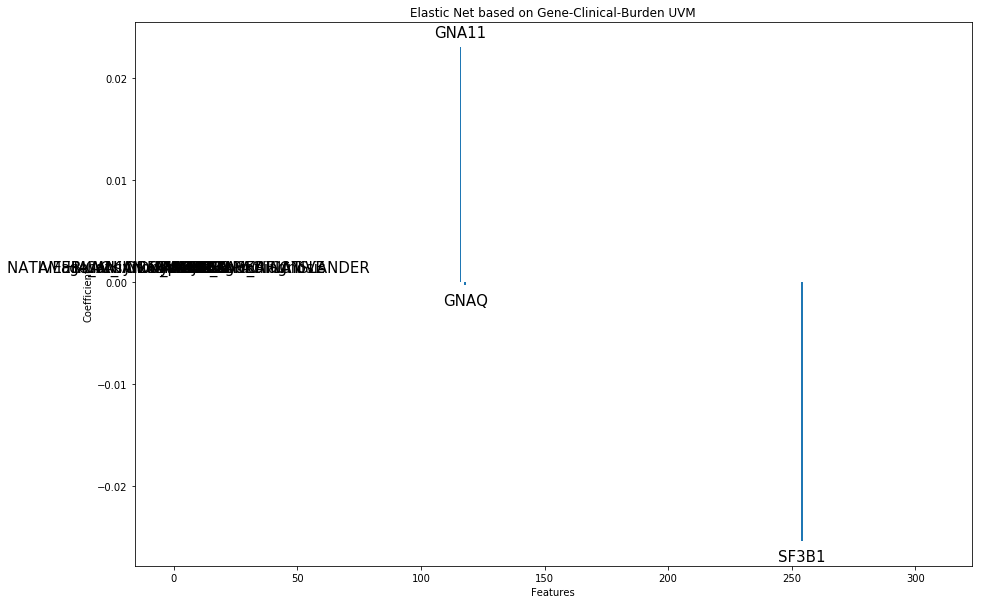

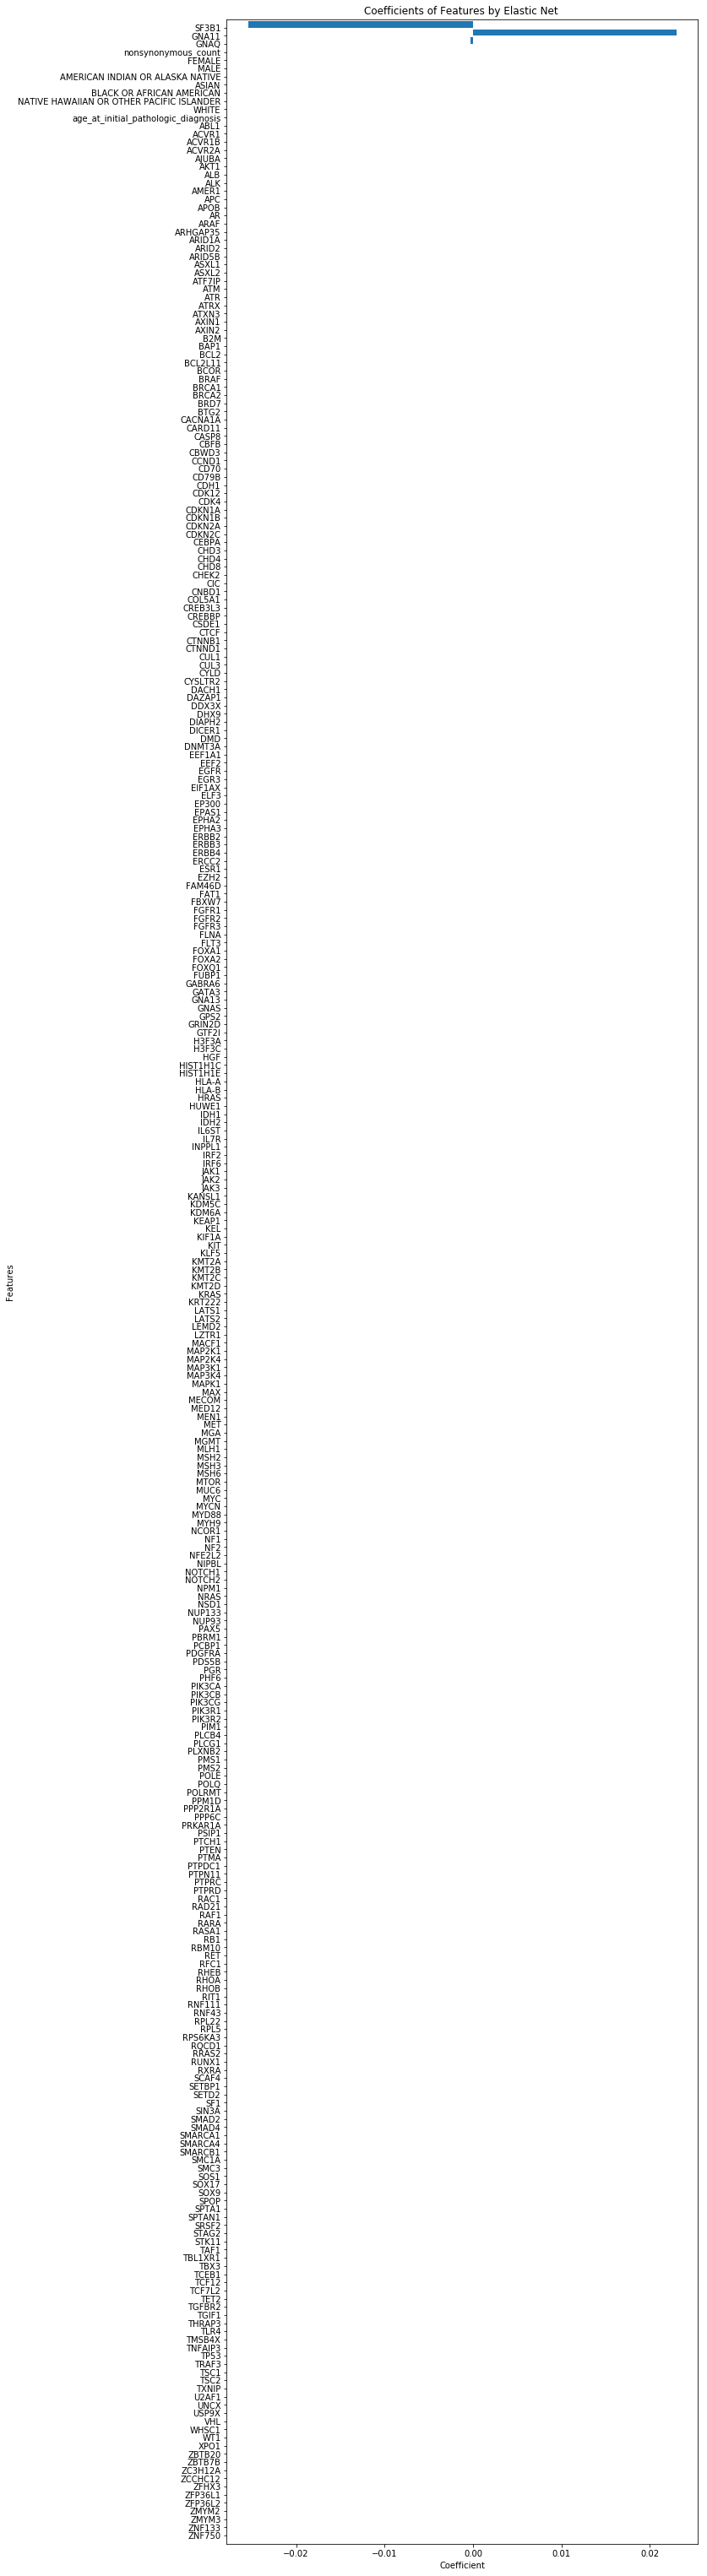

In [38]:
# elastic net on samples following to one TCGA Study
method = "Elastic Net"
font_size = 22

num_features = 20
cancer_coeffs = [] 
for i in range(0, len(cancer_names)):
    name = cancer_names[i]
    
    enet_regr = ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=5000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
    enet_regr.fit(nx[np.where(cancer_data[:,i]==1)], y[np.where(cancer_data[:,i]==1)])
    
    cancer_coef = np.transpose(enet_regr.coef_)
    cancer_abs_coef = abs(cancer_coef)
    cancer_absSortlist = sorted(range(len(cancer_abs_coef)), key=lambda k: cancer_abs_coef[k],reverse = True)
    #print (len(cancer_coef))
  
    
    plt.figure(figsize=(15, 10))
    plt.title(method + " based on Gene-Clinical-Burden "+ name)
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    #plt.yticks(2)
    xlabel = list(range(0,len(cancer_coef))) 
    plt.bar(xlabel, cancer_coef)
    #matplotlib.rcParams.update({'font.size': 22 })
    labels = [nx_label[l] for l in cancer_absSortlist[0:num_features]]
    k = 0
    for x_loc,y_loc in zip([xlabel[i] for i in cancer_absSortlist[0:num_features]], [cancer_coef[i] for i in cancer_absSortlist[0:num_features]]):
        label = labels[k]
        k = k+1
        if (y_loc<0):
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
        
        else:
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
           
    plt.savefig("./out/clinical_burden/"+ method + "/" + cancer_names[i] + "_" + method +"_geneClinicalBurdern.pdf", bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    
    reverse_abs_sort_list = cancer_absSortlist 
    reverse_abs_sort_list.reverse()
    
    objects = [nx_label[i] for i in reverse_abs_sort_list]
    y_pos = np.arange(len(objects))
    performance = [cancer_coef[i] for i in reverse_abs_sort_list]
    plt.figure(figsize=(10, 55))

    plt.barh(y_pos, performance, align='edge')
    plt.yticks(y_pos, objects)
    plt.xlabel('Coefficient')
    plt.ylabel('Features')
    plt.title("Coefficients of Features by " + method + " ")
    plt.ylim(min(y_pos)-1, max(y_pos)+1) #This will reduce the margins to a half-a-bar width.
    plt.savefig("./out/clinical_burden/" + method + "/Coef_" + cancer_names[i]+ "_geneClinicalBurdern.pdf",bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    plt.show()